<div style="display: flex; background-color: RGB(0,0,139);" >
<h1 style="margin: auto; padding: 30px;color: RGB(0,0,255);text-align: center; ">ÉTUDE DE MARCHÉ EXPORT LA POULE QUI CHANTE - partie 2<br>Analyse des données</h1>
</div>

# Contexte de cette étude

Mission en tant qu’analyste chez La poule qui chante, entreprise française d’agroalimentaire. Son activité principale est l’élevage et la vente de poulets sous le label **“Poulet Agriculture Biologique”**. 

Son activité actuelle est franco-française mais la direction de l’entreprise souhaite évaluer la possibilité de se développer à l'international. Aucun pays particulier ni aucun continent n'est pour le moment choisi. Cette étude doit permettre de faire des propositions. 

# Données collectées
Les sources sont principalement WorldBank et la FAO.

+ Tables concernant la richesse du pays (revenu intérieur brut par habitant, taux de croissance du PIB par habitant, taux de croissance annuel)
+ Tables liées au commerce (score doing_business, commerce transfontalier, droits de douane, score logistique)
+ Tables concernant la population (chiffres, croissance, % de population urbaine, évolution de la population urbaine et espérance de vie)
+ Tables concernant l'alimentation (disponibilité liée à la viande de volailles, % non-accès à une alimentatione saine)
+ Tables sur la situation politique (score de stabilité politique)


# Objectif de l'analyse
Cette analyse est découpée en deux parties et doit permettre de faire des préconisations de pays où s'étendre commercialement.

+ Nettoyage et transformation des données puis analyse exploratoire univariée et constitution d'un dataset unique -> réalisé dans un précédent notebook : Partie 1;
+ **Partie analytique en réalisant une ACP avec réduction des dimensions et clustering (CAH puis K-means).**

# Livrables
+ Notebooks
+ Présentation au CODIR.

# Table des matières
* [Etape 1 Importation des librairies et chargement du dataset](#Etape_1)

* [Etape 2 Analyse exploratoire du dataset](#Etape_2)
    * [Section 2.1 Analyses univariées](#section_2_1)
    * [Section 2.2 Analyses bivariées](#section_2_2)
        * [Sous-section 2.2.1 Matrice de corrélation et réduction de dimension](#sub_section_2_2_1)
        * [Sous-section 2.2.2 Analyse des relations entre les variables et les catégories de revenus](#sub_section_2_2_2)
* [Etape 3 Analyse de données avec l'ACP](#Etape_3)
    * [Section 3.1 Construction de l'ACP](#section_3_1)
    * [Section 3.2 Interprétation de l'analyse](#section_3_2)
         * [Sous-section 3.2.1 Diagramme des éboulis, valeurs propres, cos² et CTR](#sub_section_3_2_1)
         * [Sous-section 3.2.2 Cercle des corrélations et projections des individus des premiers axes](#sub_section_3_2_2)
         * [Sous-section 3.2.3 Dénomination des nouvelles variables](#sub_section_3_2_3)
    * [Section 3.3 énérer notre nouveau dataset avec les 4 premières variables synthétiques](#section_3_3)    
* [Etape 4 Clustering](#Etape_4)
    * [Section 4.1 Classification ascendante hiérarchique](#section_4_1)
        * [Sous-section 4.1.1 Matrice de liaison](#sub_section_4_1_1)
        * [Sous-section 4.1.2 Dendrogrammes sur dataset normalisé initial](#sub_section_4_1_2) 
        * [Sous-section 4.1.3 Dendrogrammes sur dataset synthétique issu de l'ACP](#sub_section_4_1_3)
        * [Sous-section 4.1.4 Définition des clusters](#sub_section_4_1_4) 
    * [Section 4.2 Classification par la méthode K-Means sur dataset normalisé initial](#section_4_2)
        * [Sous-section 4.2.1 Méthode du coude](#sub_section_4_2_1) 
        * [Sous-section 4.2.2 Choix du nombre de clusters](#sub_section_4_2_2)
        * [Sous-section 4.2.3 Analyse des clusters](#sub_section_4_2_3)
    * [Section 4.3 Classification par la méthode K-Means sur dataset ACP](#section_4_3)
        * [Sous-section 4.3.1 Méthode du coude](#sub_section_4_3_1) 
        * [Sous-section 4.3.2 Analyse des clusters obtenus](#sub_section_4_3_2)
    * [Section 4.4 Comparaison des clusters CAH et KMeans sur dataset ACP](#section_4_4)
        * [Sous-section 4.4.1 Projection des individus par clusters](#sub_section_4_4_1) 
    * [Section 4.5 Nouvelle partition CAH puis KMeans sur un sous-groupe](#section_4_5)
        * [Sous-section 4.5.1 CAH sur le sous-groupe](#sub_section_4_5_1)
        * [Sous-section 4.5.2 KMeans sur le sous-groupe](#sub_section_4_5_2) 
* [Etape 5 Choix des pays pour exporter](#Etape_5)
    * [Section 5.1 Retour aux données brutes](#section_5_1)
    * [Section 5.2 Apport d'information sur le marché bio](#section_5_2)
    * [Section 5.3 Sélection finale des pays](#section_5_3)

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement du fichier</h2><a class="anchor" id="Etape_1"></a>
</div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [2]:
# Importation du dataframe
df=pd.read_csv("df_complet.csv",index_col=2)
df.head()

Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                             
Afrique du Sud                                          149.24   
Albanie                                                  85.67   
Algerie                                                  23.14   
Allemagne                                                60.85   
Angola                                                   39.62   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afrique du Sud                                              39.57        
Albanie                                                     22.56        
Algerie                                                      6.13        
Allemagne                                                   16.51        
Angola                                                      10.52        

                Population  importVolailles_pour100khab  \
Pays                                                      
Afrique du Sud    60414495                     0.503191   
Albanie            2745972                     1.711598   
Algerie           45606480                     0.000000   
Allemagne         84482267                     0.933924   
Angola            36684202                     0.861406   

                Part_volailles_importée  Production_Volailles_100Khab  \
Pays                                                                    
Afrique du Sud                12.827004                      3.240944   
Albanie                       73.437500                      0.655506   
Algerie                        0.000000                      0.602984   
Allemagne                     57.340116                      1.783806   
Angola                        84.491979                      0.160832   

                GDP_per_capita  GDP_per_capita_growth%  Taux_croissancePIB  \
Pays                                                                         
Afrique du Sud           15331                3.662368            1.910406   
Albanie                  19493                9.922714            4.856402   
Algerie                  16028                2.093488            3.600000   
Allemagne                66616                3.120163            1.806209   
Angola                    7929               -1.954598            3.045403   

                score_facilite_business  Trading_accross_borders  \
Pays                                                               
Afrique du Sud                 67.01897                 59.64271   
Albanie                        67.74847                 96.29094   
Algerie                        48.59758                 38.42879   
Allemagne                      79.71004                 91.77378   
Angola                         41.28838                 36.15152   

                taux_droits_douane  Score_performance_logistique  \
Pays                                                               
Afrique du Sud                4.46                          3.38   
Albanie                       1.13                          2.66   
Algerie                      10.29                          2.45   
Allemagne                     1.39                          4.20   
Angola                       11.33                          2.05   

                Croissance_pop (%)  part_pop_urbaine%  \
Pays                                                    
Afrique du Sud            0.865465             68.819   
Albanie                  -1.148418             64.603   
Algerie                   1.554019             75.268   
Allemagne                 0.813269             77.765   
Angola                    3.030996             68.688   

                Esperance_vie_naissance (années)  \
Pays                                               
Afrique du Sud                          61.48000   
Albanie                                 76.83300   

In [3]:
#Garder un df_complet pour la fin
df_full = df

##### La colonne Pays est instituée index du df.

In [4]:
#Afficher les dimensions du dataset
print("Le df comporte {} pays".format(df.shape[0]))
print("Le df comporte {} variables".format(df.shape[1]))

Le df comporte 105 pays
Le df comporte 19 variables


<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire du dataset</h2><a class="anchor" id="Etape_2"></a>
</div>

In [5]:
# Analyse du type de variable dans la base de données
df.dtypes

Disponibilité alimentaire (Kcal/personne/jour)            float64
Disponibilité alimentaire en quantité (kg/personne/an)    float64
Population                                                  int64
importVolailles_pour100khab                               float64
Part_volailles_importée                                   float64
Production_Volailles_100Khab                              float64
GDP_per_capita                                              int64
GDP_per_capita_growth%                                    float64
Taux_croissancePIB                                        float64
score_facilite_business                                   float64
Trading_accross_borders                                   float64
taux_droits_douane                                        float64
Score_performance_logistique                              float64
Croissance_pop (%)                                        float64
part_pop_urbaine%                                         float64
Esperance_

In [6]:
# Analyse de données manquantes
df.isnull().sum()

Disponibilité alimentaire (Kcal/personne/jour)            0
Disponibilité alimentaire en quantité (kg/personne/an)    0
Population                                                0
importVolailles_pour100khab                               0
Part_volailles_importée                                   0
Production_Volailles_100Khab                              0
GDP_per_capita                                            0
GDP_per_capita_growth%                                    0
Taux_croissancePIB                                        0
score_facilite_business                                   0
Trading_accross_borders                                   0
taux_droits_douane                                        0
Score_performance_logistique                              0
Croissance_pop (%)                                        0
part_pop_urbaine%                                         0
Esperance_vie_naissance (années)                          0
Absence_acces_alimentation_saine (%pop) 

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.1 - Analyses univariées</h3>
<a id="section_2_1"></a>
</div>

In [7]:
# Analyse desciptive du jeu de données
df.describe()

Disponibilité alimentaire (Kcal/personne/jour)  \
count                                      105.000000   
mean                                        81.327048   
std                                         60.620942   
min                                          2.480000   
25%                                         29.400000   
50%                                         73.570000   
75%                                        111.890000   
max                                        263.980000   

       Disponibilité alimentaire en quantité (kg/personne/an)    Population  \
count                                         105.000000       1.050000e+02   
mean                                           21.167619       6.145530e+07   
std                                            15.789485       1.993103e+08   
min                                             0.660000       3.936000e+05   
25%                                             7.810000       4.862989e+06   
50%                                            19.220000       1.133297e+07   
75%                                            29.290000       3.668585e+07   
max                                            70.830000       1.428628e+09   

       importVolailles_pour100khab  Part_volailles_importée  \
count                   105.000000               105.000000   
mean                      0.659152                34.944874   
std                       0.884463                37.924989   
min                       0.000000                 0.000000   
25%                       0.028379                 1.886792   
50%                       0.383717                18.392371   
75%                       0.934012                57.340116   
max                       6.703884               163.492063   

       Production_Volailles_100Khab  GDP_per_capita  GDP_per_capita_growth%  \
count                    105.000000      105.000000              105.000000   
mean                       1.976430    30400.685714                4.963992   
std                        1.869463    29184.945140                4.468189   
min                        0.000000      918.000000              -12.629477   
25%                        0.309262     6820.000000                2.696256   
50%                        1.658739    21056.000000                4.588192   
75%                        2.994536    46721.000000                7.289650   
max                        7.452465   146457.000000               18.908982   

       Taux_croissancePIB  score_facilite_business  Trading_accross_borders  \
count          105.000000               105.000000               105.000000   
mean             4.913543                67.350182                77.004400   
std              6.654572                11.417777                19.499412   
min             -7.346764                41.288380                18.964110   
25%              2.549956                59.960170                64.272980   
50%              4.143562                69.603100                78.119370   
75%              5.759543                76.618640                94.248430   
max             63.439864                85.288560               100.000000   

       taux_droits_douane  Score_performance_logistique  Croissance_pop (%)  \
count          105.000000                    105.000000          105.000000   
mean             4.392095                      2.945238            1.140563   
std              3.830952                      0.564944            1.143411   
min              0.000000                      2.050000           -1.148418   
25%              1.390000                      2.530000            0.292221   
50%              2.630000                      2.810000            1.047129   
75%              7.300000                      3.310000            2.127508   
max             17.690000                      4.200000            4.077010   

       part_pop_urbaine%  Esperance_vie_naissance (années)  \
count         1

Les maximum dans les variables liés à l'import de viande de volailles sont des valeurs extrêmes mais crédibles si ces pays ont des politiques de transformations importantes ou d'intermédiaires.

In [8]:
#Regarder les données des EAU
check_eau = df.loc['Emirats arabes unis']
check_eau

Disponibilité alimentaire (Kcal/personne/jour)                   208.4
Disponibilité alimentaire en quantité (kg/personne/an)           55.25
Population                                                     9516871
importVolailles_pour100khab                                   6.703884
Part_volailles_importée                                     122.222222
Production_Volailles_100Khab                                  0.556906
GDP_per_capita                                                   78915
GDP_per_capita_growth%                                        3.487215
Taux_croissancePIB                                            7.850418
score_facilite_business                                       80.75261
Trading_accross_borders                                       74.10464
taux_droits_douane                                                2.63
Score_performance_logistique                                      3.96
Croissance_pop (%)                                            0.799055
part_p

A première vue, ce pays semble intéressant car il produit peu de viande de volailles, en importe énormément (bien plus que ses besoins en nourriture) et a donc un part d'import pour 100 000 habitants très importante. Cependant, après analyse en composantes principales en gardant ce pays dans le dataset, celui-ci influence de manière excessive (>23%) la construction des axes. Au regard de la taille du pays et de sa politique d'intermédiaire commercial et de son éloignement avec la France, il a été décidé de le retirer du dataset.

In [9]:
#Explorer les pays correspondant aux valeurs maximales
max_values = df.max()
# Comparer les valeurs de chaque variable avec la valeur maximale
max_indices = df.eq(max_values)
# Obtenir les pays (index) ayant les valeurs maximales pour chaque variable
max_countries = max_indices[max_indices].stack().reset_index()

# Renommer les colonnes pour plus de clarté
max_countries.columns = ['Pays', 'Variable', 'IsMax']

# Filtrer pour ne garder que les lignes où IsMax est True
max_countries = max_countries[max_countries['IsMax']].drop(columns='IsMax')
# Présenter les résultats par variable
result = max_countries.groupby('Variable')['Pays'].apply(list).reset_index()
result

Variable  \
0             Absence_acces_alimentation_saine (%pop)   
1                                  Croissance_pop (%)   
2      Disponibilité alimentaire (Kcal/personne/jour)   
3   Disponibilité alimentaire en quantité (kg/pers...   
4                    Esperance_vie_naissance (années)   
5                                      GDP_per_capita   
6                              GDP_per_capita_growth%   
7                                      Groupe_revenus   
8                             Part_volailles_importée   
9                                          Population   
10                       Production_Volailles_100Khab   
11                       Score_performance_logistique   
12                                 Taux_croissancePIB   
13                            Trading_accross_borders   
14                        importVolailles_pour100khab   
15                         indice_stabilité_politique   
16                                  part_pop_urbaine%   
17                            score_facilite_business   
18                                 taux_droits_douane   

                                                 Pays  
0                                        [Madagascar]  
1                                             [Malte]  
2                                            [Israel]  
3                                            [Israel]  
4                                             [Japon]  
5                                        [Luxembourg]  
6                                            [Guyana]  
7   [Allemagne, Australie, Autriche, Belgique, Bul...  
8                                          [Belgique]  
9                                              [Inde]  
10                                          [Pologne]  
11                                        [Allemagne]  
12                                           [Guyana]  
13  [Autriche, Belgique, Croatie, Danemark, Espagn...  
14                              [Emirats arabes unis]  
15                                          [Islande]  
16                                         [Belgique]  
17                                         [Danemark]  
18                                           [Gambie]

In [10]:
df=df.drop(df[df.index == 'Emirats arabes unis'].index)

In [11]:
# Description des variables qualitatives
df.describe(include="object")

Groupe_revenus
count                    104
unique                     3
top     Revenu intermédiaire
freq                      50

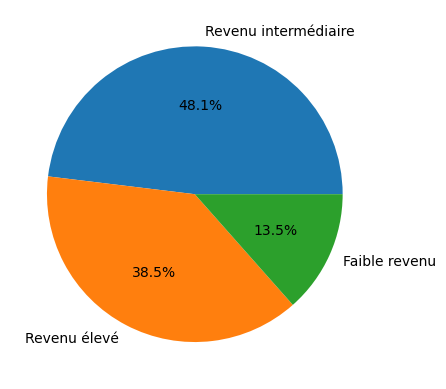

In [12]:
# Création d'un tableau de fréquences pour la variable Groupe_revenus
freq_table = (df['Groupe_revenus'].value_counts())/len(df)
freq_table

#Création d'un diagramme circulaire pour le tableau de fréquence
plt.pie(freq_table, labels=freq_table.index, autopct='%1.1f%%')
plt.show()

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.2 - Analyses bivariées</h3>
<a id="section_2_2"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.2.1 - Matrices de corrélation et réduction de dimension</h3>
<a id="sub_section_2_2_1"></a>
</div>

In [13]:
# Sélectionner uniquement les colonnes quantitatives
df_quanti = df.select_dtypes(include=['number'])

<Axes: >

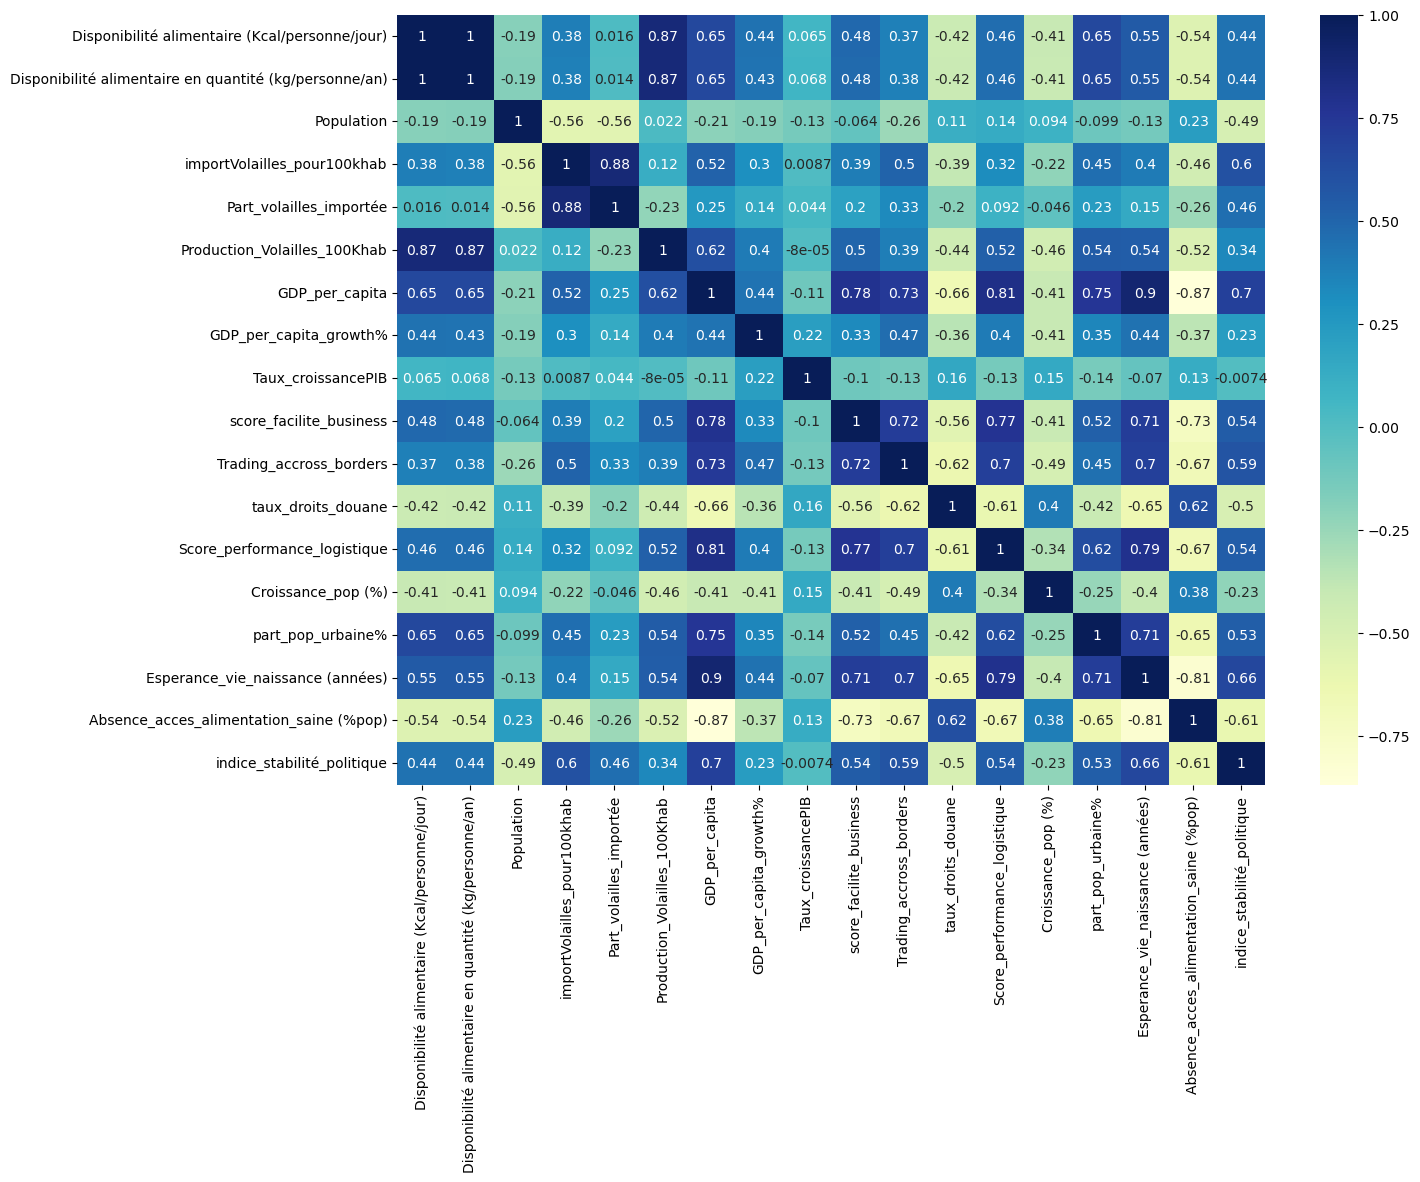

In [14]:
# Obtenir le tableau de corélation et la heatmap
corr_matrix = df_quanti.corr(method='spearman')
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

## Réduction des dimensions du dataset

+ Nous voyons que les 2 colonnes disponibilité alimentaire (en kcal et en kg) sont redondantes car correlées (1). L'une d'entre elles peut être enlevée -> dispo alimentaire en kcal (moins explicite).
+ Les 2 variables qui concernent l'import de viande de volailles sont fortement liées. Je décide de garder celle sur le taux d'importation pour 100k hab plutôt que la part d'import de nourriture car la viande peut être utilisée à d'autres fins que nourrir la population. Cependant, cette variable pourra servir lorsque nous reviendrons aux données brutes pour choisir. 
+ **Le taux de croissance du PIB par habitant (GDP_per_capita_growth%) intègre la notion de taux de croissance PIB et de croissance de la population. Afin de réduire mon nombre de variables, je décide de retirer les 2 taux de croissance (PIB et Population).**
+ Nous constatons combien la richesse par habitant (GDP per capita) est liée positivement à l'indice de stabilité politique (0.7), à l'espérance de vie à la naissance (0.9), la part de population urbaine (0.75), au score de performance logistique (0.81), au score de facilité business (0.78) et enfin négativement au manque d'accès à l'alimentation saine (-0.87). Ces variables sont dans le thème du développement (économique et politique). Je retire le score logistique et l'espérance de vie, les plus liées au GDP per Capita.

+ Score_facilite_business et trading accross borders sont liés (correlation 0.72) car trading accross borders compose le score facilite business. Je décide de ne garder que trading across borders pour l'objectif de notre étude. Il s'agit de scorer la facilité des activités import/export plus que de juger de la facilité de s'établir sur place.

+ Pour l'analyse ACP, je ne vais pas garder la notion de population qui me sera utile uniquement pour les choix effectifs de pays.

In [15]:
#DF après réduction des variables
df = df[['Disponibilité alimentaire en quantité (kg/personne/an)','importVolailles_pour100khab', 'Production_Volailles_100Khab', 'GDP_per_capita','GDP_per_capita_growth%','Trading_accross_borders','taux_droits_douane','part_pop_urbaine%','Absence_acces_alimentation_saine (%pop)', 'indice_stabilité_politique','Groupe_revenus']]

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">2.2.2 - Analyse des relations entre chaque variable et la catégorie de revenus</h3>
<a id="sub_section_2_2_2"></a>
</div>

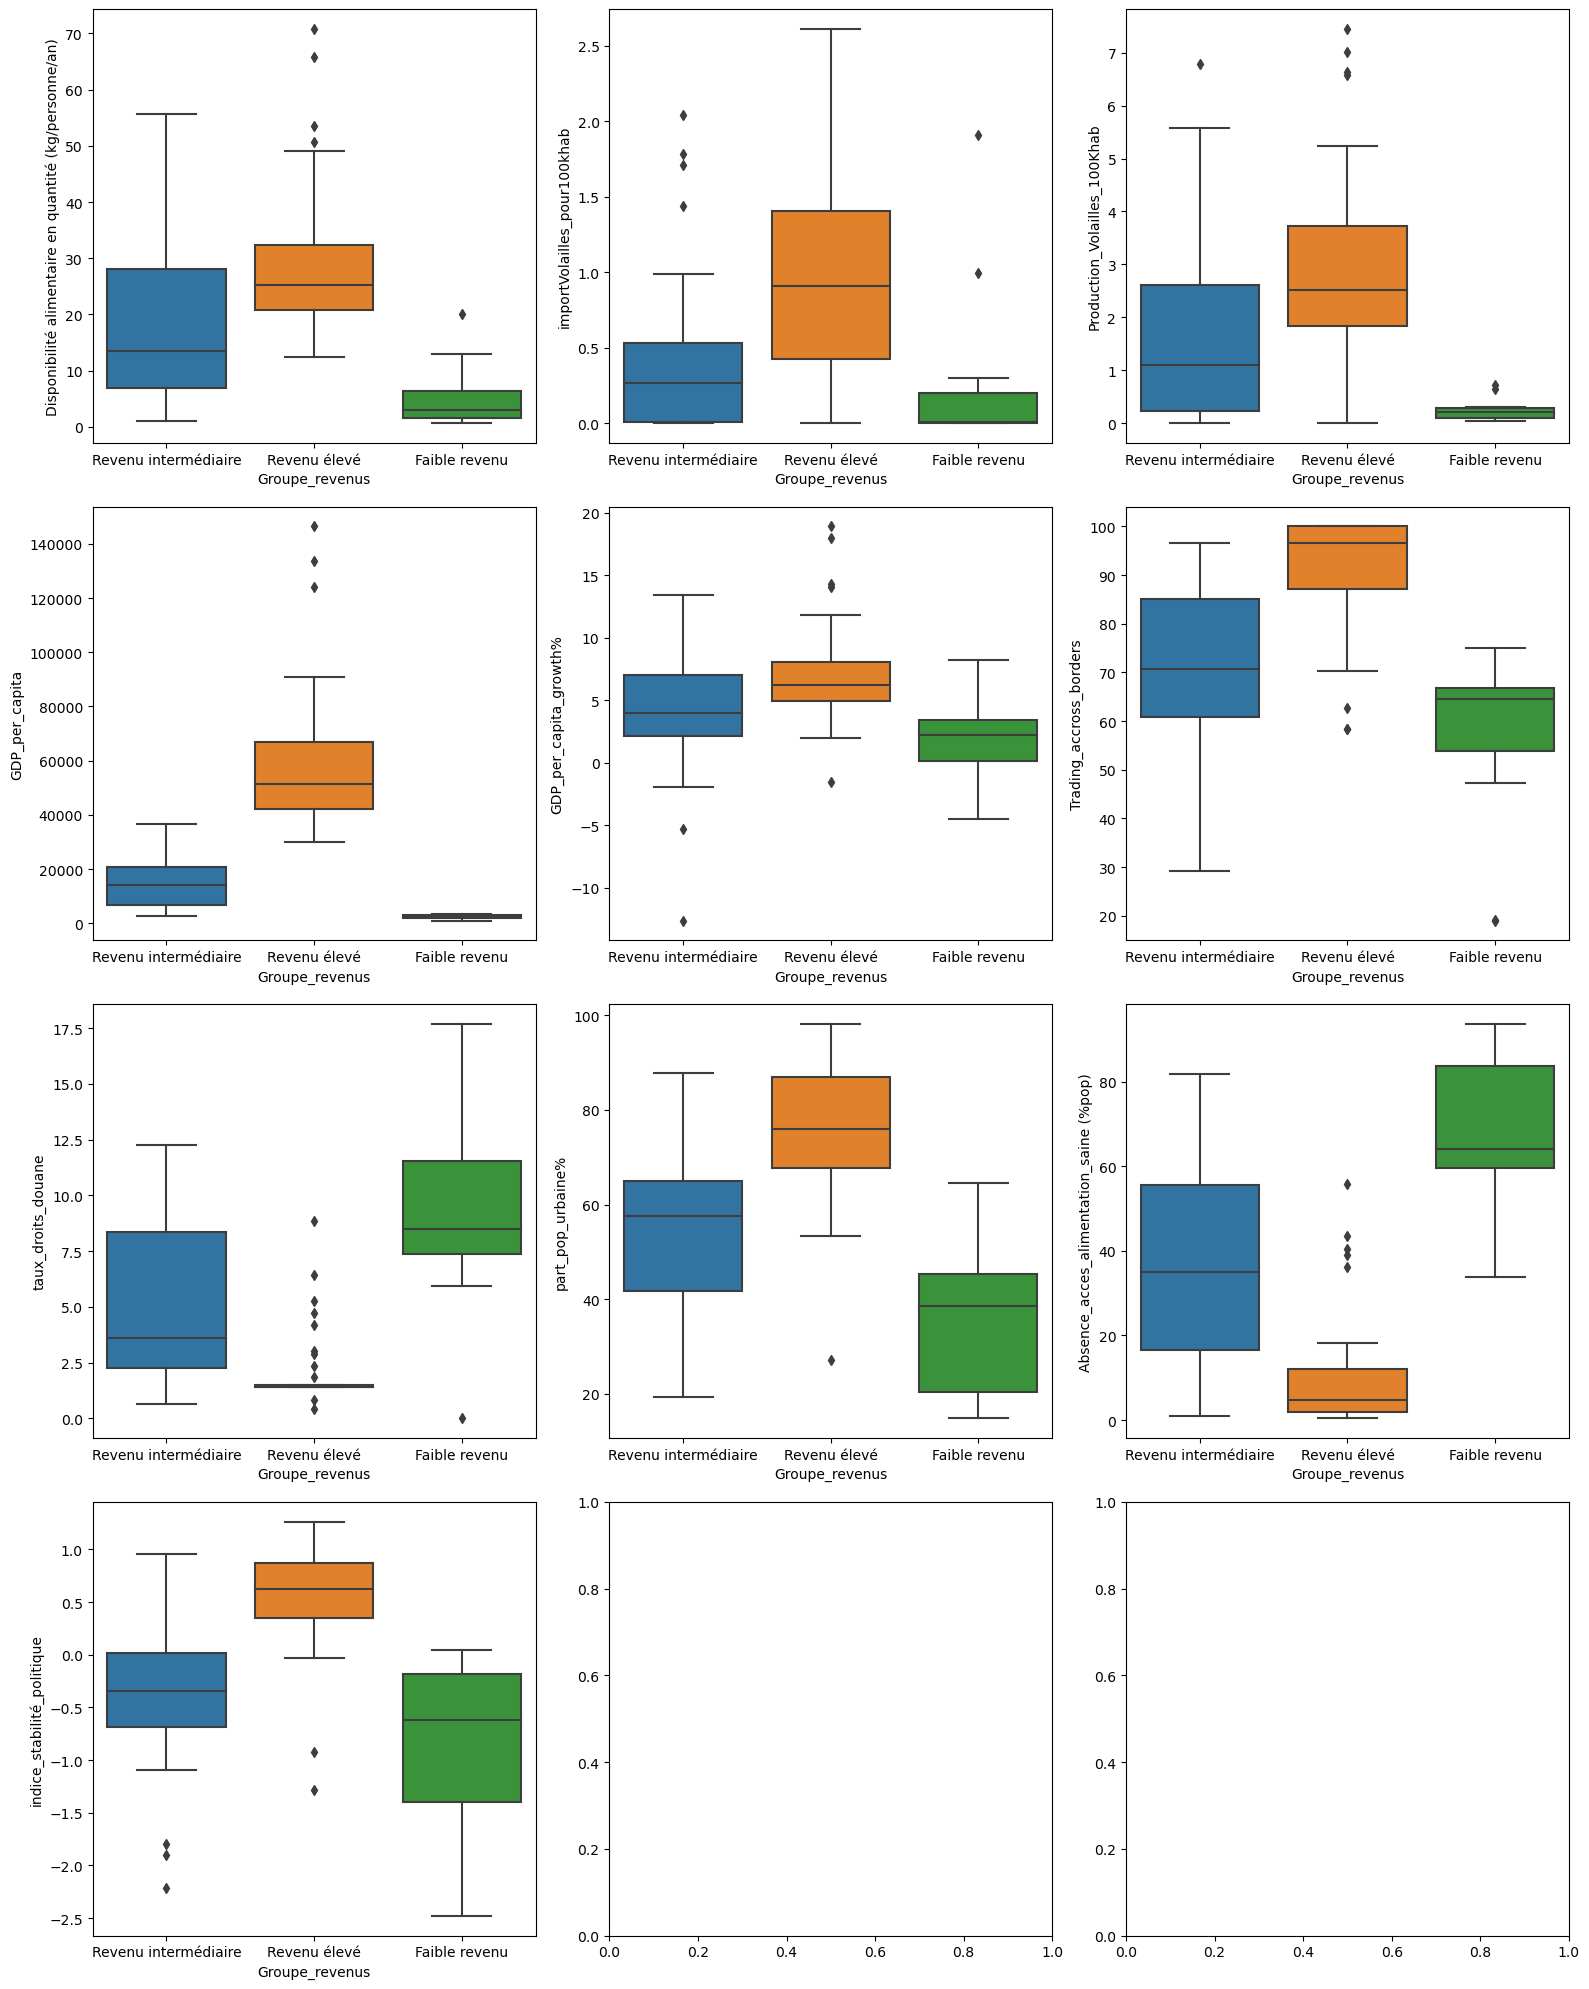

In [16]:
#Analyse des relations entre les variables et la categories de revenus
# Nombre de colonnes à tracer
num_cols = len(df.columns) - 1
#Calculer le nombre de lignes nécessaires pour les sous-graphiques
num_rows = (num_cols+2) // 3 # 3 colonnes par ligne
# Création des boxplots pour chaque variable en fonction de la catégorie de revenus
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 5 * num_rows))
row = 0
col = 0
for i in range(num_cols):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=df['Groupe_revenus'], y=df[df.columns[i]], ax=axes)
    col += 1
plt.tight_layout()
plt.show()

In [17]:
# Confirmation des liaisons avec un test de Kruskal-Wallis pour chaque variable
for column in df.columns[:-1]:
    _, p_value = stats.kruskal(*[df[column][df.Groupe_revenus == Groupe_revenus] for Groupe_revenus in df.Groupe_revenus.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les groupes de revenus (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les groupes de revenus (p-value={p_value})")

La variable Disponibilité alimentaire en quantité (kg/personne/an) est significativement différente entre les groupes de revenus (p-value=8.976251632657797e-09)
La variable importVolailles_pour100khab est significativement différente entre les groupes de revenus (p-value=3.569840727742077e-06)
La variable Production_Volailles_100Khab est significativement différente entre les groupes de revenus (p-value=2.8129664030066374e-08)
La variable GDP_per_capita est significativement différente entre les groupes de revenus (p-value=4.920014262426829e-19)
La variable GDP_per_capita_growth% est significativement différente entre les groupes de revenus (p-value=4.11883632015313e-05)
La variable Trading_accross_borders est significativement différente entre les groupes de revenus (p-value=3.1004767992177806e-10)
La variable taux_droits_douane est significativement différente entre les groupes de revenus (p-value=1.4846922313158121e-08)
La variable part_pop_urbaine% est significativement différente 

Il est déjà possible, grâce à la variable 'Groupe_revenus' qui classe les pays en 3 groupes, d'identifier les attributs du groupe le plus (+) intéressant pour le projet d'export du Poulet agriculture biologique :
+ Import pour 100Khab : plutôt élevée
+ GDP per Capita élevé
+ Bon score de commerce transfontalier
+ Faible droits de douane
+ Part de population urbaine importante
+ Non-accès à une alimentation saine minimum
+ Indice de stabilité politique max

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse de données avec l'ACP</h2><a class="anchor" id="Etape_3"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.1 - Construction de l'ACP</h3>
<a id="section_3_1"></a>
</div>

In [18]:
#Sélection des variables numériques pour ACP
df_quanti = df[['Disponibilité alimentaire en quantité (kg/personne/an)','importVolailles_pour100khab', 'Production_Volailles_100Khab', 'GDP_per_capita','GDP_per_capita_growth%','Trading_accross_borders','taux_droits_douane','part_pop_urbaine%','Absence_acces_alimentation_saine (%pop)', 'indice_stabilité_politique']]

In [19]:
# Matrice des variables quanti
X = df_quanti.values
type(X)

numpy.ndarray

In [20]:
X.shape

(104, 10)

In [21]:
#Mettre les index Pays d'un côté
names = df.index
names

Index(['Afrique du Sud', 'Albanie', 'Algerie', 'Allemagne', 'Angola',
       'Armenie', 'Australie', 'Autriche', 'Bangladesh', 'Belgique',
       ...
       'Tadjikistan', 'Tchequie', 'Thailande', 'Togo', 'Trinidad et Tobago',
       'Uruguay', 'Vietnam', 'Zambie', 'Equateur', 'États-Unis'],
      dtype='object', name='Pays', length=104)

In [22]:
#Avoir un index des noms de variables
features = df_quanti.columns
features

Index(['Disponibilité alimentaire en quantité (kg/personne/an)',
       'importVolailles_pour100khab', 'Production_Volailles_100Khab',
       'GDP_per_capita', 'GDP_per_capita_growth%', 'Trading_accross_borders',
       'taux_droits_douane', 'part_pop_urbaine%',
       'Absence_acces_alimentation_saine (%pop)',
       'indice_stabilité_politique'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
#Vérifier la moyenne et l'écart-type
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9
mean -0.0  0.0  0.0  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [26]:
from sklearn.decomposition import PCA
# Instancier l'ACP et réduire les dimensions
pca = PCA()
pca.fit(X_scaled)

PCA()

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.2 - Interprétation de l'ACP</h3>
<a id="section_3_2"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.2.1 - Diagramme des éboulis, valeurs propres, cos² et CTR</h3>
<a id="sub_section_3_2_1"></a>
</div>

In [27]:
# Analyse des valeurs propres
# Ajuster la longueur de la liste "Dimension" pour qu'elle corresponde à la longueur des autres listes
num_dimensions = len(pca.explained_variance_)
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(num_dimensions)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100, 2),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

print(comp)

  Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1       5.066906                 50.18                  50.18
1      Dim2       1.498470                 14.84                  65.02
2      Dim3       0.823861                  8.16                  73.18
3      Dim4       0.775743                  7.68                  80.86
4      Dim5       0.501391                  4.97                  85.83
5      Dim6       0.442527                  4.38                  90.21
6      Dim7       0.332119                  3.29                  93.50
7      Dim8       0.297762                  2.95                  96.45
8      Dim9       0.267470                  2.65                  99.10
9     Dim10       0.090840                  0.90                 100.00


La 1ère composante capte 50.8% de la variance des données initiales, la 2nde 14.05%. Aves 4 composantes principales, nous atteignons 80% de variance expliquée.

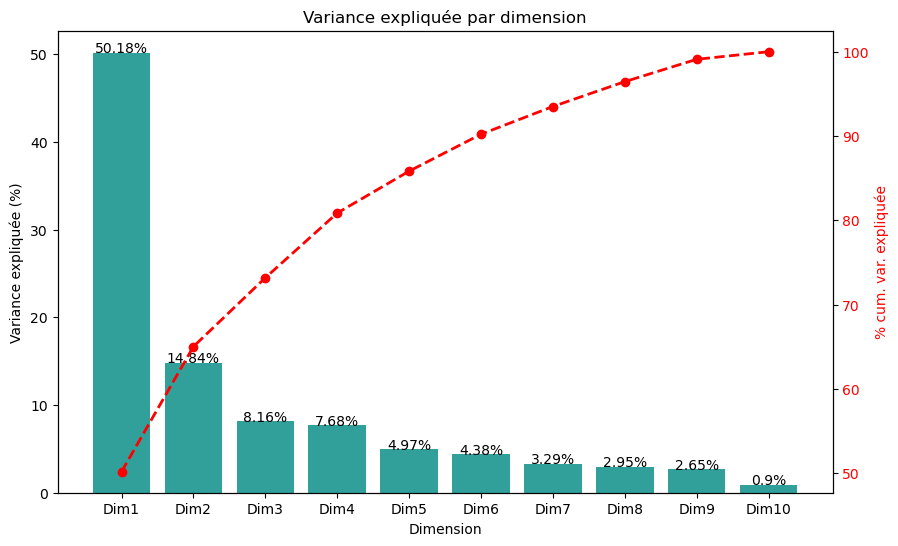

In [28]:
# Scree plot pour choisir le nombre de composantes principales
fig, ax1 = plt.subplots(figsize=(10, 6))
g_comp = sns.barplot(x="Dimension", y="% variance expliquée", palette=["lightseagreen"], data=comp, ax=ax1)
ax1.set_ylabel("Variance expliquée (%)")
ax1.set_title("Variance expliquée par dimension")
for index, row in comp.iterrows():
    ax1.text(index, row["% variance expliquée"], f'{row["% variance expliquée"]}%', color='black', ha="center")
ax2 = ax1.twinx()
ax2.plot(comp["Dimension"], comp["% cum. var. expliquée"], color="red", marker="o", linestyle="dashed", linewidth=2)
ax2.set_ylabel("% cum. var. expliquée", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.show()

In [29]:
#Regardons les composantes via l'attribut components_. 
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i+1}" for i in range(len(comp))]
pcs.round(2)
pcs.T

F1        F2  \
Disponibilité alimentaire en quantité (kg/perso... -0.301912  0.524943   
importVolailles_pour100khab                        -0.234061 -0.477692   
Production_Volailles_100Khab                       -0.276644  0.598907   
GDP_per_capita                                     -0.364649 -0.162319   
GDP_per_capita_growth%                             -0.239890  0.038009   
Trading_accross_borders                            -0.339118 -0.218716   
taux_droits_douane                                  0.315099  0.037398   
part_pop_urbaine%                                  -0.344682  0.047637   
Absence_acces_alimentation_saine (%pop)             0.381848  0.037607   
indice_stabilité_politique                         -0.328808 -0.238422   

                                                          F3        F4  \
Disponibilité alimentaire en quantité (kg/perso... -0.065031  0.249729   
importVolailles_pour100khab                        -0.073086  0.491748   
Production_Volailles_100Khab                       -0.031716  0.025801   
GDP_per_capita                                     -0.220649 -0.071537   
GDP_per_capita_growth%                              0.846495  0.286873   
Trading_accross_borders                             0.258687 -0.265244   
taux_droits_douane                                 -0.078761  0.650318   
part_pop_urbaine%                                  -0.366935  0.234258   
Absence_acces_alimentation_saine (%pop)             0.077582  0.195095   
indice_stabilité_politique                         -0.101988  0.146744   

                                                          F5        F6  \
Disponibilité alimentaire en quantité (kg/perso... -0.046469 -0.274462   
importVolailles_pour100khab                         0.243238 -0.602093   
Production_Volailles_100Khab                       -0.178255 -0.219371   
GDP_per_capita                                     -0.017064  0.274763   
GDP_per_capita_growth%                              0.187055  0.298169   
Trading_accross_borders                            -0.348787 -0.267106   
taux_droits_douane                                 -0.300306  0.229291   
part_pop_urbaine%                                   0.377918  0.367506   
Absence_acces_alimentation_saine (%pop)            -0.224542 -0.186349   
indice_stabilité_politique                         -0.683039  0.236483   

                                                          F7        F8  \
Disponibilité alimentaire en quantité (kg/perso... -0.051796  0.131200   
importVolailles_pour100khab                        -0.045006  0.113628   
Production_Volailles_100Khab                        0.089040  0.013840   
GDP_per_capita                                      0.529886  0.589014   
GDP_per_capita_growth%                             -0.050438  0.090833   
Trading_accross_borders                             0.440383 -0.532887   
taux_droits_douane                                  0.475243 -0.150703   
part_pop_urbaine%                                  -0.082382 -0.550554   
Absence_acces_alimentation_saine (%pop)            -0.056123  0.014777   
indice_stabilité_politique                         -0.523746  0.066985   

                                                          F9       F10  
Disponibilité alimentaire en quantité (kg/perso... -0.000312 -0.685058  
importVolailles_pour100khab                        -0.056966  0.173222  
Production_Volailles_100Khab                       -0.011730  0.689167  
GDP_per_capita                                      0.288705 -0.005122  
GDP_per_capita_growth%                              0.071808  0.048097  
Trading_accross_borders                             0.090644 -0.144113  
taux_droits_douane                                 -0.280836 -0.001828  
part_pop_urbaine%                                   0.316704  0.036406  
Absence_acces_alimentation_saine (%pop)             0.848380  0.020864  
indice_stabilité_politique                         -0.031232  0.0294

## Interprétation
La 1ère composante est constituée de coefficients de pondération plutôt similaires pour la quasi totalité des variables notamment pour les variables qui semblent correspondre au niveau de "développement économique " d'un pays (coefficients négatifs pour GDP per Capita et indice de stabilité politique, score de commerce transfontalier et part de la population urbaine). 

La 2nde PC est constituée plutôt des variables liées aux importations et à la production de viande de volailles. 

La 3ème PC voit le taux de croissance du PIB par habitant avoir un gros poids puis la part de la pop urbaine (négativement). 

Enfin, PC4 est constituée  d'un fort coefficient importVolailles et taux de droits de douane.

### Rappel théorique

**Qualité de représentation des variables (cosinus carré)**
La qualité de représentation des variables est mesurée à l'aide du carré du cosinus (**cos2**) de l'angle entre les vecteurs représentant les variables et les axes principaux. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.
**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

In [30]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(cos_squared.shape[1])])
df_cos_squared.index = df_quanti.columns[:cos_squared.shape[0]]
df_cos_squared = df_cos_squared.round(4)
print(df_cos_squared)

                                                       PC1     PC2     PC3  \
Disponibilité alimentaire en quantité (kg/perso...  0.0912  0.0548  0.0765   
importVolailles_pour100khab                         0.2756  0.2282  0.3587   
Production_Volailles_100Khab                        0.0042  0.0053  0.0010   
GDP_per_capita                                      0.0624  0.2418  0.0007   
GDP_per_capita_growth%                              0.0022  0.0592  0.0318   
Trading_accross_borders                             0.0753  0.3625  0.0481   
taux_droits_douane                                  0.0027  0.0020  0.0079   
part_pop_urbaine%                                   0.0172  0.0129  0.0002   
Absence_acces_alimentation_saine (%pop)             0.0000  0.0032  0.0001   
indice_stabilité_politique                          0.4693  0.0300  0.4750   

                                                       PC4     PC5     PC6  \
Disponibilité alimentaire en quantité (kg/perso...  0.1330  0.0

Sur les 2 premiers axes factoriels, l'import de volailles pour 100k hab, et l'indice de stabilité politique sont plutôt bien représentés.

### **Contribution des variables à la formation des axes (CTR)**
La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. La somme des contributions des variables sur un axe principal donné est égale à 100 % de la valeur propre.**il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables = 10%)** comme étant importantes pour la formation de l'axe principal considéré.

In [31]:
# Contribution des variables à la formation de l'axe
n_components = X.shape[1]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=features)
variable_contrib_df = variable_contrib_df.round(4)
print(variable_contrib_df.iloc[:, :4])

                                                    PC1_contrib  PC2_contrib  \
Disponibilité alimentaire en quantité (kg/perso...       0.4619       0.4129   
importVolailles_pour100khab                              0.2776       0.3419   
Production_Volailles_100Khab                             0.3878       0.5375   
GDP_per_capita                                           0.6737       0.0395   
GDP_per_capita_growth%                                   0.2916       0.0022   
Trading_accross_borders                                  0.5827       0.0717   
taux_droits_douane                                       0.5031       0.0021   
part_pop_urbaine%                                        0.6020       0.0034   
Absence_acces_alimentation_saine (%pop)                  0.7388       0.0021   
indice_stabilité_politique                               0.5478       0.0852   

                                                    PC3_contrib  PC4_contrib  
Disponibilité alimentaire en quantité (k

Les variables ayant plus de 10% de CTR (contribution moyenne 100/10) sont importantes à la composition de cet axe. 
+ F1 : toutes les variables contrinuent fortement à l'axe (max : GDP per capita et absence accès à alimentation saine)
+ F2 : Production de volailles pour 100hab + la disponibilité et l'import
+ F3 : GDP per capita growth + Part de la population urbaine
+ F4 : Taux droits de douane + import

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.2.2 - Cercle des corrélations et projection des individus des 2 premiers axes factoriels</h3>
<a id="sub_section_3_2_2"></a>
</div>

In [32]:
#Définir les axes x et y (les 2 premières dimensions ici)
x, y = 0,1

In [33]:
#Réaliser le graphique :
def correlation_graph(pca,
                      x_y,
                      features,
                     ax=None) :
    """Affiche le graphe des correlations
    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """
    # Extrait x et y
    x,y=x_y

    fig, ax = plt.subplots(figsize=(10, 9))
    ax.set_facecolor('#d3d3d3')
    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.05,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliquée et titre
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.grid(color='white', linestyle='-', linewidth=0.5)
    plt.show(block=False)

In [34]:
#Projection des individus en calculant les coordonnées des individus dans le nouvel espace = matrice des points projetés :
X_proj = pca.transform(X_scaled)

In [35]:
def display_factorial_planes(   X_proj,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="o",
                                s=200,
                                ax=None
                            ):
   
   

    # Transforme X_projected en np.array
    X_ = np.array(X_proj)

    #Définir la forme de la figure si elle n'a pas été donnée
    if not figsize:
            figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

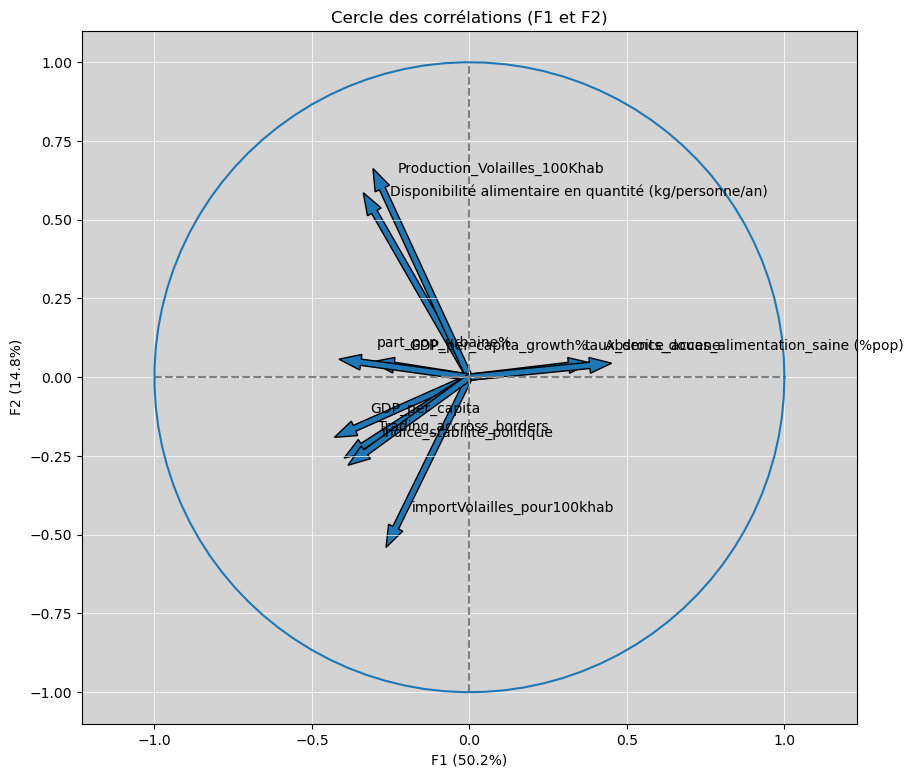

In [36]:
x_y = (0,1)
correlation_graph(pca, x_y, features)

Sur F1, le taux de droits de douane et l'absence d'accès à une alimentation saine contribuent positivement à l'axe. Quand les valeurs de F1 sont positives, le % de droits de douane et de part de la population n'ayant pas accès à une alimentation saine sont importants (ex. Burkina, Sénégal, Soudan, les Guinée ou le Pakistan). A l'inverse, plus la valeur sur F1 est petite, plus les valeurs des variables GDPperCapita et taux de croissance GDP, score de commerce frontalier, stabilité politique, part de population urbaine vont être importantes (Suisse, Norvège, Irlande, Belgique, Danemark = pays dits riches). F1 va séparer les pays dit plutôt riches et ceux qui sont plutôt pauvres. 

F2 est caractérisée par négativement le niveau d'importation de viande de volailles et, positivement, le niveau de production en volailles avec la disponibilité alimentaire avec des pays qui ont une valeur plutôt importante en disponibilité (Israël, Brésil, Pérou) et ceux une valeur forte en import ex.Macédoine du Nord, Monténégro, Albanie, Slovaquie, Bhutan (= des Pays d'Europe Orientale notamment)

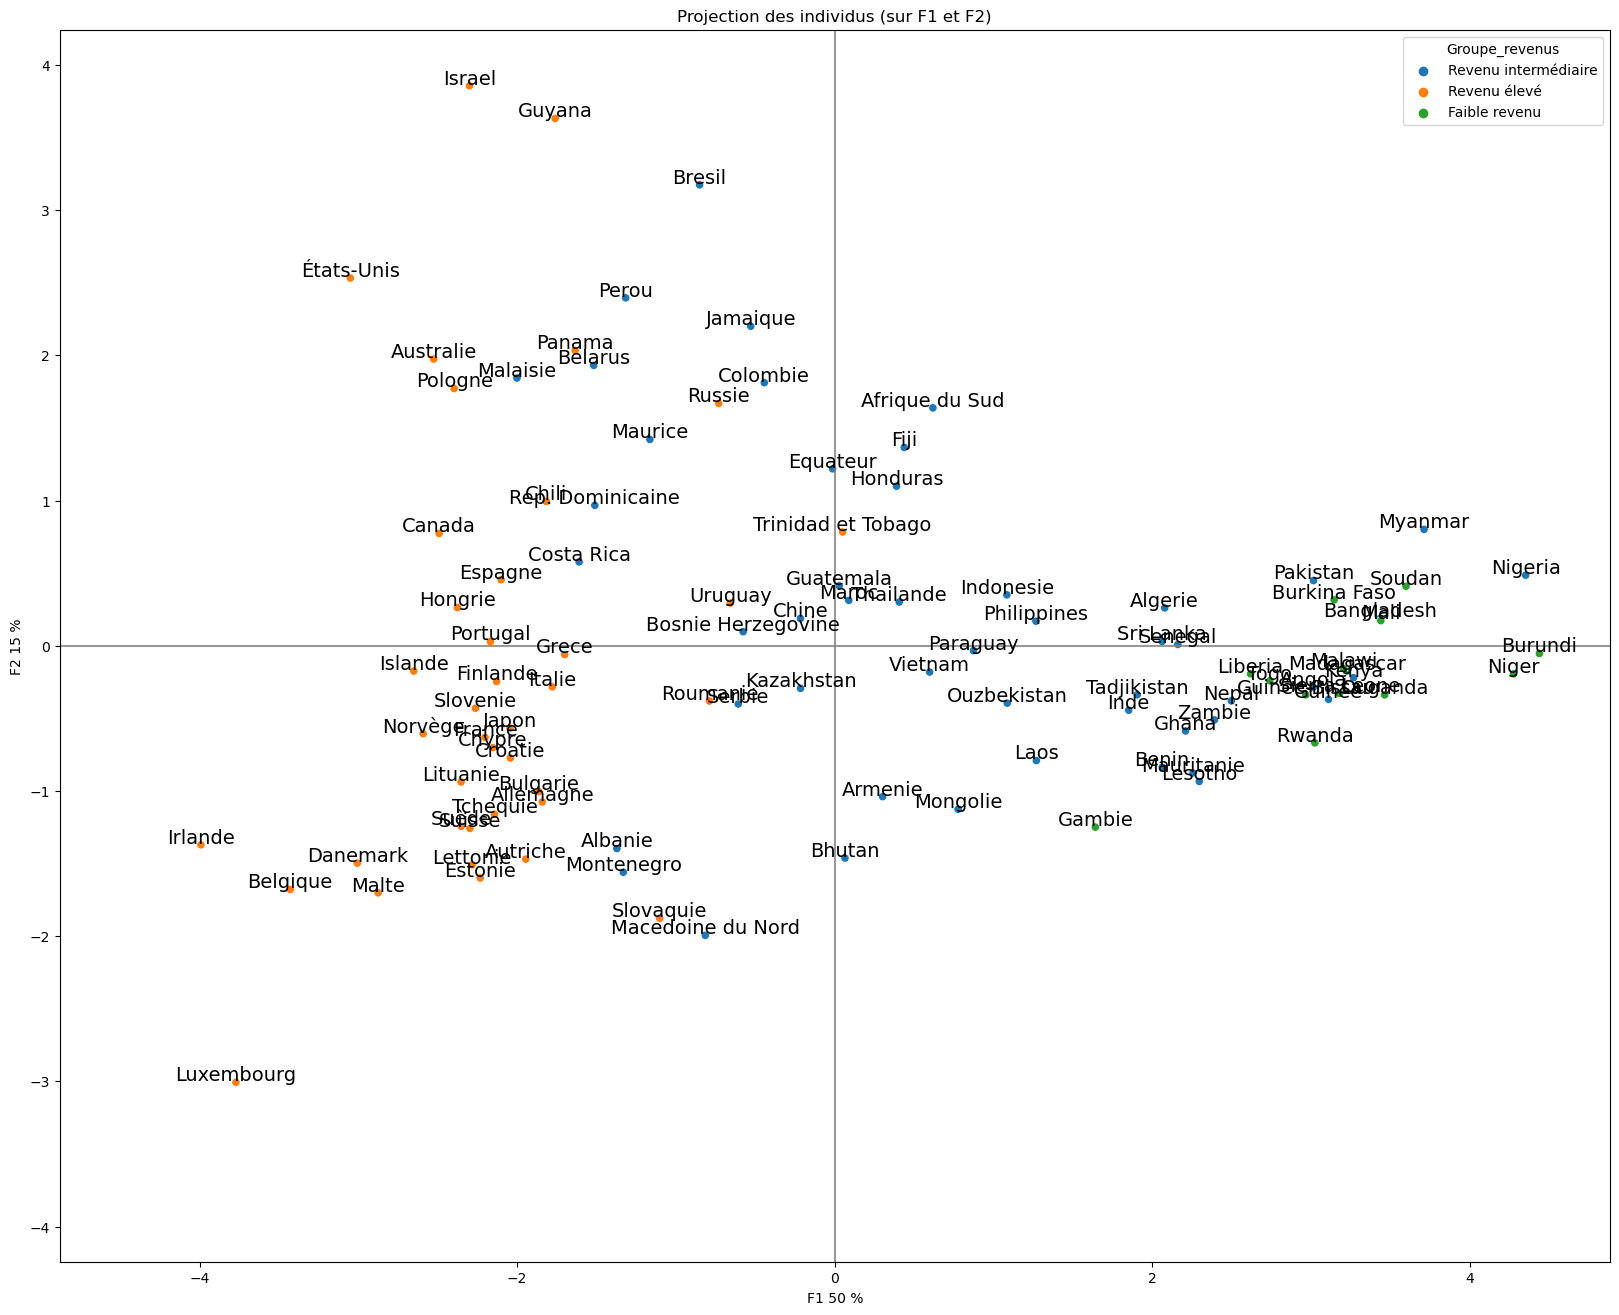

In [37]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Groupe_revenus'], marker="s")

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.2.3 - Cercle des corrélations et projection des individus des axes factoriels n°3 et 4</h3>
<a id="sub_section_3_2_3"></a>
</div>

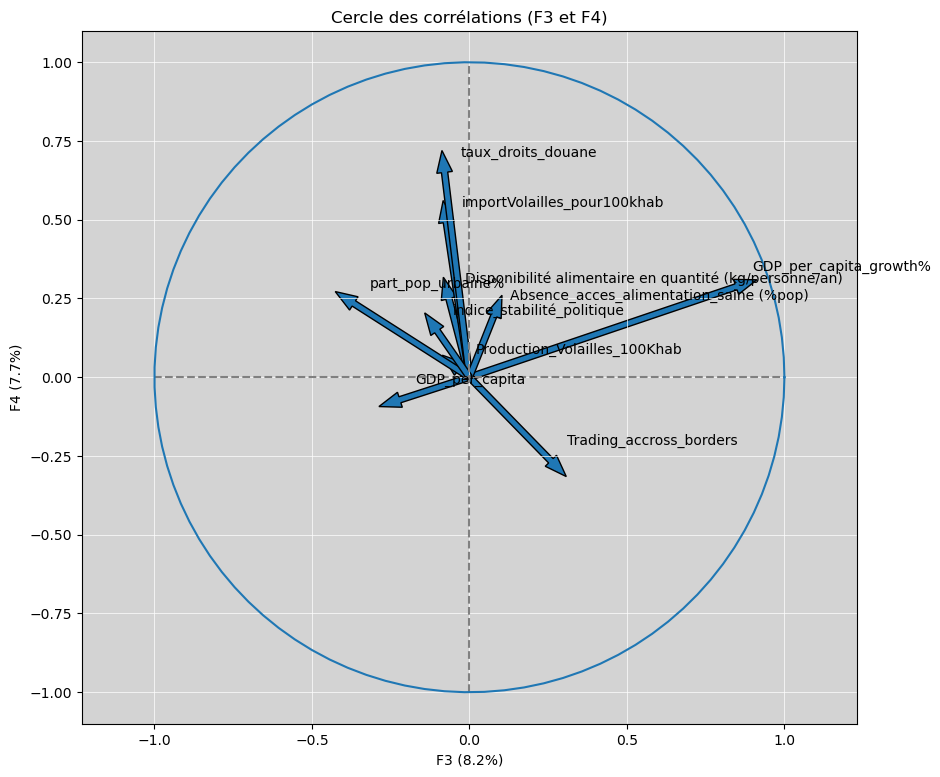

In [38]:
x_y = (2,3)
correlation_graph(pca, x_y, features)

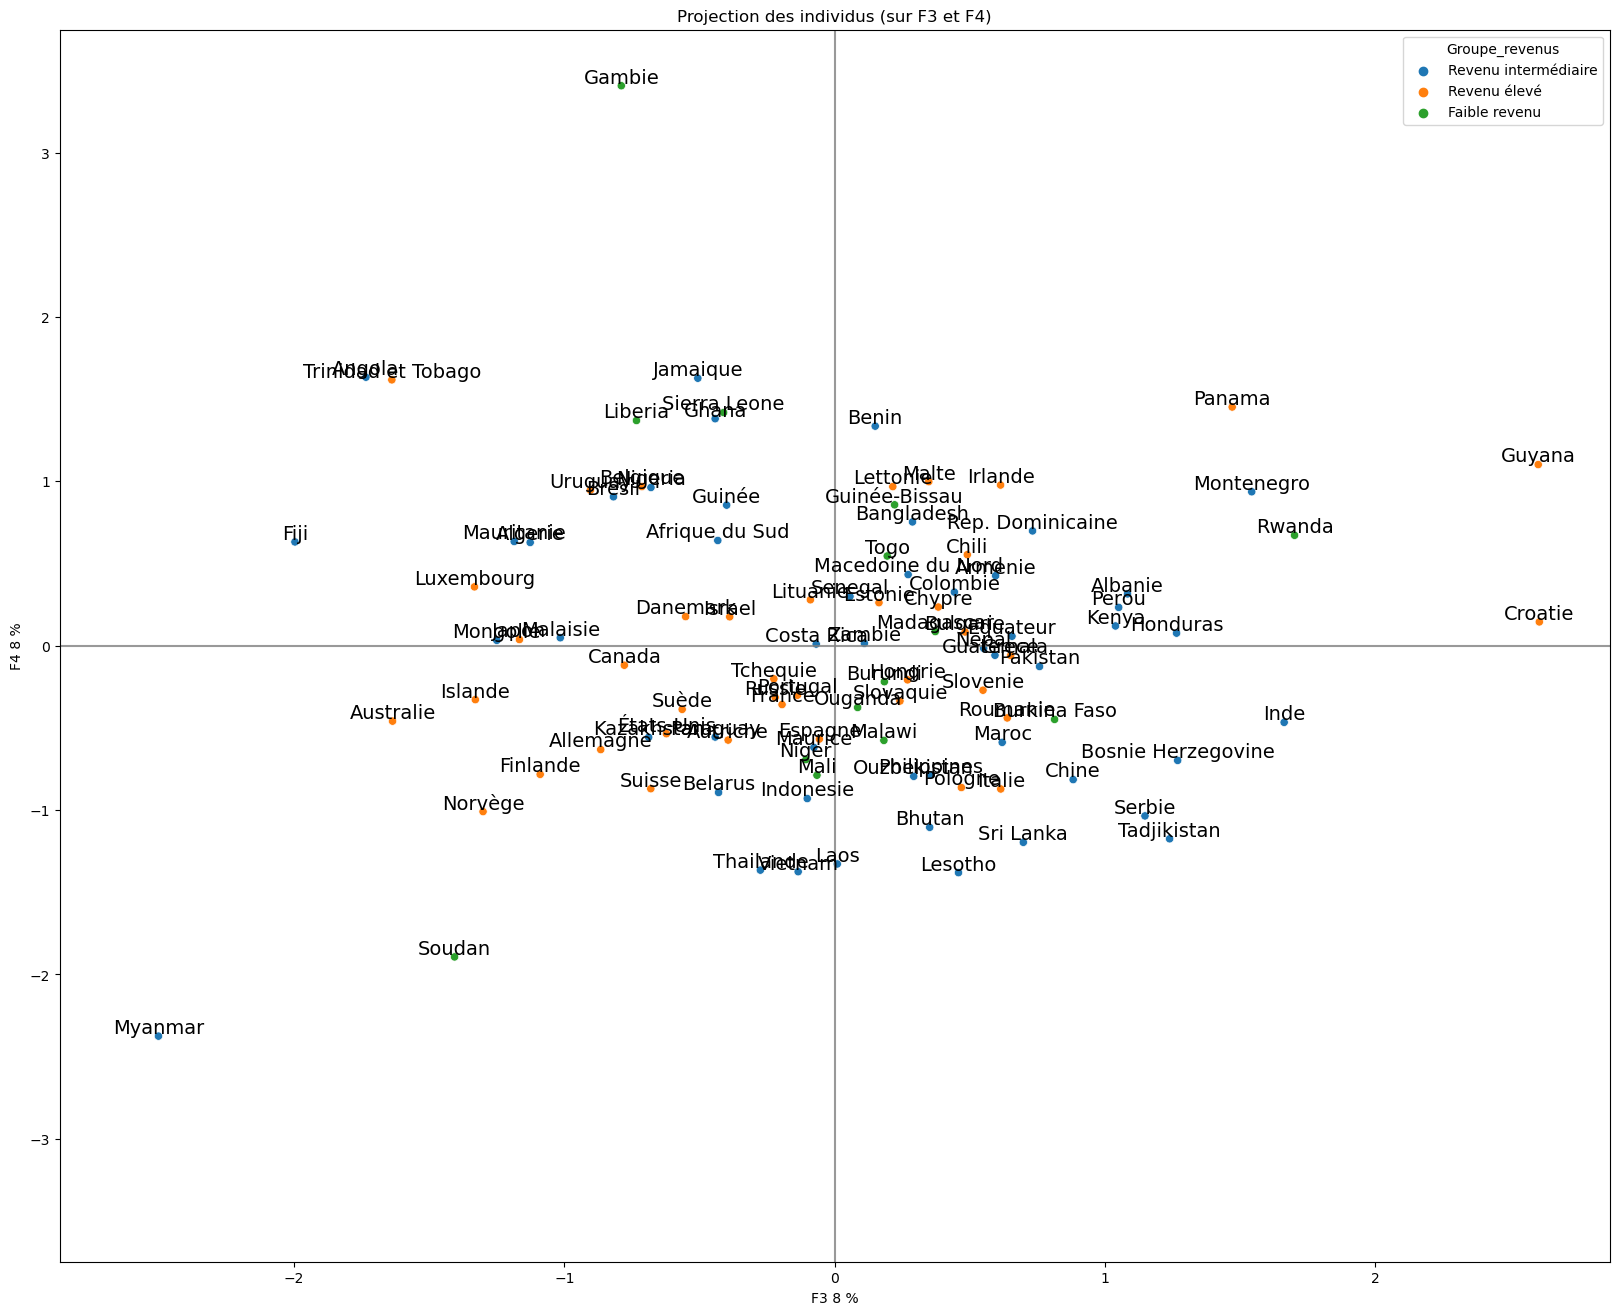

In [39]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Groupe_revenus'], marker="o")

In [40]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_proj**2) / (X_proj.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)
contrib_df

PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0       0.072449     1.721726     0.218632     0.508368     0.500941   
1       0.357305     1.252313     1.369092     0.123205     1.050603   
2       0.819206     0.043556     1.482111     0.489307     1.976041   
3       0.644141     0.742847     0.875138     0.495069     0.000036   
4       1.722159     0.051978     3.511598     3.309795     0.512585   
..           ...          ...          ...          ...          ...   
99      0.082109     0.055510     0.953809     1.110510     0.093003   
100     0.067730     0.021097     0.021412     2.343361     0.001726   
101     1.084626     0.167397     0.013989     0.000267     0.405884   
102     0.000035     0.952245     0.501685     0.004133     0.068767   
103     1.766531     4.114630     0.452919     0.355309     0.041299   

     PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  
0       0.885815     0.258559     0.004732     2.758569      0.737982  
1       1.659388     0.610774     0.564308     0.332045      1.384587  
2       6.054195     0.014830     0.151627     2.427333      0.548293  
3       0.253785     0.096586     0.002706     0.010764      0.113421  
4       0.044048     0.110942     0.007321     0.664884      0.115378  
..           ...          ...          ...          ...           ...  
99      4.662670     3.943837     0.309809     1.233635      0.195820  
100     0.092017     1.344519     0.378033     3.299319      0.182663  
101     0.057971     3.077458     0.104962     3.796101      0.184709  
102     0.660198     0.184937     0.188083     0.090588      0.136761  
103     0.021767     2.534095     0.260742     0.229643      0.000769  

[104 rows x 10 columns]

In [41]:
df_sorted = contrib_df.sort_values(by='PC1_contrib', ascending=False)
df_sorted['PC1_contrib'].head(5)

15    3.735580
69    3.592166
68    3.466586
43    3.023377
55    2.698892
Name: PC1_contrib, dtype: float64

Score de kaiser : 100/100 = 1% - 38/105 individus contribuent à plus de 1% à la formation de l'axe donc pas un plus importants que l'autre sans constater un qui se détache.

In [42]:
# Sélectionner les indices des 10 premières lignes
top_10_indicesF1 = df_sorted.head(10).index
print(top_10_indicesF1)

Index([15, 69, 68, 43, 55, 67, 89, 72, 60, 8], dtype='int64')


In [43]:
# Liste des indices spécifiques
valeurs_pays = df.index[top_10_indicesF1]
print(valeurs_pays)

Index(['Burundi', 'Nigeria', 'Niger', 'Irlande', 'Luxembourg', 'Myanmar',
       'Soudan', 'Ouganda', 'Mali', 'Bangladesh'],
      dtype='object', name='Pays')


In [44]:
df_sorted = contrib_df.sort_values(by='PC2_contrib', ascending=False)
df_sorted['PC2_contrib'].head(5)

45     9.544411
38     8.462498
12     6.463830
55     5.801148
103    4.114630
Name: PC2_contrib, dtype: float64

31 pays contribuent > 1% à la formation de l'axe 2 sans en identifier un plus particulièrement

In [45]:
# Sélectionner les indices des 10 premières lignes
top_10_indicesF2 = df_sorted.head(10).index
print(top_10_indicesF2)
valeurs_pays = df.index[top_10_indicesF2]
print(valeurs_pays)

Index([45, 38, 12, 55, 103, 80, 47, 75, 56, 6], dtype='int64')
Index(['Israel', 'Guyana', 'Bresil', 'Luxembourg', 'États-Unis', 'Perou',
       'Jamaique', 'Panama', 'Macedoine du Nord', 'Australie'],
      dtype='object', name='Pays')


In [46]:
df_sorted = contrib_df.sort_values(by='PC3_contrib', ascending=False)
df_sorted['PC3_contrib'].head(5)

24    7.929650
38    7.905363
67    7.306696
28    4.655213
4     3.511598
Name: PC3_contrib, dtype: float64

28 pays > 1% de contribution.

In [47]:
df_sorted = contrib_df.sort_values(by='PC4_contrib', ascending=False)
df_sorted['PC4_contrib'].head(5)

32    14.393145
67     6.995216
89     4.444414
4      3.309795
47     3.284477
Name: PC4_contrib, dtype: float64

30 pays contribuent > 1% à la formation de l'axe. A noter un individu plus particulièrement : la Gambie (cf. infra)

In [48]:
# Sélectionner les indices des 5 premières lignes
top_5_indicesF4 = df_sorted.head(5).index
print(top_5_indicesF4)
valeurs_pays = df.index[top_5_indicesF4]
print(valeurs_pays)

Index([32, 67, 89, 4, 47], dtype='int64')
Index(['Gambie', 'Myanmar', 'Soudan', 'Angola', 'Jamaique'], dtype='object', name='Pays')


<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">3.3 - Générer notre dataset avec uniquement les 4 premiers axes factoriels</h3>
<a id="section_3_3"></a>
</div>

In [49]:
# X_scaled est le df initial centré et réduit
# Calculer les scores des composantes principales
principal_components = pca.transform(X_scaled)
# Créer le df avec les 4 premières composantes principales
df_pca = pd.DataFrame(principal_components[:, :4], columns=['PC1-sous_developpement', 'PC2-DispoAlim_Production', 'PC3 - CroissancePIB', 'PC4-Commerce_Transfontalier'])
print(df_pca)

     PC1-sous_developpement  PC2-DispoAlim_Production  PC3 - CroissancePIB  \
0                  0.617881                  1.638033            -0.432813   
1                 -1.372168                 -1.397003             1.083078   
2                  2.077709                  0.260533            -1.126896   
3                 -1.842377                 -1.075946            -0.865928   
4                  3.012484                 -0.284610            -1.734586   
..                      ...                       ...                  ...   
99                -0.657783                  0.294122            -0.904012   
100                0.597418                 -0.181323            -0.135447   
101                2.390716                 -0.510758             0.109481   
102               -0.013658                  1.218190             0.655630   
103               -3.051046                  2.532247            -0.622951   

     PC4-Commerce_Transfontalier  
0                       0.64

### Dénomination des variables synthétiques interprétées

+ PC1-sous_developpement
+ PC2-DispoAlim_Production
+ PC3-CroissancePIB
+ PC4-Commerce_Transfontalier

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Clustering</h2><a class="anchor" id="Etape_4"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1 - Classification ascendante hiérarchique</h3>
<a id="section_4_1"></a>
</div>

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1.1 - Matrice de liaison</h3>
<a id="sub_section_4_1_1"></a>
</div>

In [51]:
#Construction de la matrice des distances pour le df total centré et réduit X_SCALED
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')
pd.DataFrame(linkage_matrix)

0      1          2      3
0     14.0   74.0   0.619239    2.0
1     37.0   97.0   0.688982    2.0
2     20.0   62.0   0.801909    2.0
3     42.0   77.0   0.837807    2.0
4     27.0   54.0   0.855362    2.0
..     ...    ...        ...    ...
98   168.0  195.0   7.329979   17.0
99   196.0  202.0   8.534942   33.0
100  189.0  201.0  11.385227   38.0
101  200.0  204.0  15.116234   71.0
102  203.0  205.0  28.138050  104.0

[103 rows x 4 columns]

La matrice de liaison a un forme spécifique. Cette matrice de liaison ne contient pas les distances entre toutes les paires d’observations, mais plutôt les informations sur les fusions successives des clusters.
La matrice de liaison a toujours 4 colonnes, indépendamment du nombre de variables dans votre jeu de données d’origine. Voici ce que chaque colonne représente :

+ Colonne 1 : Indice du premier cluster fusionné.
+ Colonne 2 : Indice du second cluster fusionné.
+ Colonne 3 : Distance entre les clusters fusionnés.
+ Colonne 4 : Nombre d’observations dans le nouveau cluster formé.

In [52]:
#Construction de la matrice des distances n°2 du df_pca DF_PCA
linkage_matrix2 = linkage(df_pca, method='ward', metric='euclidean')
pd.DataFrame(linkage_matrix2)

0      1          2      3
0     14.0   74.0   0.376064    2.0
1     59.0   72.0   0.385995    2.0
2     37.0   97.0   0.397926    2.0
3     19.0   83.0   0.416202    2.0
4     92.0   95.0   0.447783    2.0
..     ...    ...        ...    ...
98   191.0  198.0   6.260437   19.0
99   194.0  201.0   7.771092   32.0
100  197.0  202.0  12.166680   39.0
101  200.0  204.0  15.079108   72.0
102  203.0  205.0  27.944033  104.0

[103 rows x 4 columns]

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1.2 - Dendrogrammes CAH sur DF scaled</h3>
<a id="sub_section_4_1_2"></a>
</div>

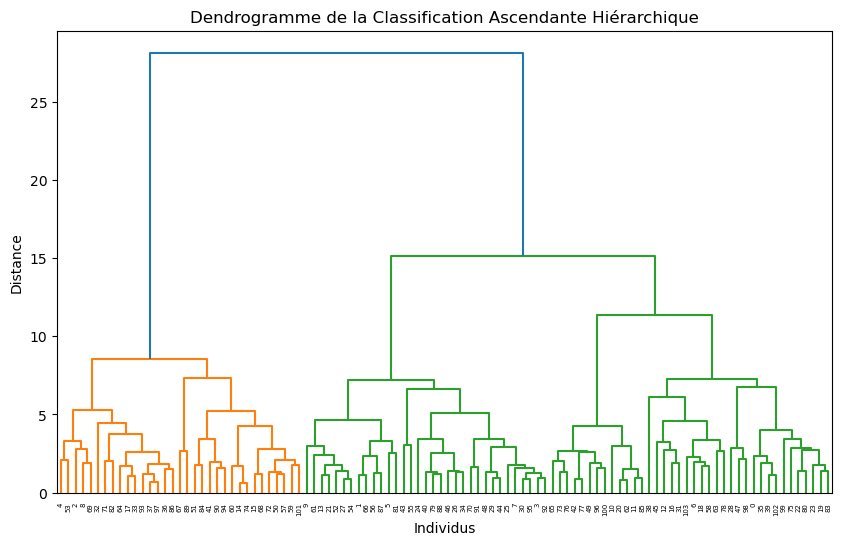

In [53]:
# Affichage du dendrogramme sur df_scaled
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

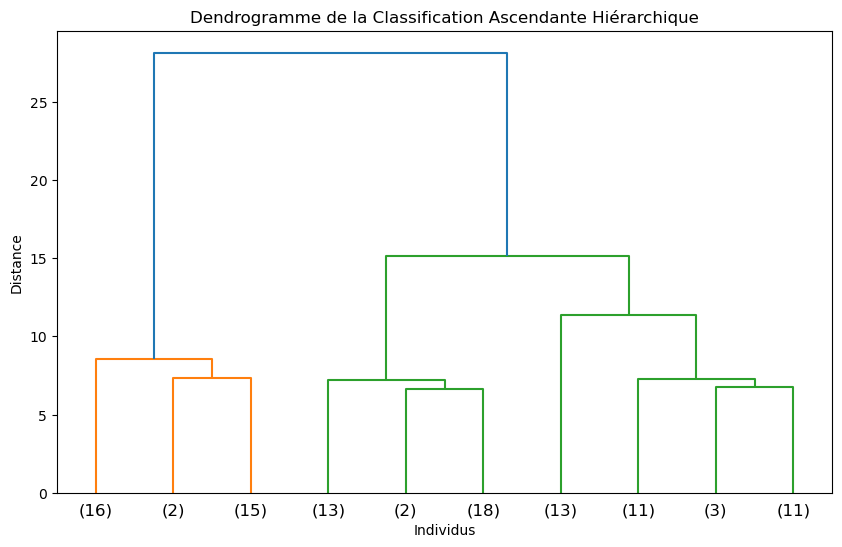

In [54]:
# Affichage du dendrogramme sur df_scaled
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,p=10, truncate_mode="lastp")
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1.3 - Dendrogrammes CAH sur DF_PCA</h3>
<a id="sub_section_4_1_3"></a>
</div>

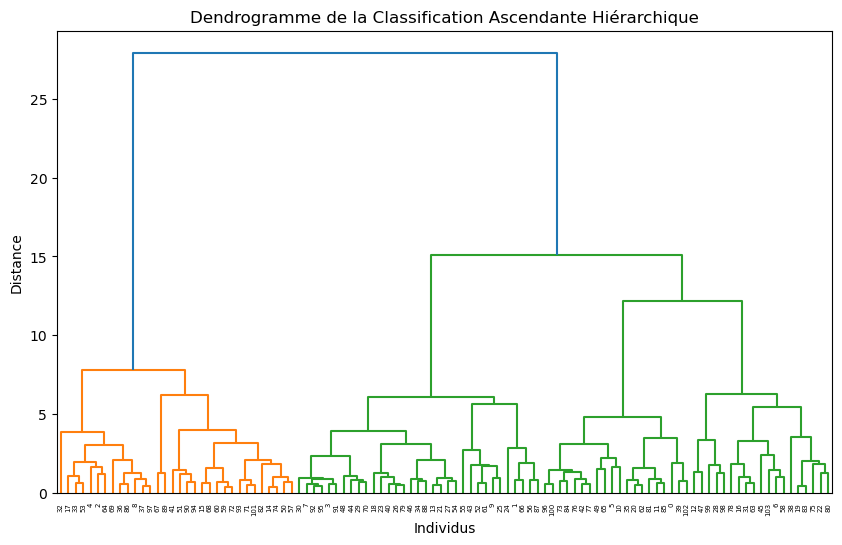

In [55]:
# Affichage du dendrogramme n°2 sur PCA
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix2)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

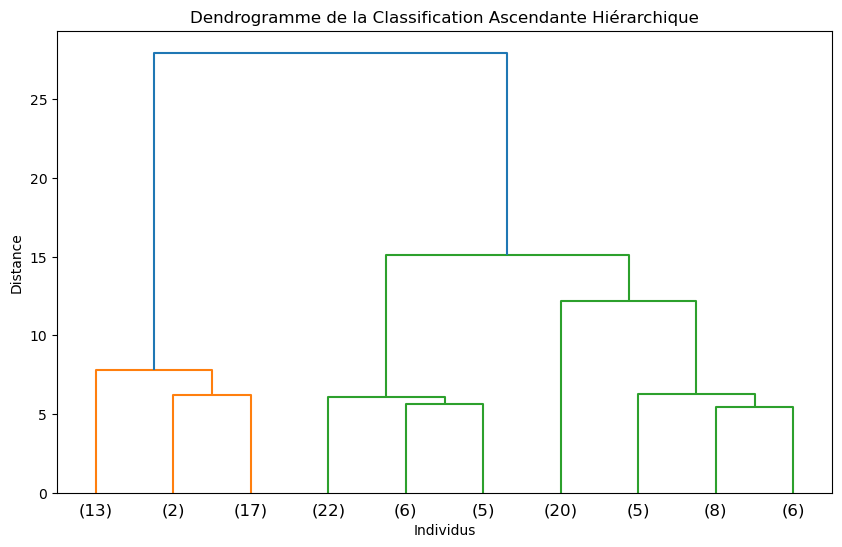

In [56]:
# Affichage du dendrogramme sur df_pca
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix2,p=10, truncate_mode="lastp")
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.1.4 - Définition des clusters</h3>
<a id="sub_section_4_1_4"></a>
</div>

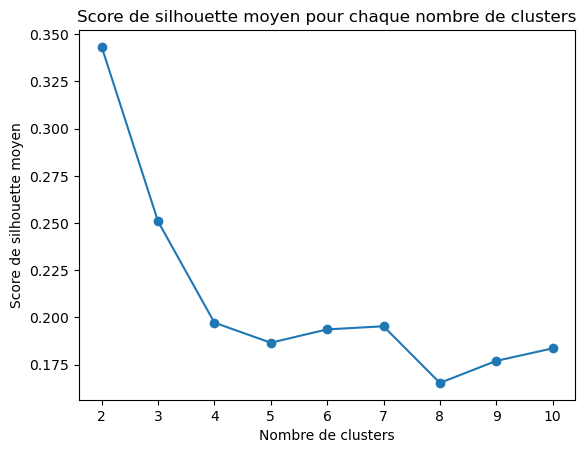

Nombre optimal de clusters : 2


In [57]:
# Effectuer la CAH avec différentes coupes du dendrogramme DF_SCALED
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

Un score de silhouette est une mesure de la qualité de la classification obtenue par un algorithme de clustering, comme la Classification Ascendante Hiérarchique (CAH). Il varie généralement entre -1 et 1, où : 
- 1 indique que les clusters sont bien séparés et que les points sont bien regroupés au sein de leurs clusters.
- 0 indique que les points sont à la frontière des clusters.
- -1 indique que les points sont probablement mal assignés aux clusters.

Ici, le meilleur score est pour une séparation en 2 groupes (0.350).

In [58]:
# Choisir le nombre de clusters sur df_scaled
num_clusters = 2

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame
df_quanti['Cluster_cah'] = clusters

# Afficher les statistiques des clusters
cluster_stats = df_quanti.groupby('Cluster_cah').mean()
cluster_stats

Disponibilité alimentaire en quantité (kg/personne/an)  \
Cluster_cah                                                           
1                                                     5.790909        
2                                                    27.834507        

             importVolailles_pour100khab  Production_Volailles_100Khab  \
Cluster_cah                                                              
1                               0.245769                      0.339579   
2                               0.766150                      2.757213   

             GDP_per_capita  GDP_per_capita_growth%  Trading_accross_borders  \
Cluster_cah                                                                    
1               4960.545455                1.993095                58.866548   
2              41541.676056                6.365631                85.475511   

             taux_droits_douane  part_pop_urbaine%  \
Cluster_cah                                          
1                      8.369091          39.893242   
2                      2.568451          70.027535   

             Absence_acces_alimentation_saine (%pop)  \
Cluster_cah                                            
1                                          60.860606   
2                                          16.283099   

             indice_stabilité_politique  
Cluster_cah                              
1                             -0.746310  
2                              0.259456

### Analyse des 2 clusters issus de la CAH sur DF initial

+ Cluster 1 :
- peu de disponibilité alimentaire
- Importation rapportée à la population sous la moyenne (et la médiane) mais l'autosuffisance (production) aussi basse.
- GDP per capita faible et qui croit peu
- Score de commerce transfontalier bien en dessous-de la moyenne et droits de douane importants
- Part de la population urbaine bien plus faible que la moyenne
- Absence d'accès à une alimentation saine plus élevée que la moyenne
- Score de stabilité politique moins bon que la moyenne

+ Cluster 2 : 
- disponibilité alimentaire  > moyenne
- Place de l'import élevé (> moy sur les 2) mais également producteur (= moyenne)
- GDP per capita très élevé et en croissance (> moy)
- Score commerce transfontalier plus élevé que la moyenne et droits de douane plus faible que la moyenne
- Part de la population urbaine > à la moyenne
- Peu d'absence d'accès à une alimentation saine
- Score de stabilité politique bien meilleur que la moyenne

**Le cluster 2 est plus intéressant pour notre projet d'export.**

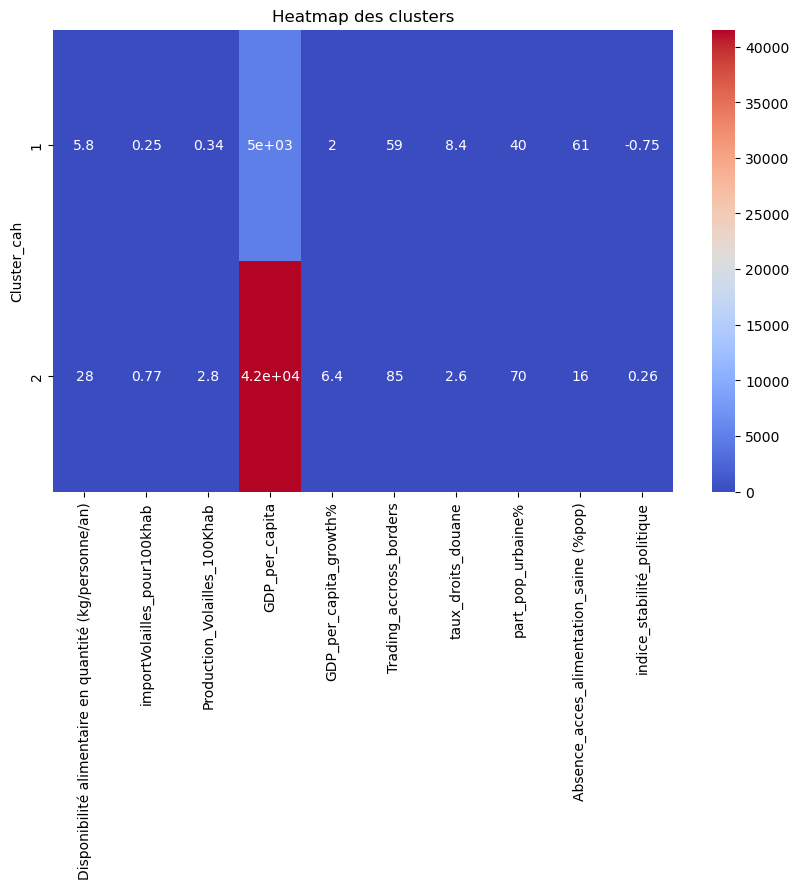

In [59]:
# Créer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm')
plt.title('Heatmap des clusters')
plt.show()

In [60]:
# Grouper par Cluster_cah et obtenir les pays pour chaque cluster
clusters_quanti = df_quanti.groupby('Cluster_cah').apply(lambda x: x.index.tolist())
# Afficher les pays pour chaque cluster
for cluster, countries in clusters_quanti.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 1: ['Algerie', 'Angola', 'Bangladesh', 'Burkina Faso', 'Burundi', 'Benin', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Inde', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Myanmar', 'Niger', 'Nigeria', 'Nepal', 'Ouganda', 'Pakistan', 'Rwanda', 'Laos', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Senegal', 'Tadjikistan', 'Togo', 'Zambie']
Cluster 2: ['Afrique du Sud', 'Albanie', 'Allemagne', 'Armenie', 'Australie', 'Autriche', 'Belgique', 'Bhutan', 'Bosnie Herzegovine', 'Bresil', 'Bulgarie', 'Belarus', 'Canada', 'Chili', 'Chine', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Fiji', 'Finlande', 'France', 'Russie', 'Grece', 'Guatemala', 'Guyana', 'Honduras', 'Hongrie', 'Indonesie', 'Irlande', 'Islande', 'Israel', 'Italie', 'Jamaique', 'Japon', 'Kazakhstan', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malaisie', 'Malte', 'Maroc', 'Maurice', 'Mongolie', 'Montenegro', 'Norvège', 'Ouzbekistan', 'Panama',

C:\Users\candi\AppData\Local\Temp\ipykernel_12876\4175702942.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clusters_quanti = df_quanti.groupby('Cluster_cah').apply(lambda x: x.index.tolist())


In [61]:
#Taille des clusters
cluster_taille = df_quanti.groupby('Cluster_cah').size()
cluster_taille

Cluster_cah
1    33
2    71
dtype: int64

Le groupe 2 de 71 pays semble mieux correspondre à notre projet d'export mais cela nécessite d'étudier davantage ce groupe.

### Analyse des clusters issus de la CAH sur DF_PCA

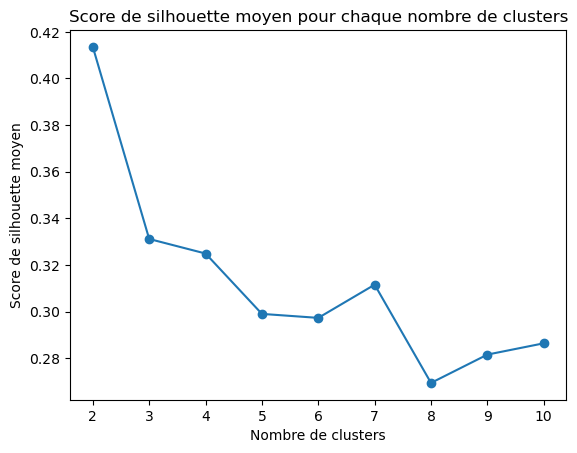

Nombre optimal de clusters : 2


In [62]:
# Effectuer la CAH avec df_pca
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage_matrix2, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_pca, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

Je choisis 3 car j'ai besoin de réduire le nombre de pays par groupe et le score de silhouette est équivalent à celui obtenu dans la CAH du df_SCALED pour 2 groupes.

In [63]:
# Demander à l'utilisateur de choisir le nombre de clusters sur 3ème option pf_pca
num_clusters = 3

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix2, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame
df_pca['Cluster'] = clusters

# Afficher les statistiques des clusters
cluster_stats = df_pca.groupby('Cluster').mean()
cluster_stats

PC1-sous_developpement  PC2-DispoAlim_Production  \
Cluster                                                     
1                      2.894264                 -0.206293   
2                     -2.221838                 -0.900768   
3                     -0.494764                  0.931455   

         PC3 - CroissancePIB  PC4-Commerce_Transfontalier  
Cluster                                                    
1                  -0.025914                     0.164036  
2                  -0.045871                    -0.020916  
3                   0.060077                    -0.116895

### Analyse des clusters

+ **Cluster 1 :**
- Pays sous-développé (plus pauvre, moins accès alimentation faible, moins stable politiquement, moins urbain, etc.)
- Disponibilité alimentaire et production moindre que la moyenne (poids de l'import plus important)
- Croissance du PIB par habitant inférieur légèrement à la moyenne
- Droits de douane et import supérieure à la moyenne (moindre score commerce)

+ **Cluster 3 :**
- Pays intermédiaire plutôt développé
- Disponibilité alimentaire  importante avec production 
- Poids de l'import de volailles et droits de douane inférieur à la moyenne
- Croissance supérieure à la moyenne de la richesse

+ **Cluster 2 :**
- Pays dit développé (socio-économiquement)
- Faible disponibilité et production
- Croissance de la richesse légèrement inférieure à la moyenne
- Droits de douane et import proche de la moyenne (légèrement inférieurs)

Le cluster 2 semble être le plus intéressant pour l'export.

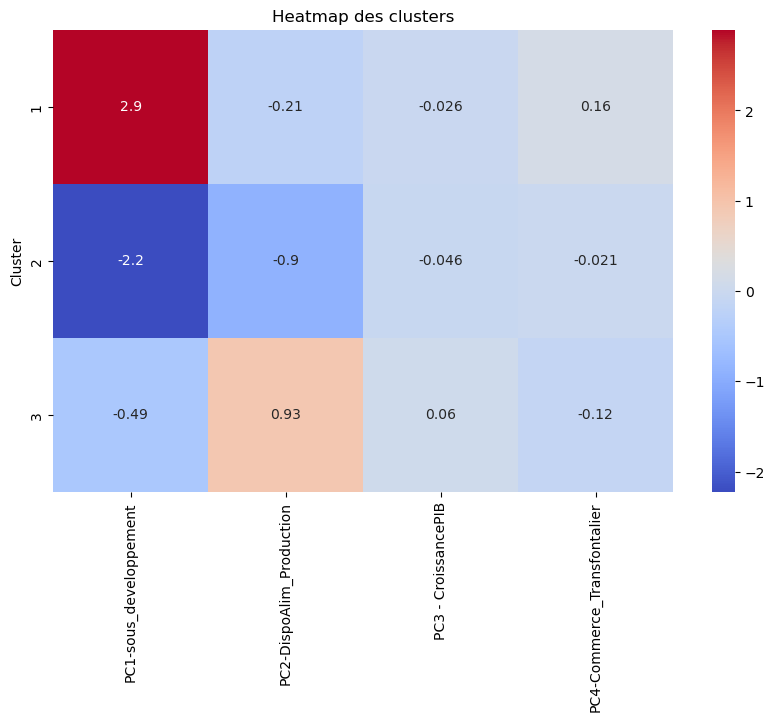

In [64]:
# Créer la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_stats, annot=True, cmap='coolwarm')
plt.title('Heatmap des clusters')
plt.show()


In [65]:
#Taille des clusters
cluster_taille = df_pca.groupby('Cluster').size()
cluster_taille

Cluster
1    32
2    33
3    39
dtype: int64

In [66]:
# Assigner les noms de pays comme index de df_pca
df_pca.index = df_quanti.index
# Grouper par Cluster_cah et obtenir les pays pour chaque cluster
clusters_pca = df_pca.groupby('Cluster').apply(lambda x: x.index.tolist())

# Afficher les pays pour chaque cluster
for cluster, countries in clusters_pca.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 1: ['Algerie', 'Angola', 'Bangladesh', 'Burkina Faso', 'Burundi', 'Benin', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Inde', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Myanmar', 'Niger', 'Nigeria', 'Nepal', 'Ouganda', 'Pakistan', 'Rwanda', 'Sierra Leone', 'Soudan', 'Sri Lanka', 'Senegal', 'Tadjikistan', 'Togo', 'Zambie']
Cluster 2: ['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Canada', 'Chypre', 'Costa Rica', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malte', 'Montenegro', 'Norvège', 'Portugal', 'Slovaquie', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Cluster 3: ['Afrique du Sud', 'Armenie', 'Australie', 'Bhutan', 'Bosnie Herzegovine', 'Bresil', 'Belarus', 'Chili', 'Chine', 'Colombie', 'Fiji', 'Russie', 'Guatemala', 'Guyana', 'Honduras', 'Indonesie', 'Israel', 'Jamaique', 'Kazakhsta

C:\Users\candi\AppData\Local\Temp\ipykernel_12876\2673799835.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clusters_pca = df_pca.groupby('Cluster').apply(lambda x: x.index.tolist())


C:\Users\candi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\candi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\candi\anaconda3\Lib\si

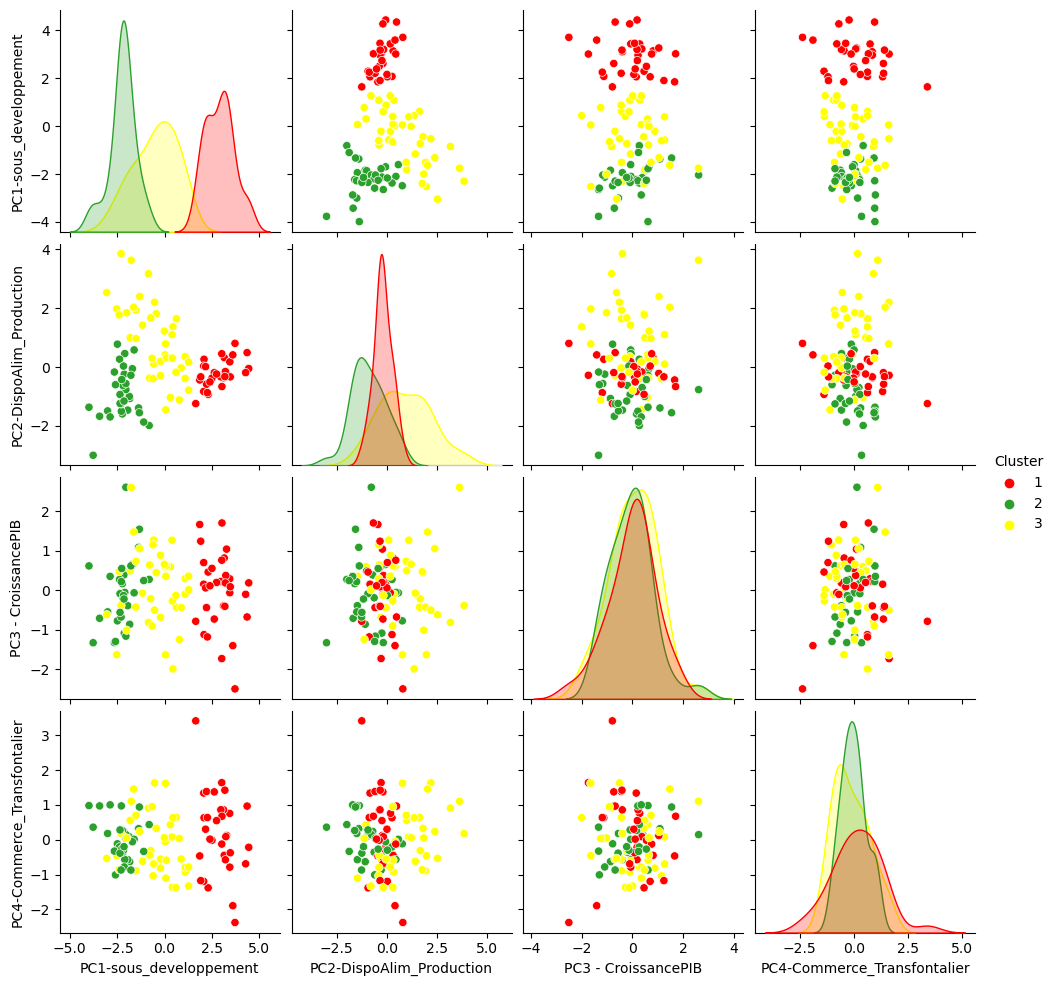

In [67]:
#Pairplot sur les clusters de la CAH
palette = sns.color_palette(["#ff0000", "#2ca02c", "#ffff00", "#7F00FF"])
sns.pairplot(df_pca, hue="Cluster", palette=palette)

In [68]:
import plotly.express as px
import pandas as pd
 # Réinitialiser l'index pour que 'sous_groupes' devienne une colonne
cluster_stats = cluster_stats.reset_index()
# Sélection des trois premières variables pour la vue 3D
dimensions = [col for col in df_pca.columns if col.startswith('PC')][:3]

# Création du scatter plot 3D
fig = px.scatter_3d(df_pca, x=dimensions[0], y=dimensions[1], z=dimensions[2], color='Cluster', hover_name=df_pca.index,width=1000, height=800)

# Ajout des centroïdes au graphique
fig.add_trace(px.scatter_3d(cluster_stats, x=dimensions[0], y=dimensions[1], z=dimensions[2], color='Cluster', symbol_sequence=['x']).data[0])

fig.show()

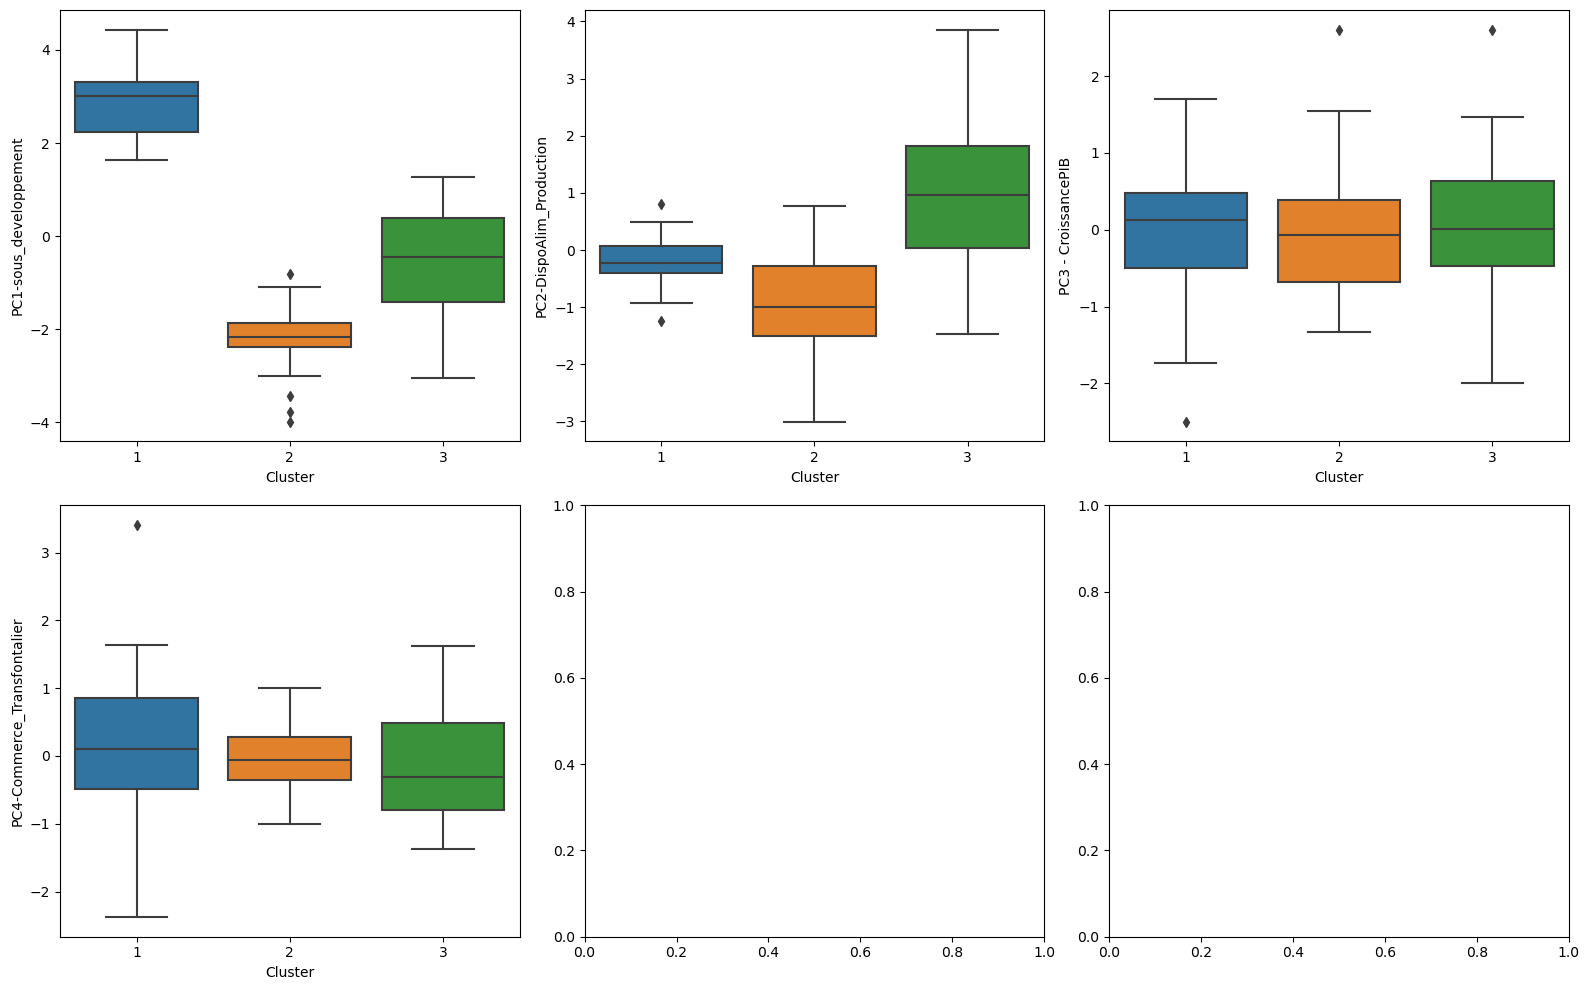

In [65]:
#Analyse des relations entre les variables et les clusters
# Nombre de colonnes à tracer
num_cols = len(df_pca.columns) - 1
#Calculer le nombre de lignes nécessaires pour les sous-graphiques
num_rows = (num_cols+2) // 3 # 3 colonnes par ligne
# Création des boxplots pour chaque variable en fonction de la catégorie de revenus
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 5 * num_rows))
row = 0
col = 0
for i in range(num_cols):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=df_pca['Cluster'], y=df_pca[df_pca.columns[i]], ax=axes)
    col += 1
plt.tight_layout()
plt.show()

### La cluster 2 semble bien être le plus intéressant pour notre projet :
- Pays plutôt riches
- Dispo alimentaire la plus basse (et moindre production?)

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.2 - Classification par la méthode des K-Means sur le dataset normalisé</h3>
<a id="section_4_2"></a>
</div>

In [287]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

In [288]:
#Instancier l'estimateur
kmeans = KMeans(n_clusters=2)

In [289]:
#Entrainer 
kmeans.fit(X_scaled)
#calculer inertie
kmeans.inertia_

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



629.2208505673093

Mesure de la qualité de l’ajustement des clusters aux données. Plus précisément, il représente la somme des carrés des distances entre chaque point de données et le centroïde de son cluster.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.2.1 - Méthode du coude</h3>
<a id="sub_section_4_2_1"></a>
</div>

In [290]:
#Liste vide pour stocker les inerties
intertia = []
#définir la liste de clusters que l'on veut tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [291]:
#pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list :
  kmeans = KMeans(n_clusters=i,n_init=10)
  kmeans.fit(X_scaled)
  intertia.append(kmeans.inertia_)

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

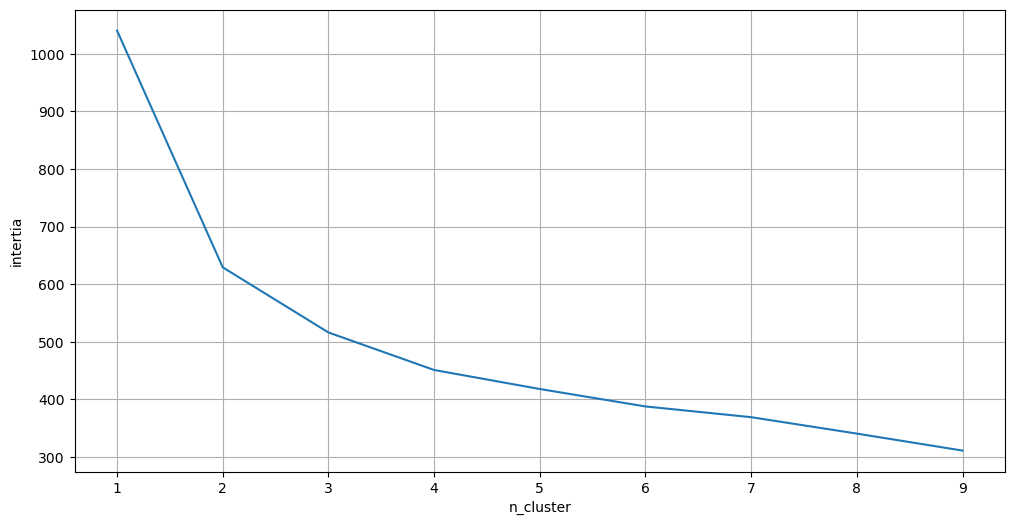

In [292]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax.grid(True)
ax = plt.plot(k_list, intertia)

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.2.2 - Nombre de clusters retenus</h3>
<a id="sub_section_4_2_2"></a>
</div>

Regardons les clusters que nous avons obtenus.
Nous devons d'abord ré-entrainer un estimateur:

In [293]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_scaled)

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4)

In [294]:
#Voici les clusters
kmeans.labels_

array([2, 1, 0, 1, 0, 3, 2, 1, 0, 1, 3, 3, 2, 1, 0, 0, 2, 0, 2, 2, 3, 1,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 3, 0, 0, 2, 3, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 3, 0, 3, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 3, 2, 0, 3,
       1, 0, 0, 0, 1, 0, 0, 3, 0, 2, 3, 3, 2, 1, 2, 1, 0, 2, 3, 3, 0, 1,
       1, 0, 3, 1, 1, 0, 3, 1, 3, 0, 2, 2, 3, 0, 2, 2])

In [295]:
# 0,1,2 est à considérer comme une variable catégorielle cardinale. Il n'y a pas d'ordre entre les clusters.
#Le cluster 0 n'est pas supérieur au cluster 1 par exemple. Considérez que c'est plus un id qu'une valeur.
#nous allons utiliser des lettres plutôt que des nombres:
dd = {i:j for i,j in enumerate(list("abcd"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

In [296]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['c', 'b', 'a', 'b', 'a', 'd', 'c', 'b', 'a', 'b']

In [297]:
#Ajoutons les labels à DF_SCALED
df_quanti["cluster_K"] = labels
df_quanti

Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afrique du Sud                                              39.57        
Albanie                                                     22.56        
Algerie                                                      6.13        
Allemagne                                                   16.51        
Angola                                                      10.52        
...                                                           ...        
Uruguay                                                     23.66        
Vietnam                                                     14.95        
Zambie                                                       4.94        
Equateur                                                    28.78        
États-Unis                                                  53.54        

                importVolailles_pour100khab  Production_Volailles_100Khab  \
Pays                                                                        
Afrique du Sud                     0.503191                      3.240944   
Albanie                            1.711598                      0.655506   
Algerie                            0.000000                      0.602984   
Allemagne                          0.933924                      1.783806   
Angola                             0.861406                      0.160832   
...                                     ...                           ...   
Uruguay                            0.350559                      2.190991   
Vietnam                            0.273116                      1.263416   
Zambie                             0.277106                      0.247937   
Equateur                           0.005497                      2.842145   
États-Unis                         0.057029                      6.577790   

                GDP_per_capita  GDP_per_capita_growth%  \
Pays                                                     
Afrique du Sud           15331                3.662368   
Albanie                  19493                9.922714   
Algerie                  16028                2.093488   
Allemagne                66616                3.120163   
Angola                    7929               -1.954598   
...                        ...                     ...   
Uruguay                  32746                5.648961   
Vietnam                  14051                1.691633   
Zambie                    3865                3.259458   
Equateur                 15117                8.527937   
États-Unis               77247                5.633868   

                Trading_accross_borders  taux_droits_douane  \
Pays                                                          
Afrique du Sud                 59.64271                4.46   
Albanie                        96.29094                1.13   
Algerie                        38.42879               10.29   
Allemagne                      91.77378                1.39   
Angola                         36.15152               11.33   
...                                 ...                 ...   
Uruguay                        58.39115                5.25   
Vietnam                        70.82859                1.17   
Zambie                         56.87656                4.81   
Equateur                       71.15372                4.63   
États-Unis                     92.01404                1.47   

                part_pop_urbaine%  Absence_acces_alimentation_saine (%pop)  \
Pays                                                                         
Afrique du Sud             68.819                                     61.2   
Albanie                    64.603                                     12.2   
Algerie                    75.268                                     19.7   
Allemagne                  77.765                                      2.2   
Angola  

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.2.3 - Analyse des clusters</h3>
<a id="sub_section_4_2_3"></a>
</div>

In [298]:
# Afficher les statistiques des clusters issus du Kmeans
cluster_stats = df_quanti.groupby('cluster_K').mean()
cluster_stats

Disponibilité alimentaire en quantité (kg/personne/an)  \
cluster_K                                                           
a                                                   5.966786        
b                                                  22.900938        
c                                                  43.257826        
d                                                  12.977143        

           importVolailles_pour100khab  Production_Volailles_100Khab  \
cluster_K                                                              
a                             0.284376                      0.321142   
b                             1.258548                      2.064077   
c                             0.349130                      4.669061   
d                             0.297191                      1.168447   

           GDP_per_capita  GDP_per_capita_growth%  Trading_accross_borders  \
cluster_K                                                                    
a             4436.000000                1.610031                55.568607   
b            59672.562500                7.104805                96.209268   
c            33365.869565                6.267250                76.186393   
d            14857.714286                4.816692                77.354891   

           taux_droits_douane  part_pop_urbaine%  \
cluster_K                                          
a                    9.256071          41.571643   
b                    1.537500          74.761344   
c                    3.835217          73.053217   
d                    2.950476          50.087571   

           Absence_acces_alimentation_saine (%pop)  \
cluster_K                                            
a                                        62.489286   
b                                         8.046875   
c                                        22.900000   
d                                        30.028571   

           indice_stabilité_politique  Cluster_cah  
cluster_K                                           
a                           -0.830257     1.000000  
b                            0.626317     2.000000  
c                            0.090912     2.000000  
d                           -0.242513     1.761905

### Analyse des clusters K-means sur df_scaled

+ **Cluster d :**
- Pays dit intermédiaire inférieur en terme de développement socio économique (dans la moyenne) et en croissance forte des richesses
- poids de l'import et production inférieurs à la moyenne
- Dispo alimentaire inférieure à la moyenne
- score de commerce transfontalier dans la moyenne
- Taux de droits de douane sous la moyenne mais > à la médiane
- Part de la pop urbaine <  moyenne
- Taux d'absence d'accès à l'alimentation saine (= moyenne mais >+ médiane)
- Indice de stabilité politique légèrement > à la moyenne

+ **Cluster c :**
- Pays dit intermédiaire supérieur en terme de développement socio économique (dans la moyenne) et en croissance forte des richesses
- poids de l'import plutôt bas et production forte
- Dispo alimentaire très importante (la plus imp) 
- score de commerce transfontalier dans la moyenne
- Taux de droits de douane sous la moyenne mais > à la médiane
- Part de la pop urbaine > moyenne
- Taux d'absence d'accès à l'alimentation saine (< moyenne mais > médiane)
- Indice de stabilité politique dans la moyenne

+ **Cluster a :**
- Pays dit sous développé (moins richesse et développement socio éco et droits de douane très élevé)
- Poids de l'import volailles inférieur à la moyenne et médiane
- Dispo alimentaire bien  inférieure à la moyenne et faible production/hab
- Croissance richesse et pop bien inférieure à la moyenne
- Score de commerce frontalier bien inférieur à la moyenne
- Part de la population urbaine bien inférieur à la moyenne
- Forte absence d'accès à une alimentation saine
- Indice de stabilité politique < à la moyenne

+ **Cluster b :**
- Pays supérieur de la moyenne en terme de développement socio-économique
- Au-dessus de la moyenne en import de volailles et production (+) dans la moyenne
- Disponibilité alimentaire supérieure à la moyenne (peu sup)
- Croissance positive de la richesse
- Score de commerce transfontalier (bien > moy)
- Taux de droits de douane très bas
- Part de la pop urbaine le plus important
- Très peu d'absence d'accès à alimentation saine
- Bon indice de stabilité politique


Le cluster b semble être le plus intéressant pour notre projet.

In [327]:
# Grouper par Cluster_cah et obtenir les pays pour chaque cluster
clusters_quanti = df_quanti.groupby('cluster_K').apply(lambda x: x.index.tolist())

# Afficher les pays pour chaque cluster
for cluster, countries in clusters_quanti.items():
    print(f"Cluster {cluster}: {countries}")

Cluster a: ['Algerie', 'Angola', 'Bangladesh', 'Burkina Faso', 'Burundi', 'Benin', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Myanmar', 'Niger', 'Nigeria', 'Nepal', 'Ouganda', 'Pakistan', 'Rwanda', 'Sierra Leone', 'Soudan', 'Senegal', 'Togo', 'Zambie']
Cluster b: ['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malte', 'Montenegro', 'Norvège', 'Portugal', 'Roumanie', 'Slovaquie', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Cluster c: ['Afrique du Sud', 'Australie', 'Bresil', 'Belarus', 'Canada', 'Chili', 'Colombie', 'Costa Rica', 'Fiji', 'Russie', 'Guyana', 'Israel', 'Jamaique', 'Malaisie', 'Maurice', 'Panama', 'Pologne', 'Perou', 'Rep. Dominicaine', 'Trinidad et Tobago', 'Uruguay', 'Equateur', 'États-Unis']
Clu

C:\Users\candi\AppData\Local\Temp\ipykernel_3144\219790909.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [328]:
#Taille des clusters
cluster_taille = df_quanti.groupby('cluster_K').size()
cluster_taille

cluster_K
a    28
b    32
c    23
d    21
dtype: int64

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.3 - Classification par la méthode des K-Means sur le dataset issu de la PCA</h3>
<a id="section_4_2"></a>
</div>

In [329]:
# Suppression de la colonne 'Cluster' pour ne garder que les valeurs quanti du df_pca
df_pca_kms = df_pca.drop(columns=['Cluster'])

In [330]:
# Application de KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_pca_kms)

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4)

In [331]:
#nous allons utiliser des lettres plutôt que des nombres:
dd = {i:j for i,j in enumerate(list("ABCD"))}
dd

{0: 'A', 1: 'B', 2: 'C', 3: 'D'}

In [332]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['A', 'C', 'B', 'C', 'B', 'D', 'A', 'C', 'B', 'C']

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.3.1 - Méthode du coude</h3>
<a id="sub_section_4_3_1"></a>
</div>

In [333]:
#Liste vide pour stocker les inerties
inertia = []
#définir la liste de clusters que l'on veut tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [334]:
#pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
for i in k_list :
  kmeans = KMeans(n_clusters=i,n_init=10,random_state=42)
  kmeans.fit(df_pca_kms)
  inertia.append(kmeans.inertia_)

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

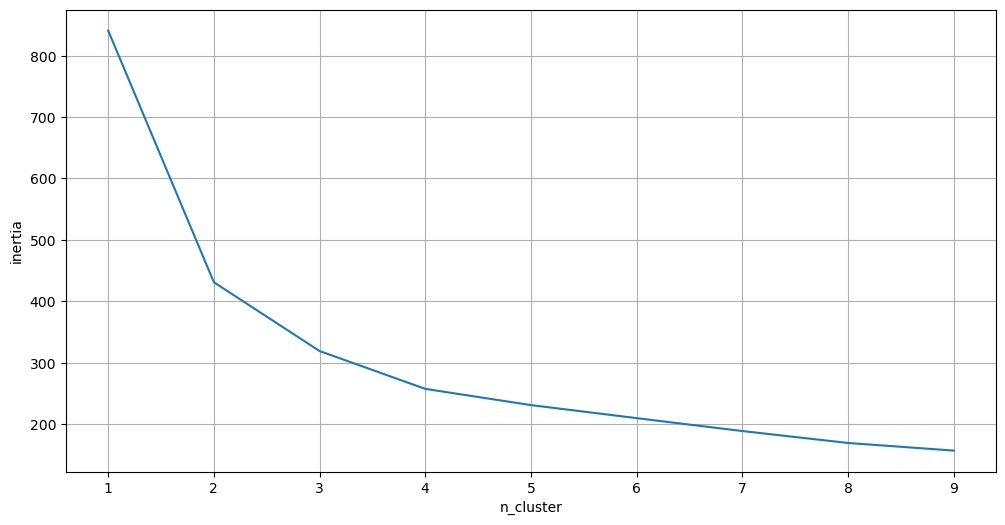

In [335]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax.grid(True)
ax = plt.plot(k_list, inertia)

Le coude s'infléchit après 4 clusters. Retenons 4 groupes. Meilleure inertie (plus faible distance) dans cette classification sur df_pca

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.3.2 - Analyse des clusters retenus</h3>
<a id="sub_section_4_3_2"></a>
</div>

In [336]:
#Ajoutons les labels à df_pca
df_pca_kms["cluster_K"] = labels
df_pca_kms

PC1-sous_developpement  PC2-DispoAlim_Production  \
Pays                                                               
Afrique du Sud                0.617881                  1.638033   
Albanie                      -1.372168                 -1.397003   
Algerie                       2.077709                  0.260533   
Allemagne                    -1.842377                 -1.075946   
Angola                        3.012484                 -0.284610   
...                                ...                       ...   
Uruguay                      -0.657783                  0.294122   
Vietnam                       0.597418                 -0.181323   
Zambie                        2.390716                 -0.510758   
Equateur                     -0.013658                  1.218190   
États-Unis                   -3.051046                  2.532247   

                PC3 - CroissancePIB  PC4-Commerce_Transfontalier cluster_K  
Pays                                                                        
Afrique du Sud            -0.432813                     0.640420         A  
Albanie                    1.083078                     0.315275         C  
Algerie                   -1.126896                     0.628299         B  
Allemagne                 -0.865928                    -0.631988         C  
Angola                    -1.734586                     1.634090         B  
...                             ...                          ...       ...  
Uruguay                   -0.904012                     0.946535         A  
Vietnam                   -0.135447                    -1.374976         D  
Zambie                     0.109481                     0.014685         B  
Equateur                   0.655630                     0.057746         A  
États-Unis                -0.622951                    -0.535400         A  

[104 rows x 5 columns]

In [337]:
# Afficher les statistiques des clusters issus du Kmeans
cluster_stats = df_pca_kms.groupby('cluster_K').mean()
cluster_stats

PC1-sous_developpement  PC2-DispoAlim_Production  \
cluster_K                                                     
A                       -1.270443                  1.776294   
B                        3.018007                 -0.175510   
C                       -2.232875                 -1.002463   
D                        0.633415                 -0.221096   

           PC3 - CroissancePIB  PC4-Commerce_Transfontalier  
cluster_K                                                    
A                    -0.157609                     0.314258  
B                    -0.174494                     0.338127  
C                    -0.021500                    -0.018764  
D                     0.417153                    -0.732446

### Analyse des clusters Kmeans sur df_pca_kms

+ **Cluster A :**
- Pays dit intermédiaire supérieur en terme de développement socio économique
- poids de l'import peu importante
- Dispo alimentaire et production importante
- Croissance richesse légèrement supérieure à la moyenne
- Score commerce inférieur à la moyenne et/ou droits de douane et import légèrement supérieur

+ **Cluster B :**
- Pays dit sous développé (moins richesse et développement socio éco)
- Poids de l'import volailles supérieur à la moyenne (peu de production et dispo ?)
- Dispo alimentaire inférieure à la moyenne
- Droits de douane et import élevé, compensé par score commerce moindre
- Croissance richesse légèrement supérieure à la moyenne

+ **Cluster C :**
- Pays supérieur à la moyenne en terme de développement socio-économique
- Plutôt inférieur à la moyenne dispo et production et supérieure en import
- Score commerce important et moindre droits de douane
- Croissance positive de la richesse

+ **Cluster D :**
- Pays dit intermédiaire inférieur en terme de développement socio économique
- poids de l'import plutôt importante
- Dispo alimentaire et production peu importante
- Croissance richesse légèrement supérieur à la moyenne
- Score commerce supérieure à la moyenne et/ou droits de douane et import faible

Le cluster C semble être le plus intéressant pour notre projet.

In [338]:
# Ajouter une colonne 'Pays' à df_pca en utilisant les index de df_initial
df_pca_kms['Pays'] = df.index.values
df_quanti['Pays'] = df.index.values
# Réindexer df_pca en utilisant la colonne 'Pays'
df_pca_kms.set_index('Pays', inplace=True)
df_quanti.set_index('Pays', inplace=True)
df_pca_kms

PC1-sous_developpement  PC2-DispoAlim_Production  \
Pays                                                               
Afrique du Sud                0.617881                  1.638033   
Albanie                      -1.372168                 -1.397003   
Algerie                       2.077709                  0.260533   
Allemagne                    -1.842377                 -1.075946   
Angola                        3.012484                 -0.284610   
...                                ...                       ...   
Uruguay                      -0.657783                  0.294122   
Vietnam                       0.597418                 -0.181323   
Zambie                        2.390716                 -0.510758   
Equateur                     -0.013658                  1.218190   
États-Unis                   -3.051046                  2.532247   

                PC3 - CroissancePIB  PC4-Commerce_Transfontalier cluster_K  
Pays                                                                        
Afrique du Sud            -0.432813                     0.640420         A  
Albanie                    1.083078                     0.315275         C  
Algerie                   -1.126896                     0.628299         B  
Allemagne                 -0.865928                    -0.631988         C  
Angola                    -1.734586                     1.634090         B  
...                             ...                          ...       ...  
Uruguay                   -0.904012                     0.946535         A  
Vietnam                   -0.135447                    -1.374976         D  
Zambie                     0.109481                     0.014685         B  
Equateur                   0.655630                     0.057746         A  
États-Unis                -0.622951                    -0.535400         A  

[104 rows x 5 columns]

In [339]:
# Grouper par Cluster_K et obtenir les pays pour chaque cluster
clusters_kms = df_pca_kms.groupby('cluster_K').apply(lambda x: x.index.tolist())

# Afficher les pays pour chaque cluster
for cluster, countries in clusters_kms.items():
    print(f"Cluster {cluster}: {countries}")

Cluster A: ['Afrique du Sud', 'Australie', 'Bresil', 'Belarus', 'Canada', 'Chili', 'Colombie', 'Costa Rica', 'Fiji', 'Russie', 'Guyana', 'Israel', 'Jamaique', 'Malaisie', 'Maurice', 'Panama', 'Pologne', 'Perou', 'Rep. Dominicaine', 'Trinidad et Tobago', 'Uruguay', 'Equateur', 'États-Unis']
Cluster B: ['Algerie', 'Angola', 'Bangladesh', 'Burkina Faso', 'Burundi', 'Benin', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Myanmar', 'Niger', 'Nigeria', 'Nepal', 'Ouganda', 'Pakistan', 'Rwanda', 'Sierra Leone', 'Soudan', 'Senegal', 'Togo', 'Zambie']
Cluster C: ['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malte', 'Montenegro', 'Norvège', 'Portugal', 'Slovaquie', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Cluster D: ['Ar

C:\Users\candi\AppData\Local\Temp\ipykernel_3144\4136500475.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



On retrouve dans le cluster C les pays européens 

In [340]:
#Taille des clusters
cluster_taille = df_pca_kms.groupby('cluster_K').size()
cluster_taille

cluster_K
A    23
B    28
C    31
D    22
dtype: int64

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\candi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silen

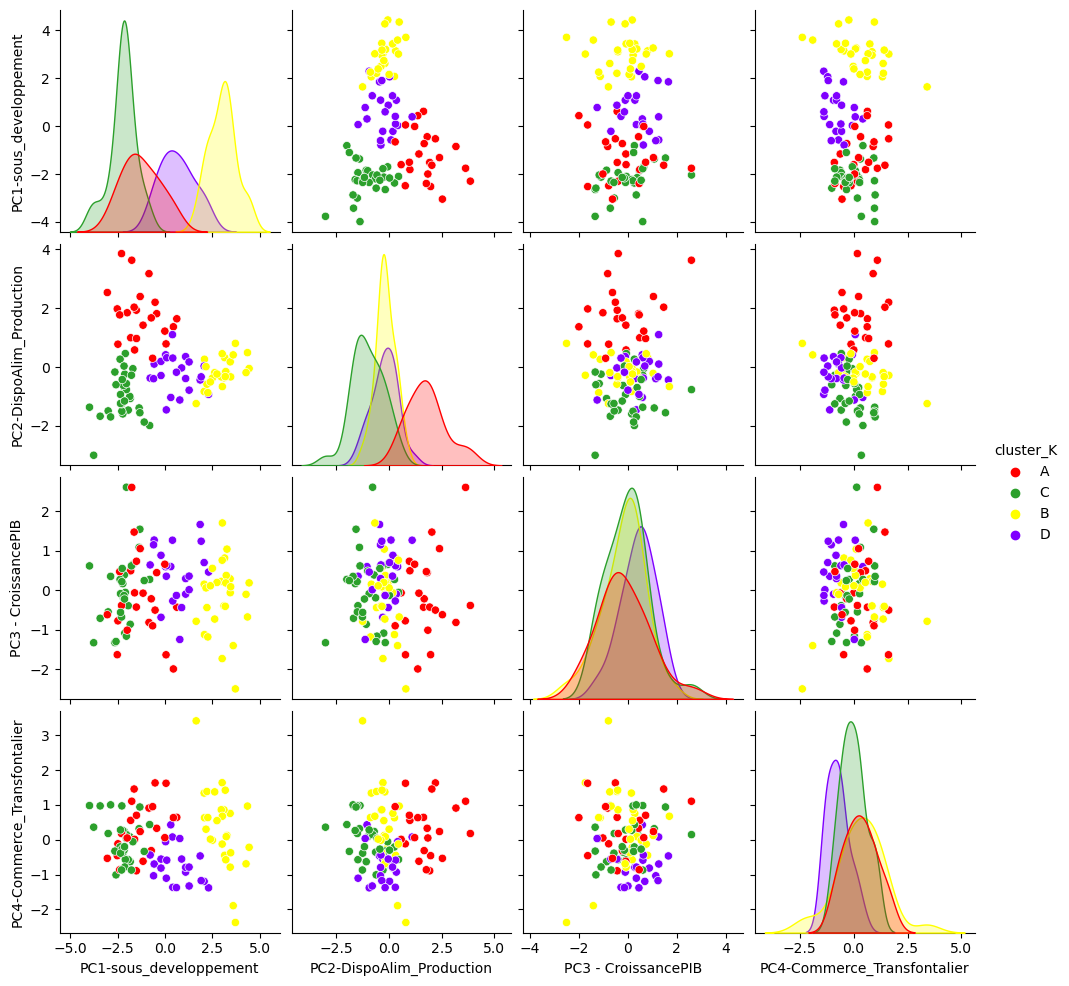

In [341]:
#Pairplot sur les clusters K-means issu de DF_PCA_KMS
palette = sns.color_palette(["#ff0000", "#2ca02c", "#ffff00", "#7F00FF"])
sns.pairplot(df_pca_kms, hue="cluster_K", palette=palette)

#### **A revoir interprétation** Nous constatons que cela se chevauche entre les groupes. Et donc ?

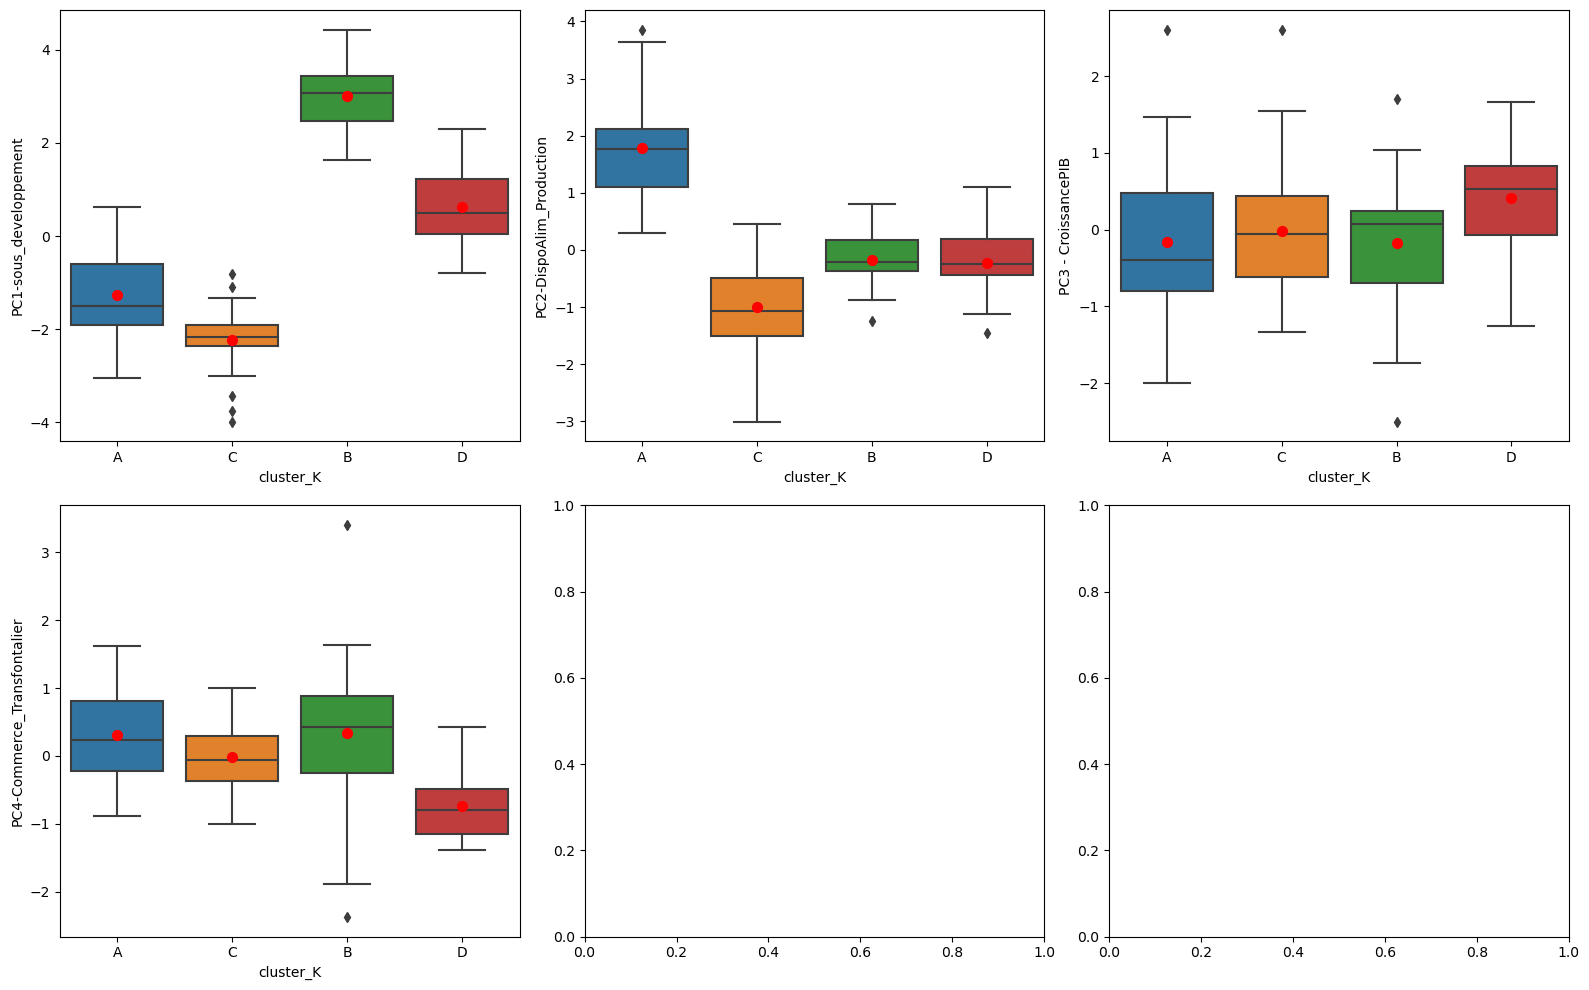

In [342]:
#Analyse des relations entre les variables et les clusters
# Nombre de colonnes à tracer
num_cols = len(df_pca_kms.columns) - 1
# Calculer le nombre de lignes nécessaires pour les sous-graphiques
num_rows = (num_cols + 2) // 3  # 3 colonnes par ligne
# Création des boxplots pour chaque variable en fonction de la catégorie de revenus
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 5 * num_rows))
row = 0
col = 0
for i in range(num_cols):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=df_pca_kms['cluster_K'], y=df_pca_kms[df_pca_kms.columns[i]], ax=axes)
    
    # Ajouter la moyenne au boxplot pour chaque cluster
    for cluster in df_pca_kms['cluster_K'].unique():
        mean_value = cluster_stats.loc[cluster, df_pca_kms.columns[i]]
        axes.scatter([cluster], [mean_value], color='r', s=50, zorder=5)
    
    col += 1

plt.tight_layout()
plt.show()

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.4 - comparaison des clusters issus de CAH et de KMeans du df_pca</h3>
<a id="section_4_4"></a>
</div>

In [344]:
#Remettre l'index pays à DF_pca
# Ajouter une colonne 'Pays' à df_pca en utilisant les index de df_initial
df_pca['Pays'] = df.index.values
# Réindexer df_pca en utilisant la colonne 'Pays'
df_pca.set_index('Pays', inplace=True)
#Isoler le cluster B du kmeans et le cluster 3 de la CAH pour les comparer
# Isoler les pays appartenant au cluster 'B' dans clusters_kmeans
cluster_k = 'C'
pays_cluster_kmeans = df_pca_kms[df_pca_kms['cluster_K'] == cluster_k].index.tolist()

# Isoler les pays appartenant au cluster '3' dans clusters_cah
cluster_cah = 2
pays_cluster_cah = df_pca[df_pca['Cluster'] == cluster_cah].index.tolist()

# Comparer les deux listes de pays
pays_communs = set(pays_cluster_kmeans).intersection(pays_cluster_cah)
pays_uniques_kmeans = set(pays_cluster_kmeans) - pays_communs
pays_uniques_cah = set(pays_cluster_cah) - pays_communs

print(f"Pays dans le cluster {cluster_k} de KMeans : {pays_cluster_kmeans}")

print(f"Pays dans le cluster {cluster_cah} de CAH : {pays_cluster_cah}")

print(f"Pays communs : {pays_communs}")

print(f"Pays uniques à KMeans : {pays_uniques_kmeans}")

print(f"Pays uniques à CAH : {pays_uniques_cah}")

Pays dans le cluster C de KMeans : ['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Chypre', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malte', 'Montenegro', 'Norvège', 'Portugal', 'Slovaquie', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Pays dans le cluster 2 de CAH : ['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bulgarie', 'Canada', 'Chypre', 'Costa Rica', 'Croatie', 'Danemark', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macedoine du Nord', 'Malte', 'Montenegro', 'Norvège', 'Portugal', 'Slovaquie', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Pays communs : {'Norvège', 'Slovaquie', 'Portugal', 'Allemagne', 'Suisse', 'Autriche', 'Japon', 'Finlande', 'Chypre', 'Irlande', 'Tchequie', 'Lettonie', 'Bulgarie', 'Grece', 'Danemark', 'Su

## **Quelle partition choisir ? Garder le Kmeans (Costa Rica = petit pays éloigné et Canada autre continent) et repartitionner**

In [316]:
info_costa=df_quanti.loc['Costa Rica']
info_costa

Disponibilité alimentaire en quantité (kg/personne/an)       32.27
importVolailles_pour100khab                               0.383717
Production_Volailles_100Khab                               2.91625
GDP_per_capita                                               26181
GDP_per_capita_growth%                                     7.28965
Trading_accross_borders                                   77.60393
taux_droits_douane                                            1.43
part_pop_urbaine%                                           82.622
Absence_acces_alimentation_saine (%pop)                       15.9
indice_stabilité_politique                                0.954447
Cluster_cah                                                      2
cluster_K                                                        c
Name: Costa Rica, dtype: object

#### Import dans la médiane mais forte production. Au regard de l'éloignement, je ne le garde pas.

In [318]:
info_canada=df_quanti.loc['Canada']
info_canada

Disponibilité alimentaire en quantité (kg/personne/an)       41.17
importVolailles_pour100khab                               0.513744
Production_Volailles_100Khab                              3.818168
GDP_per_capita                                               62042
GDP_per_capita_growth%                                    4.705382
Trading_accross_borders                                   88.35791
taux_droits_douane                                            2.35
part_pop_urbaine%                                           81.862
Absence_acces_alimentation_saine (%pop)                        2.7
indice_stabilité_politique                                0.772814
Cluster_cah                                                      2
cluster_K                                                        c
Name: Canada, dtype: object

#### Import > à la médiane mais très forte production. Au regard de l'éloignement, je ne le garde pas.

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.4.1 - Projection des individus par clusters</h3>
<a id="sub_section_4_4_1"></a>
</div>

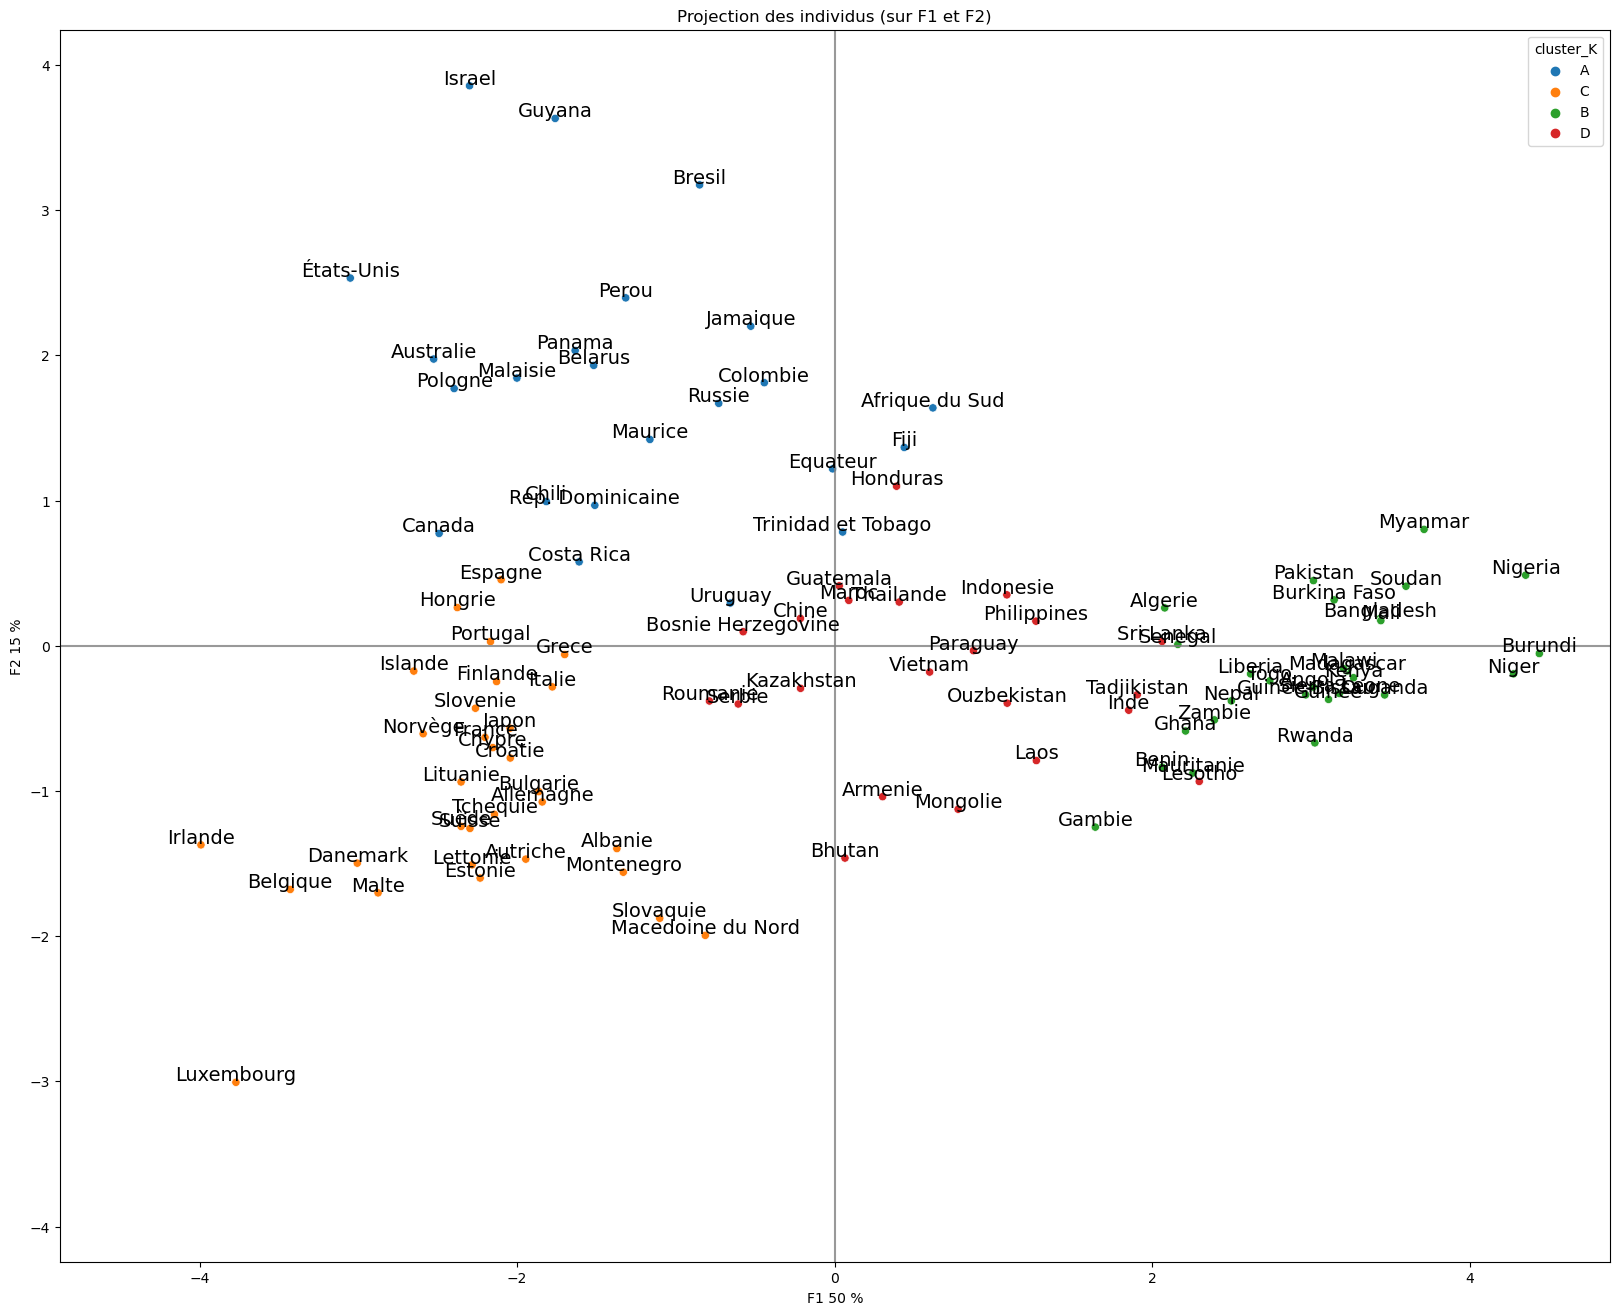

In [345]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_pca_kms['cluster_K'], marker="o")

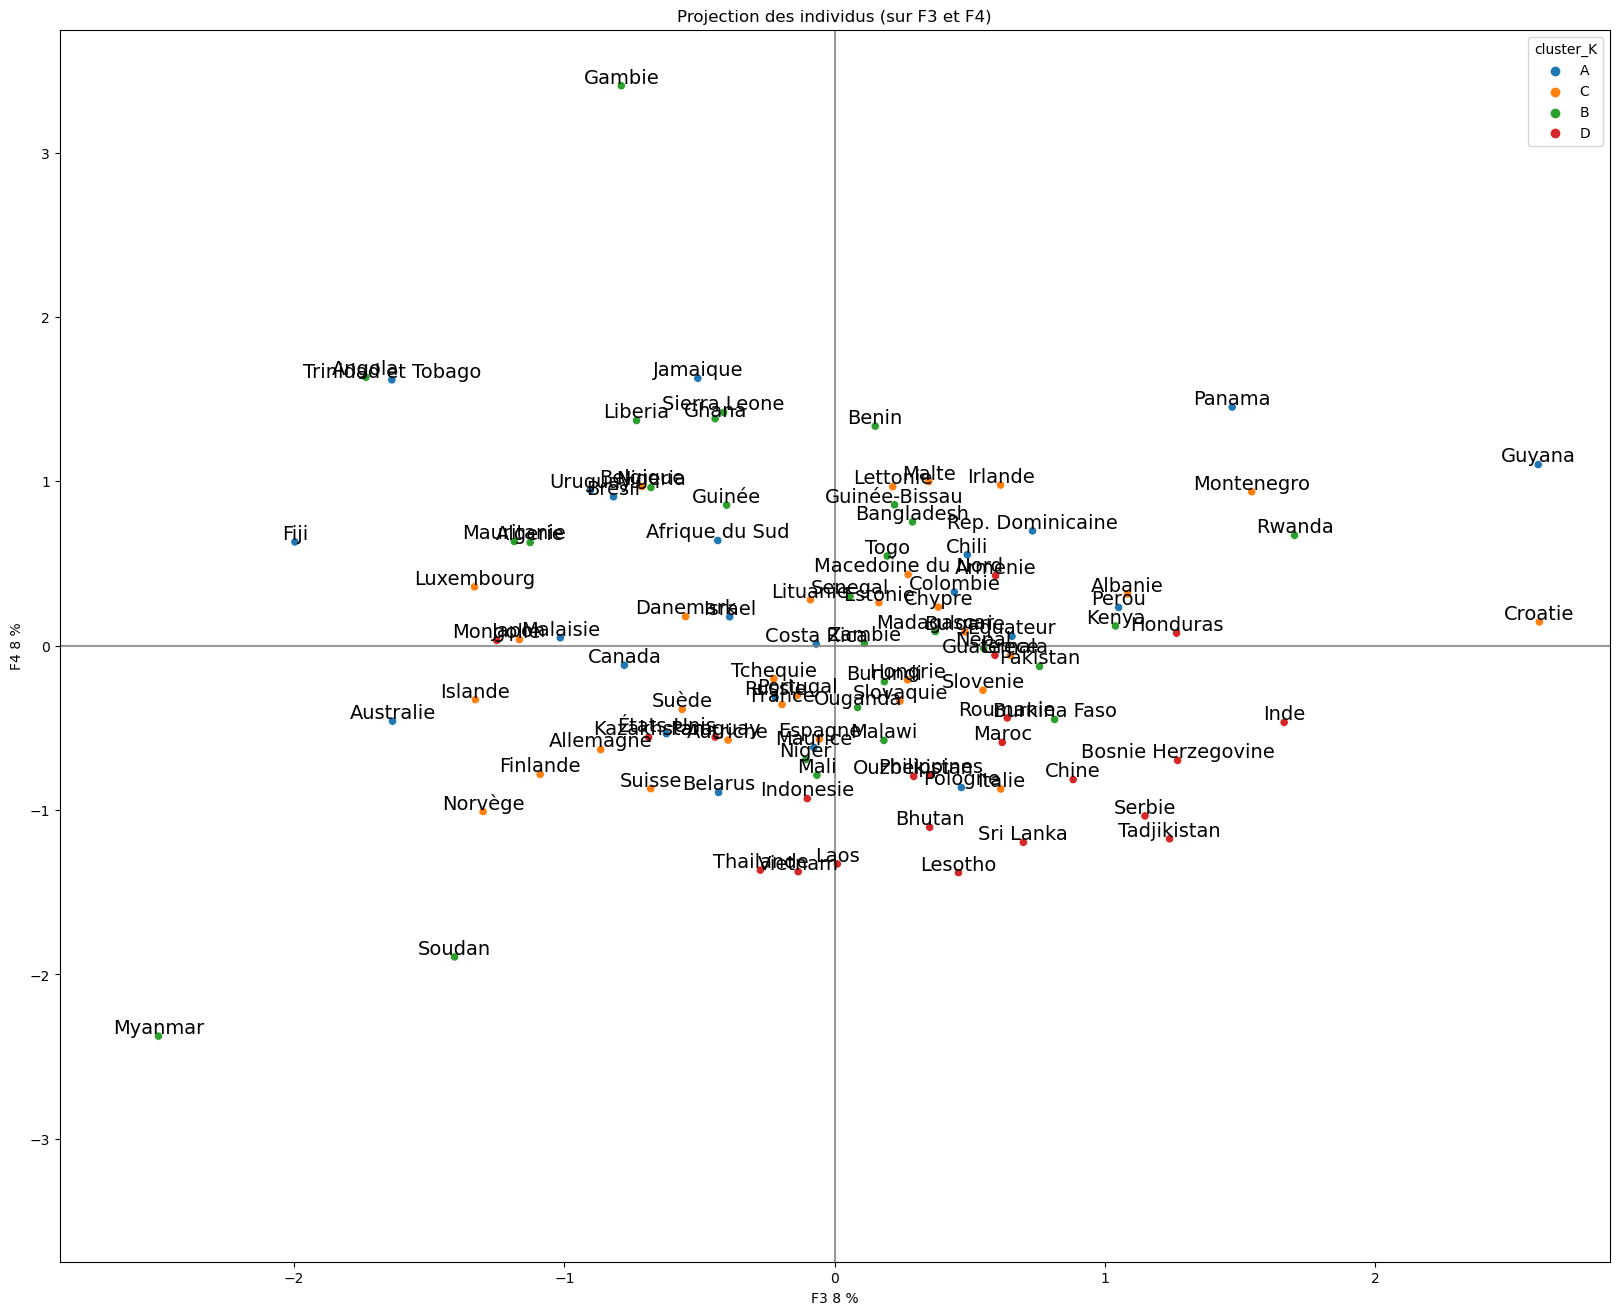

In [346]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df_pca_kms['cluster_K'], marker="o")

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.5 - Nouvelle partition CAH puis Kmeans sur un sous-groupe</h3>
<a id="section_4_5"></a>
</div>

In [459]:
# Isoler les lignes où cluster_K == C
cluster_K = 'C'
df_cluster_K = df_pca_kms[df_pca_kms['cluster_K'] == cluster_K].drop(columns=['cluster_K'])

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.5.1 - CAH sur le sous-groupe</h3>
<a id="sub_section_4_5_1"></a>
</div>

In [406]:
#Construction de la matrice des distances du df_cluster_3
linkage_matrix3 = linkage(df_cluster_K, method='ward', metric='euclidean')
pd.DataFrame(linkage_matrix3)

0     1         2     3
0   29.0  30.0  0.447783   2.0
1    4.0   5.0  0.456567   2.0
2    8.0  25.0  0.513699   2.0
3    2.0  31.0  0.566564   3.0
4   13.0  33.0  0.571955   3.0
5    1.0  28.0  0.575502   2.0
6   18.0  22.0  0.637543   2.0
7   10.0  24.0  0.662615   2.0
8   12.0  27.0  0.712694   2.0
9    9.0  19.0  0.718892   2.0
10   0.0  23.0  0.790940   2.0
11  15.0  38.0  0.806904   3.0
12  21.0  26.0  0.830243   2.0
13  34.0  36.0  0.843996   5.0
14  16.0  39.0  0.850350   3.0
15  32.0  40.0  0.919745   4.0
16   3.0   7.0  0.929198   2.0
17  11.0  44.0  0.943813   6.0
18  17.0  42.0  1.081969   4.0
19  35.0  45.0  1.434142   6.0
20  37.0  47.0  1.680079   4.0
21  14.0  51.0  1.746684   5.0
22  41.0  43.0  1.904790   4.0
23  46.0  48.0  2.239871  10.0
24  20.0  52.0  2.734213   6.0
25   6.0  53.0  2.833400   5.0
26  49.0  54.0  3.107373  14.0
27  50.0  57.0  3.531971  20.0
28  56.0  58.0  5.522606  25.0
29  55.0  59.0  5.771171  31.0

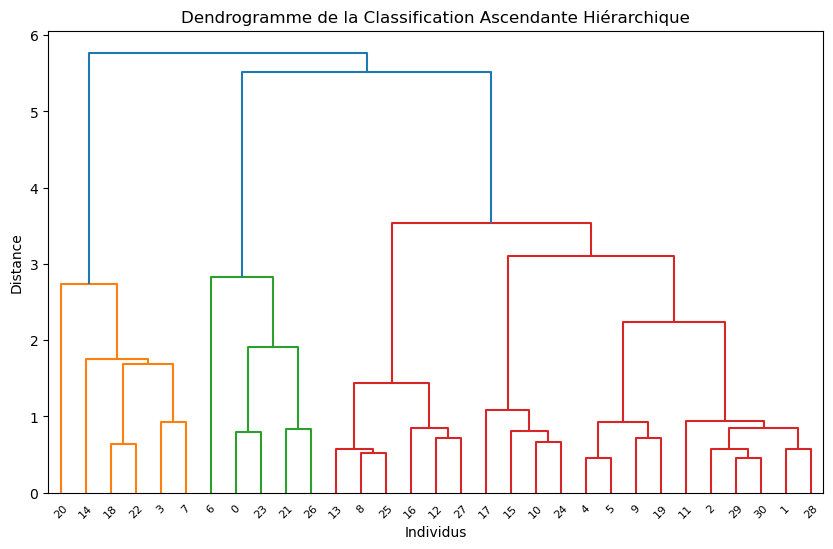

In [407]:
# Affichage du dendrogramme
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix3)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

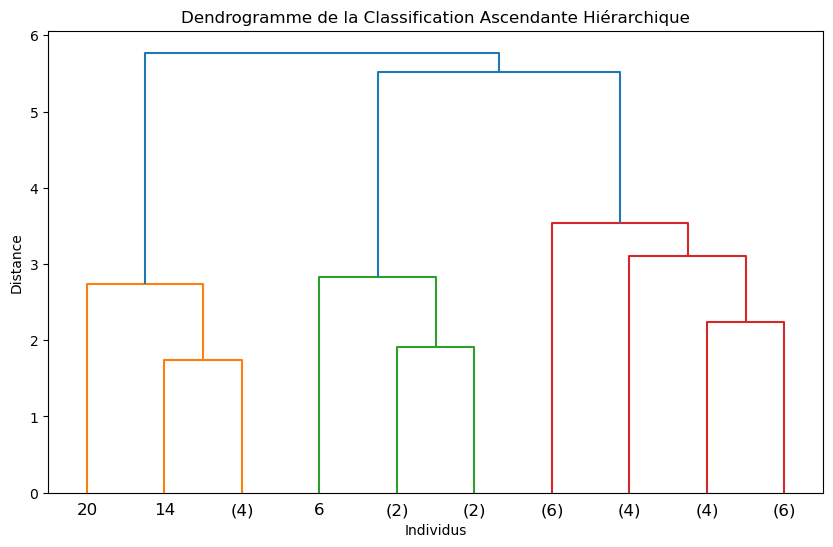

In [408]:
# Affichage du dendrogramme réduit
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix3,p=10, truncate_mode="lastp")
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

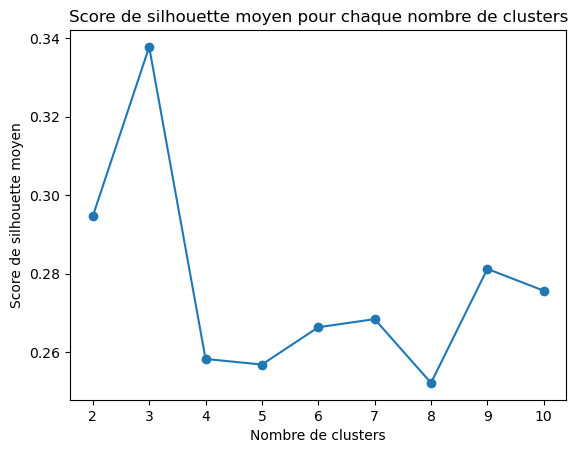

Nombre optimal de clusters : 3


In [409]:
# Effectuer la CAH avec df_cluster_3
max_clusters = 10  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage_matrix3, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_cluster_K, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

In [410]:
# Demander à l'utilisateur de choisir le nombre de clusters
num_clusters = 3

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix3, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame
df_cluster_K['sous_groupes'] = clusters

# Afficher les statistiques des clusters
cluster_stats = df_cluster_K.groupby('sous_groupes').mean()
cluster_stats

PC1-sous_developpement  PC2-DispoAlim_Production  \
sous_groupes                                                     
1                          -3.226432                 -1.794182   
2                          -1.333016                 -1.520354   
3                          -2.159773                 -0.635475   

              PC3 - CroissancePIB  PC4-Commerce_Transfontalier  
sous_groupes                                                    
1                       -0.237099                     0.741419  
2                        1.148934                     0.298674  
3                       -0.249429                    -0.326179

Sous groupes CAH issus de la CAH sur cluster_K == B : difficile de caractériser

+ **Cluster 1** :
- Pays les plus développés
- Les moins producteurs et dispo
- Moindre croissance PIB
- droits de douane et import > moyenne

+ **Cluster 2** :
- Pays les moins riches
- Moindre dispo et production 
- Croissance imp richesse
- droits de douane et import > moy

+ **Cluster 3**:
- Moins intermédiaire en développement
- moindre dispo et production mais le mieux des 3 groupes
- croissance économique < moyenne 
- Moindre droits de douane et import

In [411]:
# obtenir les pays pour chaque sous groupes
sous_groupes = df_cluster_K.groupby('sous_groupes').apply(lambda x: x.index.tolist())

# Afficher les pays pour chaque cluster
for cluster, countries in sous_groupes.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 1: ['Belgique', 'Danemark', 'Irlande', 'Lettonie', 'Luxembourg', 'Malte']
Cluster 2: ['Albanie', 'Croatie', 'Macedoine du Nord', 'Montenegro', 'Slovaquie']
Cluster 3: ['Allemagne', 'Autriche', 'Bulgarie', 'Chypre', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Islande', 'Italie', 'Japon', 'Lituanie', 'Norvège', 'Portugal', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']


C:\Users\candi\AppData\Local\Temp\ipykernel_3144\2638762749.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [412]:
#Taille des clusters
cluster_taille = df_cluster_K.groupby('sous_groupes').size()
cluster_taille

sous_groupes
1     6
2     5
3    20
dtype: int64

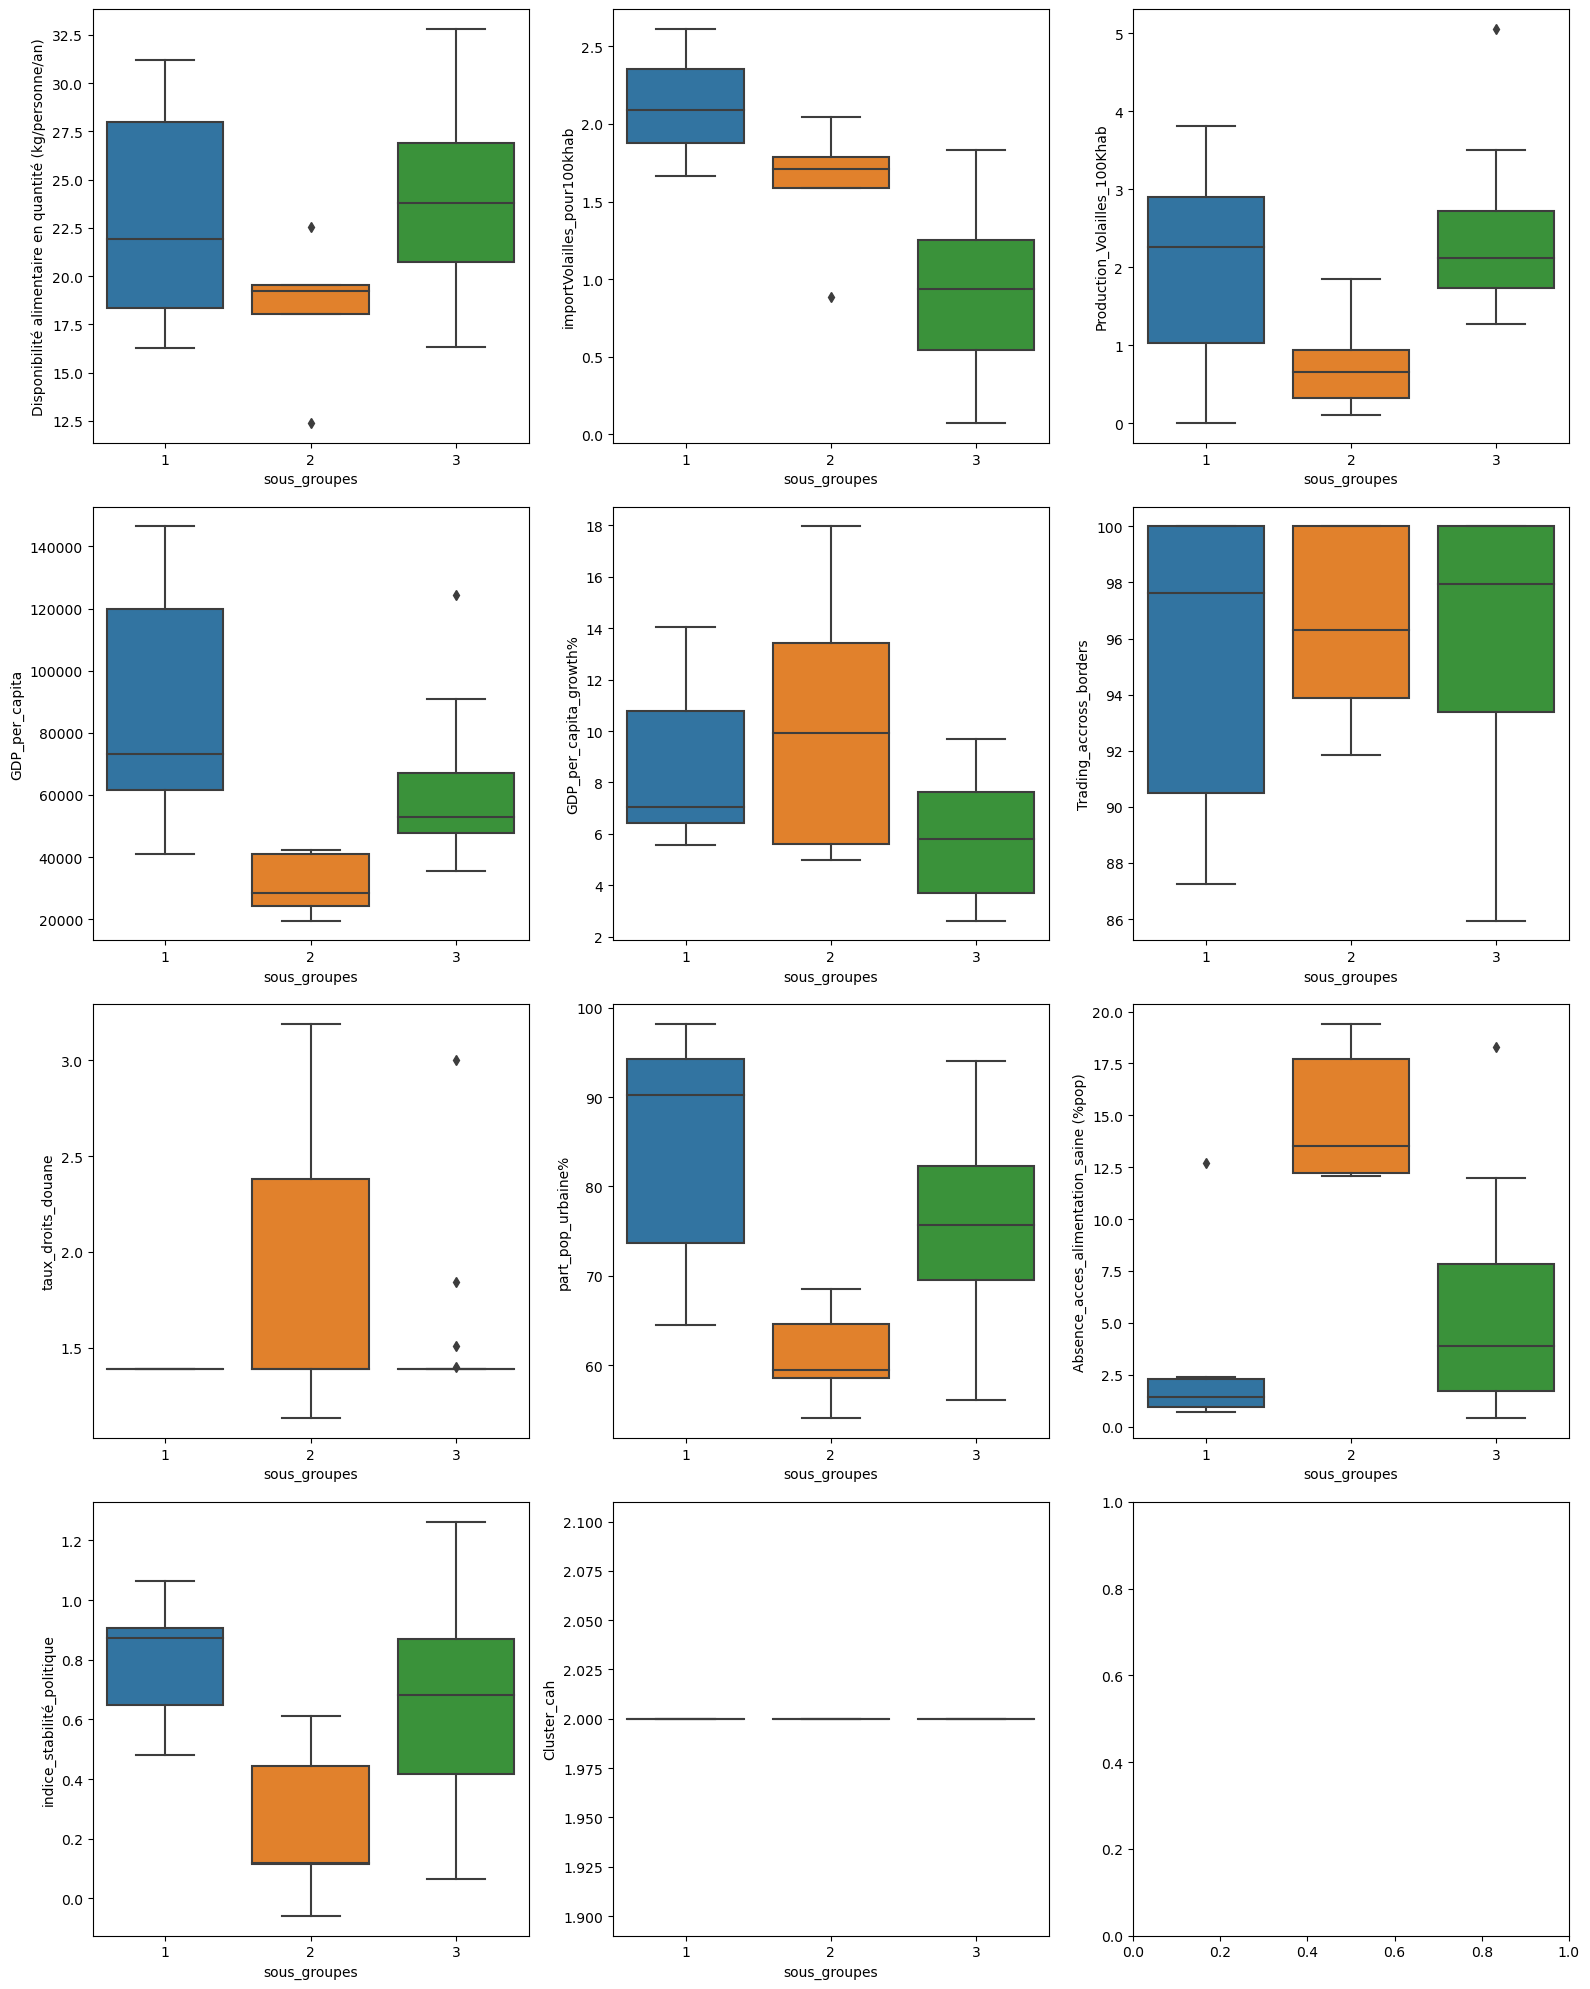

In [413]:
#Analyse des relations entre les variables des données brutes et les clusters CAH du sous groupe
# Nombre de colonnes à tracer
num_cols = len(df_quanti.columns) - 1
#Calculer le nombre de lignes nécessaires pour les sous-graphiques
num_rows = (num_cols+2) // 3 # 3 colonnes par ligne
# Création des boxplots pour chaque variable en fonction de la catégorie de revenus
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 5 * num_rows))
row = 0
col = 0
for i in range(num_cols):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=df_cluster_K['sous_groupes'], y=df_quanti[df_quanti.columns[i]], ax=axes)
    col += 1
plt.tight_layout()
plt.show()

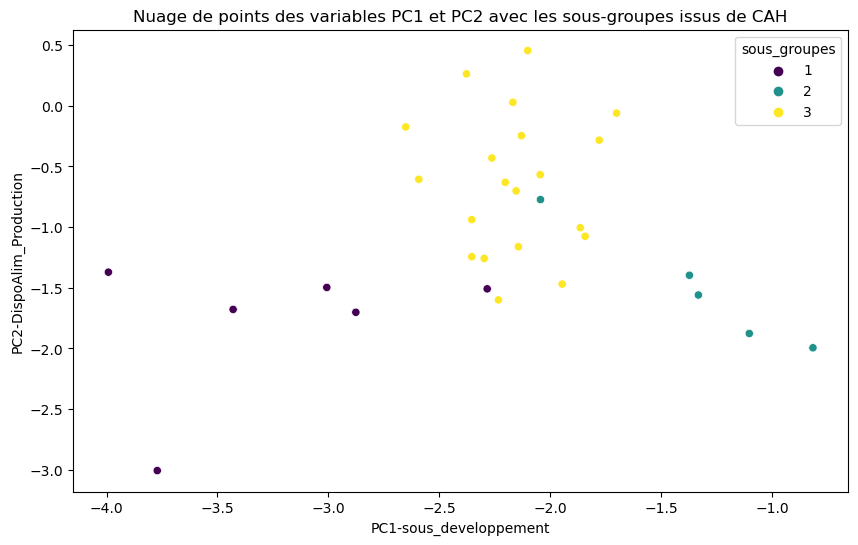

In [419]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points avec Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_cluster_K, x='PC1-sous_developpement', y='PC2-DispoAlim_Production', hue='sous_groupes', palette='viridis')

# Ajouter une légende avec des points de couleur pour chaque sous-groupe
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[0:], labels=labels[0:], title='sous_groupes', loc='upper right')

plt.xlabel('PC1-sous_developpement')
plt.ylabel('PC2-DispoAlim_Production')
plt.title('Nuage de points des variables PC1 et PC2 avec les sous-groupes issus de CAH')
plt.show()

### Analyse à la lecture des boxplot

Nous sommes dans un groupe de pays dit développés, riches dont la disponibilité alimentaire est supérieure à la moyenne
+ Privilégier les pays les plus dépendants à l'importation et avec une production moindre : 2
+ Taux de droits de douane les plus bas : 1 et 3
+ croissance du pib par hab les plus fortes : 2
+ Score de commerce transfontalier (1 et 3)
+ Part de la population urbaine plus important 1
+ Richesse (gdp per capita) plus importante : 2

Difficile de trancher

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">4.5.2 - K-means sur le sous groupe</h3>
<a id="sub_section_4_5_2"></a>
</div>

In [423]:
# Enlever la colonne 'sous_groupes'
df_sousgroupe = df_cluster_K.drop(columns=['sous_groupes'])

In [424]:
print(df_sousgroupe.columns)

Index(['PC1-sous_developpement', 'PC2-DispoAlim_Production',
       'PC3 - CroissancePIB', 'PC4-Commerce_Transfontalier'],
      dtype='object')


In [425]:
from sklearn.cluster import KMeans

In [426]:
inertias=[]
silhouettes =[]
K = range(2,10)
for k in K:
    kmeanModel= KMeans(n_clusters=k, random_state = 42)
    kmeanModel.fit(df_sousgroupe)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(df_sousgroupe, kmeanModel.labels_))

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\c

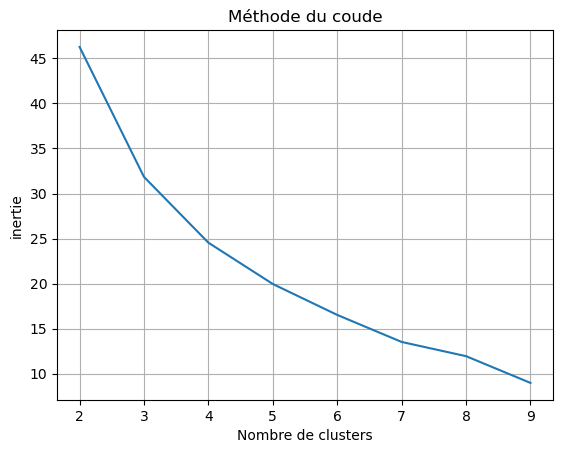

In [427]:
#Tracer courbe de l'inertie en fonction du nb de clusters
plt.plot(range(2,10),inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

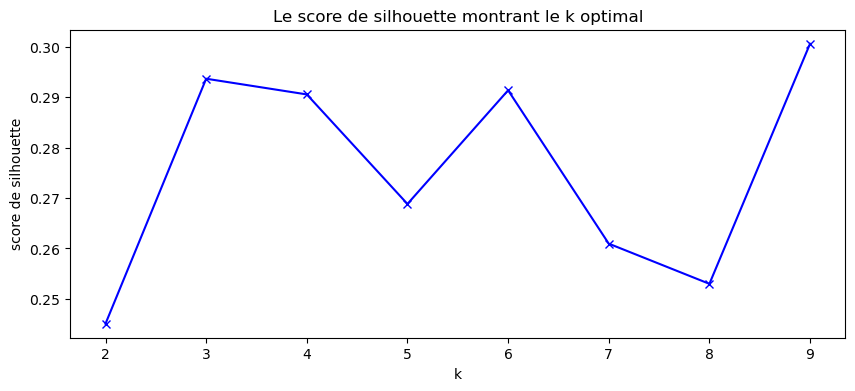

In [428]:
#Graphique du score de silhouette
plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [429]:
#Appliquer le kmeans avec le nb de clusters optimal trouvé
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_sousgroupe)

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\candi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=3, random_state=42)

In [430]:
#Ajouter les cluster au df en colonne
df_sousgroupe['Label_k'] = kmeans.labels_
#Taille des clusters
cluster_taille = df_sousgroupe.groupby('Label_k').size()
cluster_taille

Label_k
0    17
1     9
2     5
dtype: int64

In [431]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.17321613, -0.55311886, -0.35394654, -0.41791811],
       [-1.68885891, -1.37968904,  0.77642943,  0.33807764],
       [-3.41494549, -1.85122744, -0.3274566 ,  0.69604432]])

In [432]:
# Afficher les statistiques des clusters
cluster_stats = df_sousgroupe.groupby('Label_k').mean()
cluster_stats

PC1-sous_developpement  PC2-DispoAlim_Production  \
Label_k                                                     
0                     -2.173216                 -0.553119   
1                     -1.688859                 -1.379689   
2                     -3.414945                 -1.851227   

         PC3 - CroissancePIB  PC4-Commerce_Transfontalier  
Label_k                                                    
0                  -0.353947                    -0.417918  
1                   0.776429                     0.338078  
2                  -0.327457                     0.696044

In [373]:
# obtenir les pays pour chaque sous groupes
sous_groupes = df_sousgroupe.groupby('Label_k').apply(lambda x: x.index.tolist())
# Afficher les pays pour chaque cluster
for cluster, countries in sous_groupes.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 0: ['Allemagne', 'Autriche', 'Espagne', 'Finlande', 'France', 'Grece', 'Hongrie', 'Islande', 'Italie', 'Japon', 'Lituanie', 'Norvège', 'Portugal', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Cluster 1: ['Albanie', 'Bulgarie', 'Chypre', 'Croatie', 'Estonie', 'Lettonie', 'Macedoine du Nord', 'Montenegro', 'Slovaquie']
Cluster 2: ['Belgique', 'Danemark', 'Irlande', 'Luxembourg', 'Malte']


C:\Users\candi\AppData\Local\Temp\ipykernel_3144\4218602113.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [374]:
import plotly.express as px
# Sélection des colonnes pour le pairplot
dimensions = [col for col in df_sousgroupe.columns if col.startswith('PC')]
# Création du pairplot interactif
fig = px.scatter_matrix(df_sousgroupe, dimensions=dimensions, color='Label_k', hover_name=df_sousgroupe.index)
fig.show()

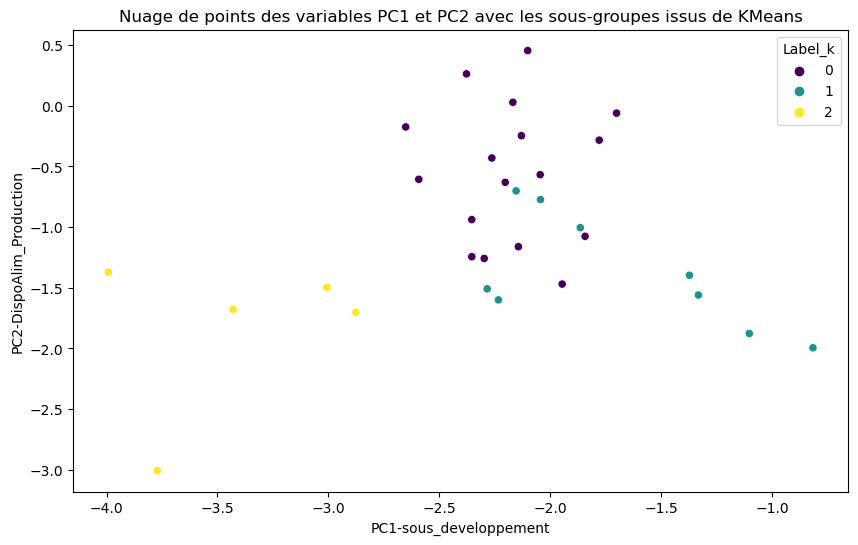

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points avec Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df_sous_groupe, x='PC1-sous_developpement', y='PC2-DispoAlim_Production', hue='Label_k', palette='viridis')

# Ajouter une légende avec des points de couleur pour chaque sous-groupe
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title='sous_groupes', loc='upper right')

# Ajouter les centroïdes au graphique
for cluster in cluster_stats['sous_groupes'].unique():
    centroid_x = cluster_stats.loc[cluster_stats['sous_groupes'] == cluster, 'PC1-sous_developpement'].values[0]
    centroid_y = cluster_stats.loc[cluster_stats['sous_groupes'] == cluster, 'PC2-DispoAlim_Production'].values[0]
    plt.scatter(centroid_x, centroid_y, color='black', marker='x', s=100, label=f'Centroid {cluster}')

plt.xlabel('PC1-sous_developpement')
plt.ylabel('PC2-DispoAlim_Production')
plt.title('Nuage de points des variables PC1 et PC2 avec Centroïdes')
plt.show()


- Nous constatons que les groupes sont similaires à la CAH et que les points se chevauchent. 
- Revenons aux données brutes pour choisir nos pays.

In [435]:
#Remettre l'index pays à df_sousgroupe
# Ajouter une colonne 'Pays' à df_pca en utilisant les index de df__cluster_K
df_sousgroupe['Pays'] = df_cluster_K.index.values
# Réindexer df_pca en utilisant la colonne 'Pays'
df_sousgroupe.set_index('Pays', inplace=True)
#Isoler le cluster 0 du kmeans et le cluster 3 de la CAH pour les comparer
# Isoler les pays appartenant au cluster '0' dans clusters_kmeans
Label_k = 0
pays_cluster_kmeans = df_sousgroupe[df_sousgroupe['Label_k'] == Label_k].index.tolist()

# Isoler les pays appartenant au cluster '3' dans clusters_cah
cluster_cah = 3
pays_cluster_cah = df_cluster_K[df_cluster_K['sous_groupes'] == cluster_cah].index.tolist()

# Comparer les deux listes de pays
pays_communs = set(pays_cluster_kmeans).intersection(pays_cluster_cah)
pays_uniques_kmeans = set(pays_cluster_kmeans) - pays_communs
pays_uniques_cah = set(pays_cluster_cah) - pays_communs

print(f"Pays dans le cluster {Label_k} de KMeans : {pays_cluster_kmeans}")

print(f"Pays dans le cluster {cluster_cah} de CAH : {pays_cluster_cah}")

print(f"Pays communs : {pays_communs}")

print(f"Pays uniques à KMeans : {pays_uniques_kmeans}")

print(f"Pays uniques à CAH : {pays_uniques_cah}")

Pays dans le cluster 0 de KMeans : ['Allemagne', 'Autriche', 'Espagne', 'Finlande', 'France', 'Grece', 'Hongrie', 'Islande', 'Italie', 'Japon', 'Lituanie', 'Norvège', 'Portugal', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Pays dans le cluster 3 de CAH : ['Allemagne', 'Autriche', 'Bulgarie', 'Chypre', 'Espagne', 'Estonie', 'Finlande', 'France', 'Grece', 'Hongrie', 'Islande', 'Italie', 'Japon', 'Lituanie', 'Norvège', 'Portugal', 'Slovenie', 'Suisse', 'Suède', 'Tchequie']
Pays communs : {'Norvège', 'Lituanie', 'France', 'Espagne', 'Italie', 'Islande', 'Portugal', 'Tchequie', 'Allemagne', 'Suisse', 'Autriche', 'Japon', 'Suède', 'Slovenie', 'Grece', 'Hongrie', 'Finlande'}
Pays uniques à KMeans : set()
Pays uniques à CAH : {'Bulgarie', 'Chypre', 'Estonie'}


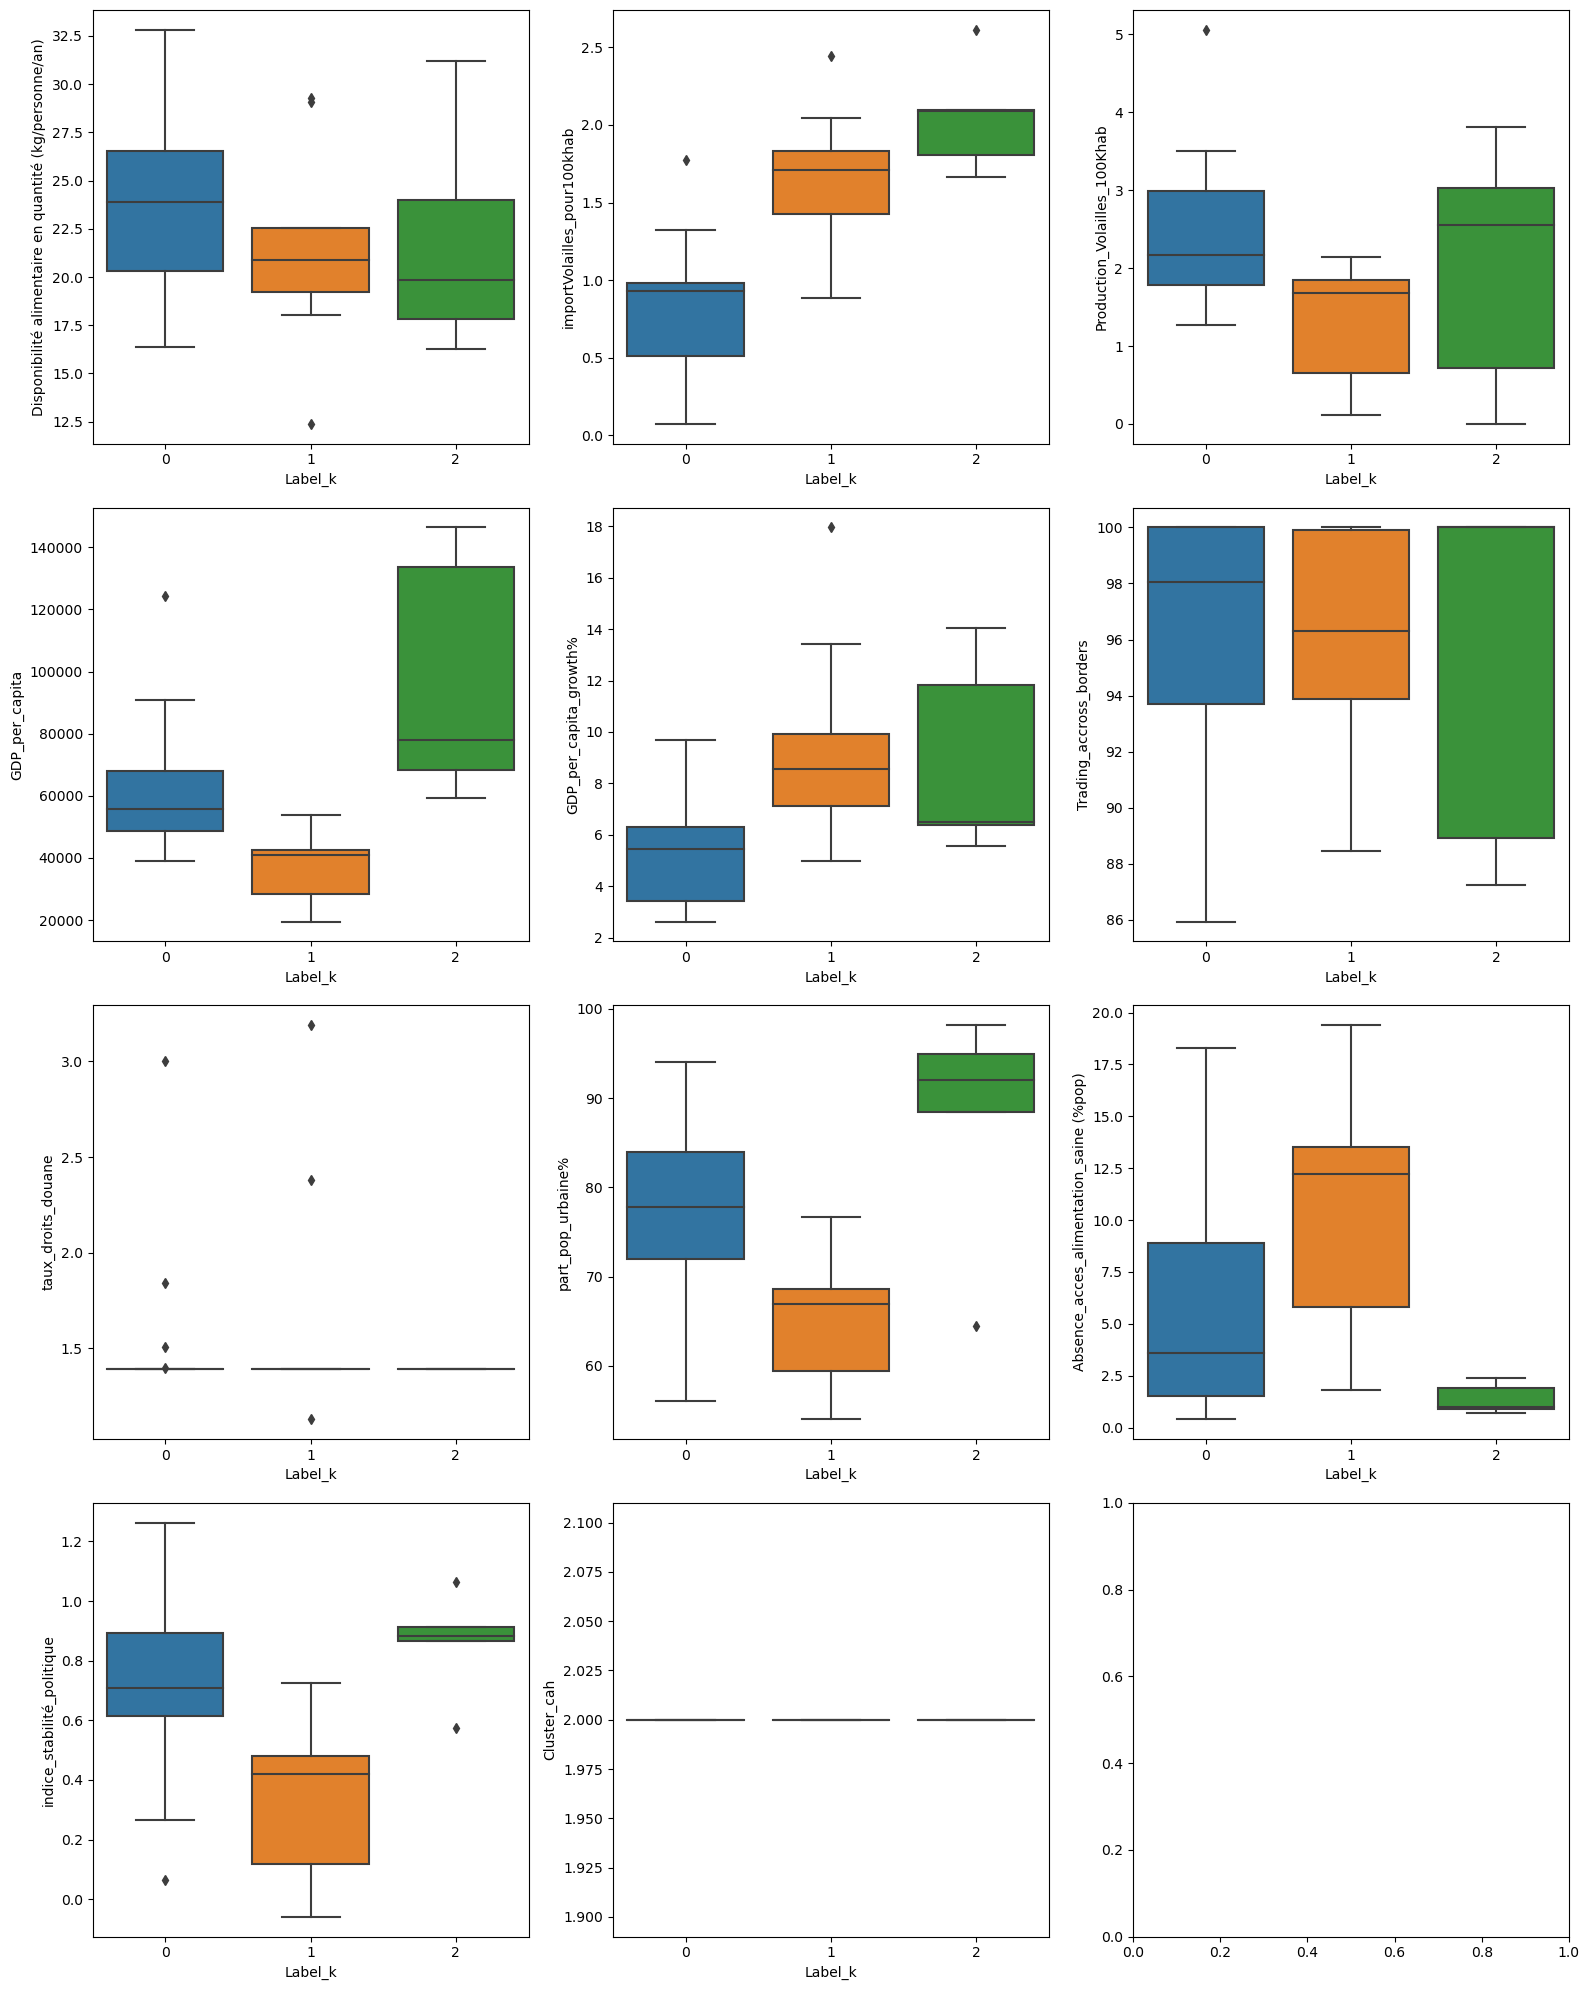

In [436]:
#Analyse des relations entre les variables dez données brutes et les clusters
# Nombre de colonnes à tracer
num_cols = len(df_quanti.columns) - 1
#Calculer le nombre de lignes nécessaires pour les sous-graphiques
num_rows = (num_cols+2) // 3 # 3 colonnes par ligne
# Création des boxplots pour chaque variable en fonction de la catégorie de revenus
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 5 * num_rows))
row = 0
col = 0
for i in range(num_cols):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=df_sousgroupe['Label_k'], y=df_quanti[df_quanti.columns[i]], ax=axes)
    col += 1
plt.tight_layout()
plt.show()

#### Je décide de retenir le groupe 3 de la CAH (meilleur score silhouette que KMeans et davantage de pays)

<div style="background-color: RGB(0,0,139);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Choix des pays pour exporter</h2><a class="anchor" id="Etape_5"></a>
</div>

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">5.1 - Retour aux données brutes</h3>
<a id="sub_section_4_2_3"></a>
</div>

In [437]:
# Filtrer les pays dans  sous_groupes est 1 et 4
tri_pays = df_cluster_K[df_cluster_K['sous_groupes'].isin([3])]

# Utiliser ces pays pour filtrer df_full et ajouter la colonne sous_groupes
df_tri_pays = df_full[df_full.index.isin(tri_pays.index)]
df_tri_pays = df_tri_pays.join(tri_pays['sous_groupes'], how='left')

# Trier le DataFrame par la colonne 'sous_groupes' en ordre décroissant
df_tri_pays = df_tri_pays.sort_values(by='sous_groupes', ascending=False)
df_tri_pays = df_tri_pays.drop(index=['Japon', 'France'])
df_tri_pays

Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                        
Allemagne                                           60.85   
Autriche                                            71.88   
Suède                                               63.80   
Suisse                                              68.06   
Slovenie                                            96.12   
Portugal                                           123.48   
Norvège                                             80.95   
Lituanie                                           100.02   
Italie                                              74.87   
Islande                                            116.64   
Hongrie                                             94.18   
Grece                                               98.55   
Finlande                                            90.52   
Estonie                                             94.65   
Espagne                                            119.16   
Chypre                                             112.02   
Bulgarie                                            80.24   
Tchequie                                            91.77   

           Disponibilité alimentaire en quantité (kg/personne/an)  Population  \
Pays                                                                            
Allemagne                                              16.51         84482267   
Autriche                                               19.14          9132383   
Suède                                                  16.35         10536632   
Suisse                                                 18.01          8849852   
Slovenie                                               25.91          2120937   
Portugal                                               32.82         10525347   
Norvège                                                21.51          5519594   
Lituanie                                               26.55          2871897   
Italie                                                 20.31         58761146   
Islande                                                30.74           393600   
Hongrie                                                23.69          9589872   
Grece                                                  26.23         10361295   
Finlande                                               23.67          5584264   
Estonie                                                21.26          1366188   
Espagne                                                32.10         48373336   
Chypre                                                 29.09          1260138   
Bulgarie                                               20.87          6430370   
Tchequie                                               23.87         10873689   

           importVolailles_pour100khab  Part_volailles_importée  \
Pays                                                              
Allemagne                     0.933924                57.340116   
Autriche                      1.324955                70.760234   
Suède                         0.930088                56.976744   
Suisse                        0.553682                31.210191   
Slovenie                      1.178724                45.454545   
Portugal                      0.893082                27.893175   
Norvège                       0.072469                 3.418803   
Lituanie                      1.775830                69.863014   
Italie                        0.241656                11.843203   
Islande                       0.508130                18.181818   
Hongrie                       0.969773                39.406780   
Grece                         0.791407                30.147059   
Finlande                      0.429779                18.320611   
Estonie                       1.829909                89.285714   
Espagne                       0.438258                13.883432   
Chypre                        

Retirons la France dont la présence valide la pertinence des groupes (lookalike). De plus, nous sommes sur le continent européen ce qui valide une moindre empreinte transport. Décision de retirer le Japon trop éloigné (empreinte carbone incompatible avec le positionnement de notre produit).

In [438]:
#Tri par taille de population 
# Trier le DataFrame par la colonne 'sous_groupes' en ordre décroissant
df_tri_pop = df_tri_pays.sort_values(by='Population', ascending=False)
df_tri_pop


Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                        
Allemagne                                           60.85   
Italie                                              74.87   
Espagne                                            119.16   
Tchequie                                            91.77   
Suède                                               63.80   
Portugal                                           123.48   
Grece                                               98.55   
Hongrie                                             94.18   
Autriche                                            71.88   
Suisse                                              68.06   
Bulgarie                                            80.24   
Finlande                                            90.52   
Norvège                                             80.95   
Lituanie                                           100.02   
Slovenie                                            96.12   
Estonie                                             94.65   
Chypre                                             112.02   
Islande                                            116.64   

           Disponibilité alimentaire en quantité (kg/personne/an)  Population  \
Pays                                                                            
Allemagne                                              16.51         84482267   
Italie                                                 20.31         58761146   
Espagne                                                32.10         48373336   
Tchequie                                               23.87         10873689   
Suède                                                  16.35         10536632   
Portugal                                               32.82         10525347   
Grece                                                  26.23         10361295   
Hongrie                                                23.69          9589872   
Autriche                                               19.14          9132383   
Suisse                                                 18.01          8849852   
Bulgarie                                               20.87          6430370   
Finlande                                               23.67          5584264   
Norvège                                                21.51          5519594   
Lituanie                                               26.55          2871897   
Slovenie                                               25.91          2120937   
Estonie                                                21.26          1366188   
Chypre                                                 29.09          1260138   
Islande                                                30.74           393600   

           importVolailles_pour100khab  Part_volailles_importée  \
Pays                                                              
Allemagne                     0.933924                57.340116   
Italie                        0.241656                11.843203   
Espagne                       0.438258                13.883432   
Tchequie                      1.232332                53.386454   
Suède                         0.930088                56.976744   
Portugal                      0.893082                27.893175   
Grece                         0.791407                30.147059   
Hongrie                       0.969773                39.406780   
Autriche                      1.324955                70.760234   
Suisse                        0.553682                31.210191   
Bulgarie                      1.399608                63.380282   
Finlande                      0.429779                18.320611   
Norvège                       0.072469                 3.418803   
Lituanie                      1.775830                69.863014   
Slovenie                      1.178724                45.454545   
Estonie                       

In [439]:
df_tri_pop.describe()

Disponibilité alimentaire (Kcal/personne/jour)  \
count                                       18.000000   
mean                                        90.986667   
std                                         19.025766   
min                                         60.850000   
25%                                         76.212500   
50%                                         92.975000   
75%                                         99.652500   
max                                        123.480000   

       Disponibilité alimentaire en quantité (kg/personne/an)    Population  \
count                                          18.000000       1.800000e+01   
mean                                           23.812778       1.594627e+07   
std                                             5.091490       2.322960e+07   
min                                            16.350000       3.936000e+05   
25%                                            20.450000       3.533821e+06   
50%                                            23.680000       8.991118e+06   
75%                                            26.470000       1.053381e+07   
max                                            32.820000       8.448227e+07   

       importVolailles_pour100khab  Part_volailles_importée  \
count                    18.000000                18.000000   
mean                      0.940668                41.708454   
std                       0.505522                23.935419   
min                       0.072469                 3.418803   
25%                       0.519518                20.713752   
50%                       0.932006                42.430663   
75%                       1.301800                57.249273   
max                       1.829909                89.285714   

       Production_Volailles_100Khab  GDP_per_capita  GDP_per_capita_growth%  \
count                     18.000000       18.000000               18.000000   
mean                       2.418830    59971.611111                5.993666   
std                        0.949891    21148.188244                2.245809   
min                        1.265558    35464.000000                2.625229   
25%                        1.701959    48127.750000                3.985588   
50%                        2.113055    52739.000000                5.785098   
75%                        2.904002    67720.000000                7.829713   
max                        5.057419   124253.000000                9.706770   

       Taux_croissancePIB  score_facilite_business  Trading_accross_borders  \
count           18.000000                18.000000                18.000000   
mean             3.753714                77.130262                96.628613   
std              2.203825                 3.904754                 4.269864   
min             -0.461003                68.423910                86.709220   
25%              2.445327                74.147015                94.301675   
50%              3.466034                77.277260                97.935180   
75%              4.995204                80.061265               100.000000   
max              8.881308                82.627290               100.000000   

       taux_droits_douane  Score_performance_logistique  Croissance_pop (%)  \
count           18.000000                     18.000000           18.000000   
mean             1.486667                      3.578333            0.763598   
std              0.378729                      0.377114            0.914075   
min              1.390000                      3.020000           -0.631360   
25%              1.390000                      3.250000            0.435372   
50%              1.390000                      3.660000            0.827003   
75%              1.390000                      3.882500            1.212773   
max              3.000000                      4.200000            2.990670   

       part_pop_urbaine%  Esperance_vie_naissance (années)  \
count          

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">5.2 - Apport d'information sur le marché du bio</h3>
<a id="sub_section_2_2"></a>
</div>

In [15]:
# Importation du dataframe
df_bio=pd.read_csv("consobio2022.csv",index_col=0, sep=';')
df_bio.head(50)

Organic per capita consumption [€/person]
Country                                                           
Australia                                                     51,5
Austria                                                     274,14
Belgium                                                       84,3
Bhutan                                                        0,04
Bosnia and Herzegovina                                        0,11
Brazil                                                        3,74
Bulgaria                                                      5,85
Canada                                                      146,58
China                                                          8,5
Croatia                                                      24,18
Czech Republic                                                22,1
Denmark                                                     365,33
Estonia                                                         72
Ethiopia                                                       0,1
Finland                                                      72,97
France                                                         176
Germany                                                        181
Greece                                                        6,18
Hungary                                                       3,04
India                                                          0,2
Ireland                                                      33,25
Italy                                                        62,19
Japan                                                         13,1
Kenya                                                         0,06
Latvia                                                        6,32
Lithuania                                                     17,8
Luxembourg                                                     259
Mongolia                                                      0,17
Netherlands                                                  80,58
New Zealand                                                  33,62
Norway                                                       84,59
Poland                                                        8,23
Portugal                                                         2
Republic of Korea                                             10,7
Romania                                                       2,06
Russian Federation                                             1,3
Saudi Arabia                                                  10,1
Singapore                                                     2,73
Slovenia                                                      26,6
Spain                                                        54,75
Sweden                                                      247,81
Switzerland                                                 436,95
Turkey                                                         0,6
Ukraine                                                       0,32
United Kingdom                                               50,56
United States of America                                    175,72

In [16]:
# Remplacer les virgules par des points
df_bio['Organic per capita consumption [€/person]'] = df_bio['Organic per capita consumption [€/person]'].str.replace(',', '.')
df_bio.head()

Organic per capita consumption [€/person]
Country                                                         
Australia                                                   51.5
Austria                                                   274.14
Belgium                                                     84.3
Bhutan                                                      0.04
Bosnia and Herzegovina                                      0.11

In [17]:
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Australia to United States of America
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Organic per capita consumption [€/person]  46 non-null     object
dtypes: object(1)
memory usage: 736.0+ bytes


In [18]:
#Afficher les dimensions du dataset
print("Le df comporte {} pays".format(df_bio.shape[0]))
print("Le df comporte {} variables".format(df_bio.shape[1]))

Le df comporte 46 pays
Le df comporte 1 variables


In [19]:
df_bio.isnull().sum()

Organic per capita consumption [€/person]    0
dtype: int64

In [20]:
#Changer le type de la colonne en float
df_bio['Organic per capita consumption [€/person]'] = df_bio['Organic per capita consumption [€/person]'].astype(float)
df_bio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, Australia to United States of America
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Organic per capita consumption [€/person]  46 non-null     float64
dtypes: float64(1)
memory usage: 736.0+ bytes


In [21]:
df_bio['Organic per capita consumption [€/person]'].describe()

count     46.000000
mean      67.803696
std      103.388134
min        0.040000
25%        2.807500
50%       19.950000
75%       78.677500
max      436.950000
Name: Organic per capita consumption [€/person], dtype: float64

In [446]:
# Renommer l'index de df_bio pour qu'il corresponde à celui de df_tri_pop
df_bio.index.name = 'Pays'

In [22]:
#Standardiser les noms de pays
# Dictionnaire des variantes existantes
variantes_pays = {
    "Albanie": ["Albanie","Albania"],
    "Algerie": ["Algerie","Algérie", "Algeria"],
    "Angola": ["Angola","angola"],
    "Armenie": ["Armenie","Arménie", "Armenia"],
    "Australie": ["Australie","Australia"],
    "Autriche": [ "Autriche","Austria"],
    "Azerbaidjan": ["Azerbaidjan","Azerbaïdjan", "Azerbaijan"],
    "Bangladesh": ["Bangladesh","bangladesh"],
    "Belarus": ["Belarus", "Bélarus","Biélorussie", "Bielorussie"],
    "Belgique": ["Belgique","Belgium"],
    "Belize": ["Belize", "Bélize","belize"],
    "Benin": ["Benin","Bénin"],
    "Bhutan": ["Bhutan","Bhoutan"],
    "Bolivie": ["Bolivie","Bolivia"],
    "Bosnie Herzegovine": ["Bosnie Herzegovine","Bosnia and Herzegovina","Bosnia Herzegovina", "Bosnie-Herzégovine"],
    "Botswana": ["Botswana","bostwana"],
    "Bresil": ["Bresil","Brazil", "Brésil"],
    "Bulgarie": ["Bulgarie","Bulgaria"],
    "Burkina Faso": ["Burkina Faso","BurkinaFaso"],
    "Burundi": ["Burundi","burundi"],
    "Cap-Vert": ["Cap-Vert", "Cap Vert","Cabo Verde"],
    "Cameroun": ["Cameroun","Cameroon"],
    "Canada": ["Canada","canada"],
    "République centrafricaine": ["République centrafricaine", "Centrafrique","Central African Republic"],
    "Tchad": ["Tchad","Chad"],
    "Chili": ["Chili","Chile"],
    "Chine": ["Chine","China", "Chine, continentale"],
    "Colombie": ["Colombie","Colombia"],
    "RD Congo": ["RD Congo", "RDC","Congo, Dem. Rep.", "République démocratique du Congo"],
    "Congo": ["Congo", "Congo Brazzaville", "Congo, Rep.", "République du Congo"],
    "Costa Rica": ["Costa Rica","costarica"],
    "Cote d'Ivoire": ["Cote d'Ivoire", "Ivory Coast","Côte d’Ivoire", "Cote d'ivoire"],
    "Croatie": ["Croatie","Croatia"],
    "Chypre": ["Chypre","Cyprus"],
    "Tchequie": ["Tchequie","République Tchèque", "Czech Republic","Czechia", "Tchéquie"],
    "Danemark": ["Danemark","Denmark"],
    "Djibouti": ["Djibouti","Jibouti"],
    "Rep. Dominicaine": ["Rep. Dominicaine","Dominican Republic", "République dominicaine"],
    "Equateur": ["Equateur","Ecuador", "Équateur"],
    "Egypte": ["Egypte","Egypt, Arab Rep.", "Égypte"],
    "Estonie": ["Estonie","Estonia"],
    "Eswatini": ["Eswatini", "Swaziland","Es Watini"],
    "Ethiopie": ["Ethiopie","Ethiopia", "Éthiopie"],
    "Fiji": ["Fiji","Fidji"],
    "Finlande": ["Finlande","Finland"],
    "France": ["France","france"],
    "Gabon": ["Gabon","gabon"],
    "Gambie": ["Gambie","Gambia, The", "Gambia"],
    "Allemagne": ["Allemagne","Germany"],
    "Ghana": ["Ghana","ghana"],
    "Grece": ["Grece","Greece", "Grèce"],
    "Grenade": ["Grenade","Grenada"],
    "Guatemala": ["Guatemala","guatemala"],
    "Guinée": ["Guinée","Guinea"],
    "Guinée-Bissau": ["Guinée-Bissau","Guinée Bissau","Guinea-Bissau"],
    "Guyana": ["Guyana","guyana"],
    "Haiti": ["Haiti","Haïti"],
    "Honduras": ["Honduras","honduras"],
    "Hongrie": ["Hongrie","Hungary"],
    "Islande": ["Islande","Iceland"],
    "Inde": ["Inde","India"],
    "Indonesie": ["Indonesie","Indonesia", "Indonésie"],
    "Iran": ["Iran","République islamique d'Iran","Iran, Islamic Rep."],
    "Irak": ["Irak","Iraq"],
    "Irlande": ["Irlande","Ireland"],
    "Israel": ["Israel","Israël"],
    "Italie": ["Italie","Italy"],
    "Jamaique": ["Jamaique","Jamaica", "Jamaïque"],
    "Japon": ["Japon","Japan"],
    "Jordanie": ["Jordanie","Jordan"],
    "Kazakhstan": ["Kazakhstan","kazakstan"],
    "Kenya": ["Kenya","kenya"],
    "Corée du Sud": ["Corée du Sud","South Korea","Korea, Rep.", "Corée, République de"],
    "République Kirghize": ["République Kirghize","Kyrgyz Republic", "République kirghize","Kyrghyztan"],
    "Laos": ["Laos", "RDP Lao","Lao PDR", "République démocratique populaire lao"],
    "Lettonie": ["Lettonie","Latvia"],
    "Liban": ["Liban","Lebanon"],
    "Lesotho": ["Lesotho","lesotho"],
    "Liberia": ["Liberia","Libéria"],
    "Lituanie": ["Lituanie","Lithuania"],
    "Luxembourg": ["Luxembourg","luxembourg"],
    "Madagascar": ["Madagascar","mada"],
    "Malawi": ["Malawi","malawi"],
    "Malaisie": ["Malaisie","Malaysia"],
    "Maldives": ["Maldives","maldives"],
    "Mali": ["Mali","mali"],
    "Malte": ["Malte","Malta"],
    "Mauritanie": ["Mauritanie","Mauritania"],
    "Maurice": ["Maurice","Mauritius"],
    "Mexique": ["Mexique","Mexico"],
    "Moldavie": ["Moldavie","Moldova"],
    "Mongolie": ["Mongolie","Mongolia"],
    "Montenegro": ["Montenegro","Monténégro"],
    "Maroc": ["Maroc","Morocco"],
    "Mozambique": ["Mozambique","mozambique"],
    "Myanmar": ["Myanmar","Malaisie"],
    "Namibie": ["Namibie","Namibia"],
    "Nepal": ["Nepal","Népal"],
    "Pays-Bas": ["Pays-Bas","Netherlands"],
    "Nicaragua": ["Nicaragua","nicaraga"],
    "Niger": ["Niger","niger"],
    "Nigeria": ["Nigeria","Nigéria"],
    "Macedoine du Nord": ["Macedoine du Nord","North Macedonia", "Macédoine du Nord"],
    "Norvège": ["Norvège","Norway", "Norvege"],
    "Pakistan": ["Pakistan","pakistan"],
    "Panama": ["Panama","panama"],
    "Paraguay": ["Paraguay","paraguay"],
    "Perou": ["Perou","Peru", "Pérou"],
    "Philippines": ["Philippines","phillippines"],
    "Pologne": ["Pologne","Poland"],
    "Portugal": ["Portugal","portugal"],
    "Roumanie": ["Roumanie","Romania"],
    "Russie": ["Russie", "Russia","Russian Federation", "Fédération de Russie"],
    "Rwanda": ["Rwanda","rwanda"],
    "Sao Tome and Principe": ["Sao Tome and Principe","Sao Tomé-et-Principe"],
    "Senegal": ["Senegal","Sénégal"],
    "Serbie": ["Serbie","Serbia"],
    "Sierra Leone": ["Sierra-Leone", "Sierra-Léone"],
    "Slovaquie": ["Slovaquie","Slovak Republic", "République slovaque"],
    "Slovenie": ["Slovenie","Slovenia", "Slovénie"],
    "Afrique du Sud": ["Afrique du Sud","South Africa"],
    "Espagne": ["Espagne","Spain"],
    "Sri Lanka": ["Sri Lanka","srilanka"],
    "Vietnam": ["Vietnam","Viet Nam"],
    "Sainte-Lucie": ["Sainte-Lucie","St. Lucia", "Santa Lucia"],
    "Soudan": ["Soudan","Sudan"],
    "Suède": ["Suède","Sweden"],
    "Suisse": ["Suisse","Switzerland"],
    "Tadjikistan": ["Tadjikistan","Tajikistan"],
    "États-Unis": ["États-Unis","USA","US","États-Unis d'Amérique", "United States"],
    "Tanzanie": ["Tanzanie","Tanzania"],
    "Thailande": ["Thailande","Thailand", "Thaïlande"],
    "Togo": ["Togo","togo"],
    "Trinidad et Tobago": ["Trinidad et Tobago","Trinité-et-Tobago", "Trinidad and Tobago"],
    "Tunisie": ["Tunisie","Tunisia"],
    "Turquie": ["Turquie","Turkiye"],
    "Ouganda": ["Ouganda","Uganda"],
    "Emirats arabes unis": ["Emirats arabes unis","United Arab Emirates", "Émirats arabes unis"],
    "Royaume-Uni": ["Royaume-Uni","Royaume Uni","UK","United Kingdom"],
    "Uruguay": ["Uruguay","uruguay"],
    "Ouzbekistan": ["Ouzbekistan","Uzbekistan", "Ouzbékistan"],
    "Palestine": ["Palestine","West Bank and Gaza"],
    "Zambie": ["Zambie","Zambia"]
}

# Créer un dictionnaire de correspondance inversé
correspondance = {}
for pays_normalise, variantes in variantes_pays.items():
    for variante in variantes:
        correspondance[variante] = pays_normalise

# Fonction pour normaliser les noms de pays
def normaliser_pays(nom):
    return correspondance.get(nom, nom)

# Appliquer la normalisation
df_bio.index = df_bio.index.map(normaliser_pays)

Un dictionnaire inversé facilite la recherche rapide et efficace des correspondances. En utilisant un dictionnaire inversé, chaque variante de nom de pays pointe directement vers le nom normalisé. Cela simplifie le processus de normalisation des noms de pays dans ton DataFrame.

Sans un dictionnaire inversé, il faudrait parcourir chaque entrée du dictionnaire original pour trouver la correspondance, ce qui serait moins efficace. En résumé, un dictionnaire inversé permet une recherche plus rapide et un code plus propre.

In [448]:
# Faire une jointure sur les index
df_combine = df_tri_pop.join(df_bio['Organic per capita consumption [€/person]'])
df_combine.iloc

In [449]:
df_combine.dtypes

Disponibilité alimentaire (Kcal/personne/jour)            float64
Disponibilité alimentaire en quantité (kg/personne/an)    float64
Population                                                  int64
importVolailles_pour100khab                               float64
Part_volailles_importée                                   float64
Production_Volailles_100Khab                              float64
GDP_per_capita                                              int64
GDP_per_capita_growth%                                    float64
Taux_croissancePIB                                        float64
score_facilite_business                                   float64
Trading_accross_borders                                   float64
taux_droits_douane                                        float64
Score_performance_logistique                              float64
Croissance_pop (%)                                        float64
part_pop_urbaine%                                         float64
Esperance_

<div style="border: 2px solid RGB(0,0,255);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,0,255); ">5.3 - Sélection finale des pays</h3>
<a id="section_5_3"></a>
</div>

In [457]:
# Sélectionner les pays selon les critères spécifiés
df_selection_finale = df_combine[
    (df_combine['Organic per capita consumption [€/person]'] >= 50) &
    (df_combine['importVolailles_pour100khab'] >= 0.9) &
    (df_combine['Part_volailles_importée'] >= 41)
]
df_selection_finale

Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                        
Allemagne                                           60.85   
Suède                                               63.80   
Autriche                                            71.88   
Estonie                                             94.65   

           Disponibilité alimentaire en quantité (kg/personne/an)  Population  \
Pays                                                                            
Allemagne                                              16.51         84482267   
Suède                                                  16.35         10536632   
Autriche                                               19.14          9132383   
Estonie                                                21.26          1366188   

           importVolailles_pour100khab  Part_volailles_importée  \
Pays                                                              
Allemagne                     0.933924                57.340116   
Suède                         0.930088                56.976744   
Autriche                      1.324955                70.760234   
Estonie                       1.829909                89.285714   

           Production_Volailles_100Khab  GDP_per_capita  \
Pays                                                      
Allemagne                      1.783806           66616   
Suède                          1.632400           68088   
Autriche                       1.664407           70976   
Estonie                        1.683516           47942   

           GDP_per_capita_growth%  Taux_croissancePIB  \
Pays                                                    
Allemagne                3.120163            1.806209   
Suède                    5.511425            2.663200   
Autriche                 3.784720            4.806430   
Estonie                  7.135706           -0.461003   

           score_facilite_business  ...  taux_droits_douane  \
Pays                                ...                       
Allemagne                 79.71004  ...                1.39   
Suède                     81.99155  ...                1.39   
Autriche                  78.74549  ...                1.39   
Estonie                   80.61685  ...                1.39   

           Score_performance_logistique  Croissance_pop (%)  \
Pays                                                          
Allemagne                          4.20            0.813269   
Suède                              4.05            0.472718   
Autriche                           4.03            0.996276   
Estonie                            3.31            1.277942   

           part_pop_urbaine%  Esperance_vie_naissance (années)  \
Pays                                                             
Allemagne             77.765                         80.705610   
Suède                 88.738                         83.109756   
Autriche              59.530                         81.092683   
Estonie               69.810                         77.943902   

           Absence_acces_alimentation_saine (%pop)  \
Pays                                                 
Allemagne                                      2.2   
Suède                                          3.6   
Autriche                                       2.9   
Estonie                                        5.1   

           indice_stabilité_politique  Groupe_revenus sous_groupes  \
Pays                                                                 
Allemagne                    0.614759    Revenu élevé            3   
Suède                        0.902623    Revenu élevé            3   
Autriche                     0.637995    Revenu élevé            3   
Estonie                      0.723721    Revenu élevé            3   

           Organic per capita consumption [€/person]  
Pays                                                  
Allemagne                                    

####  Les seuils fixés doivent être validés en CODIR et peuvent être modifiés. Nous pourrions y ajouter le score de commerce transfontalier, un seuil de population, la distance/temps transport à partir de nos points de départ en France par ex. On peut également faire varier le montant des dépenses en bio car le 50€ a été fixé arbitrairement entre la moyenne (67) et la médiane (20). Warning car "qui définit trop précisément exclut" et l'analyse doit se pencher également sur une étude business au cas par cas.